In [1]:
!pip install openai

# Simple Chat Completion

In [3]:
from openai import OpenAI

markdown_text = """
# This is a heading

This is some **bold** text, and this is some *italic* text.

Here's a list:

* Item 1
* Item 2

"""

OAI_KEY="enter api key here..."
client = OpenAI(api_key=OAI_KEY)

completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "system", "content": "You are a helpful assistant."
        },
        {
            "role": "user",
            "content": "Write a haiku about recursion in programming."
        }
    ]
)

print(completion.choices[0].message)


ChatCompletionMessage(content='A call within calls,  \nEchoes in endless cycles,  \nReturn to begin.', refusal=None, role='assistant', function_call=None, tool_calls=None)


In [4]:
# imports
import os
import time  # for measuring time duration of API calls
from openai import OpenAI

import json
from pprint import pprint
from textwrap import dedent
from IPython.display import Markdown, JSON, display, Math

display(Markdown(completion.choices[0].message.content))


A call within calls,  
Echoes in endless cycles,  
Return to begin.

# Chat Completions using Streaming

In [5]:
# Example of an OpenAI ChatCompletion request
# https://platform.openai.com/docs/guides/text-generation/chat-completions-api

# record the time before the request is sent
start_time = time.time()

# send a ChatCompletion request to count to 100
response = client.chat.completions.create(
    model='gpt-4o-mini',
    messages=[
        {'role': 'user', 'content': 'Count to 100, with a comma between each number and no newlines. E.g., 1, 2, 3, ...'}
    ],
    temperature=0,
)
# calculate the time it took to receive the response
response_time = time.time() - start_time

# print the time delay and text received
print(f"Full response received {response_time:.2f} seconds after request")
print(f"Full response received:\n{response}")


Full response received 4.12 seconds after request
Full response received:
ChatCompletion(id='chatcmpl-AFkvksYKtj8jkyPrmgM1e9CI244jW', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100', refusal=None, role='assistant', function_call=None, tool_calls=None))], created=1728318684, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier=None, system_fingerprint='fp_f85bea6784', usage=CompletionUsage(completion_tokens=298, prompt_tokens=36, total_tokens=334, completion_tokens_details=CompletionTokensDetails(audio_tokens=None, reasoning_tokens=

In [6]:
reply = response.choices[0].message
display(Markdown(f"Extracted reply: \n{reply}"))

reply_content = response.choices[0].message.content
display(Markdown(f"Extracted content: \n{reply_content}"))


Extracted reply: 
ChatCompletionMessage(content='1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100', refusal=None, role='assistant', function_call=None, tool_calls=None)

Extracted content: 
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100

In [7]:
# Example of an OpenAI ChatCompletion request with stream=True
# https://platform.openai.com/docs/api-reference/streaming#chat/create-stream

# a ChatCompletion request
response = client.chat.completions.create(
    model='gpt-4o-mini',
    messages=[
        {'role': 'user', 'content': "What's 1+1? Answer in one word."}
    ],
    temperature=0,
    stream=True
)

# This prints the response as it streams back from the API call
for chunk in response:
    print(chunk.choices[0].delta.content)


Two
.
None


### Get token usage data for streamed chat completion responses

In [ ]:
# Example of an OpenAI ChatCompletion request with stream=True and stream_options={"include_usage": True}

# a ChatCompletion request
response = client.chat.completions.create(
    model='gpt-4o-mini',
    messages=[
        {'role': 'user', 'content': "What's 1+1? Answer in one word."}
    ],
    temperature=0,
    stream=True,
    stream_options={"include_usage": True}, # retrieving token usage for stream response
)

for chunk in response:
    print(f"choices: {chunk.choices}\nusage: {chunk.usage}")
    print("****************")

# Structured Outputs

In [ ]:
# init client
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", OAI_KEY))

MODEL = "gpt-4o-2024-08-06"

In [ ]:
math_tutor_prompt = '''
    You are a helpful math tutor. You will be provided with a math problem,
    and your goal will be to output a step by step solution, along with a final answer.
    For each step, just provide the output as an equation use the explanation field to detail the reasoning.
'''

def get_math_solution(question):
    response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system", 
            "content": dedent(math_tutor_prompt)
        },
        {
            "role": "user", 
            "content": question
        }
    ],
    response_format={
        "type": "json_schema",
        "json_schema": {
            "name": "math_reasoning",
            "schema": {
                "type": "object",
                "properties": {
                    "steps": {
                        "type": "array",
                        "items": {
                            "type": "object",
                            "properties": {
                                "explanation": {"type": "string"},
                                "output": {"type": "string"}
                            },
                            "required": ["explanation", "output"],
                            "additionalProperties": False
                        }
                    },
                    "final_answer": {"type": "string"}
                },
                "required": ["steps", "final_answer"],
                "additionalProperties": False
            },
            "strict": True
        }
    }
    )

    return response.choices[0].message

In [ ]:
# Testing with an example question
question = "how can I solve 8x + 7 = -23"

result = get_math_solution(question)
display(Markdown(pprint(json.loads(result.content), depth=3, indent=4, width=160)))

In [ ]:
def print_math_response(response):
    result = json.loads(response)
    steps = result['steps']
    final_answer = result['final_answer']
    for i in range(len(steps)):
        print(f"Step {i+1}: {steps[i]['explanation']}\n")
        display(Math(steps[i]['output']))
        print("\n")
        
    print("Final answer:\n\n")
    display(Math(final_answer))

In [ ]:
print_math_response(result.content)

### Use `pydantic` to define a BaseModel and `parsed` helper

In [ ]:
from pydantic import BaseModel

class MathReasoning(BaseModel):
    class Step(BaseModel):
        explanation: str
        output: str

    steps: list[Step]
    final_answer: str

def get_math_solution(question: str):
    completion = client.beta.chat.completions.parse(
        model=MODEL,
        messages=[
            {"role": "system", "content": dedent(math_tutor_prompt)},
            {"role": "user", "content": question},
        ],
        response_format=MathReasoning,
    )

    return completion.choices[0].message

In [ ]:
result = get_math_solution(question).parsed

In [ ]:
# Uses model defined above
for step in result.steps:
    display(Markdown(step.explanation))
    display(Markdown(step.output))

display(Markdown(f"Final Answer: {result.final_answer}"))

# Fine-tune chat models

#### Needs Tier 4 plan...

In [41]:
!pip install pdf2image
!pip install pdfminer
!pip install pdfminer.six
!pip install openai
!pip install scikit-learn
!pip install rich
!pip install tqdm
!pip install concurrent
!pip install ratelimit

# install poppler on os

ERROR: Could not find a version that satisfies the requirement concurrent (from versions: none)
ERROR: No matching distribution found for concurrent


In [15]:
# Imports
from pdf2image import convert_from_path
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)
from pdfminer.high_level import extract_text
import base64
from io import BytesIO
import os
import concurrent
from tqdm import tqdm
from openai import OpenAI
import re
import pandas as pd 
from sklearn.metrics.pairwise import cosine_similarity
import json
import numpy as np
from rich import print
from ast import literal_eval

In [16]:
def convert_doc_to_images(path):
    images = convert_from_path(path)
    return images

def extract_text_from_doc(path):
    text = extract_text(path)
    page_text = []
    return text

In [18]:
file_path = "data/example_pdfs/fine-tuning-deck.pdf"

images = convert_doc_to_images(file_path)

# text = extract_text_from_doc(file_path)

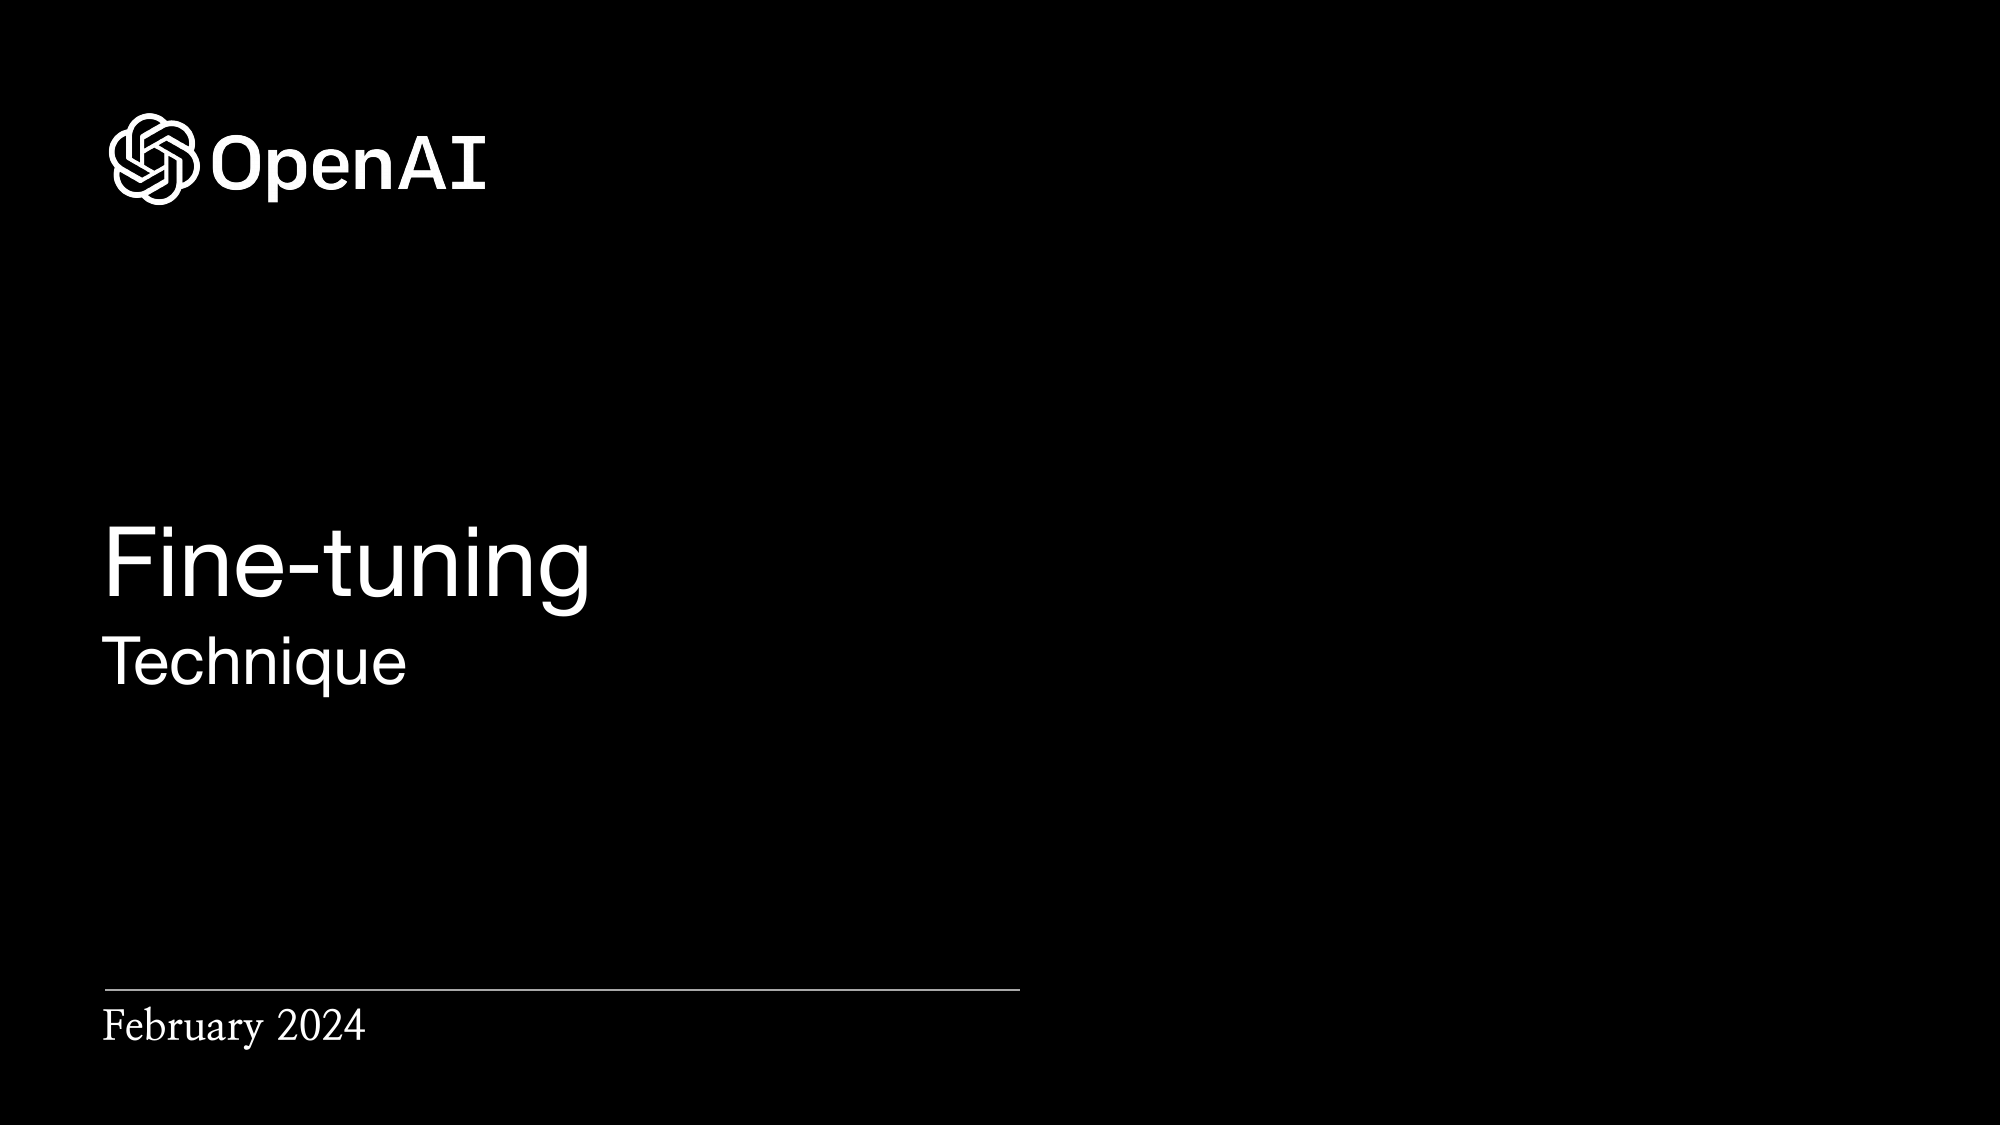

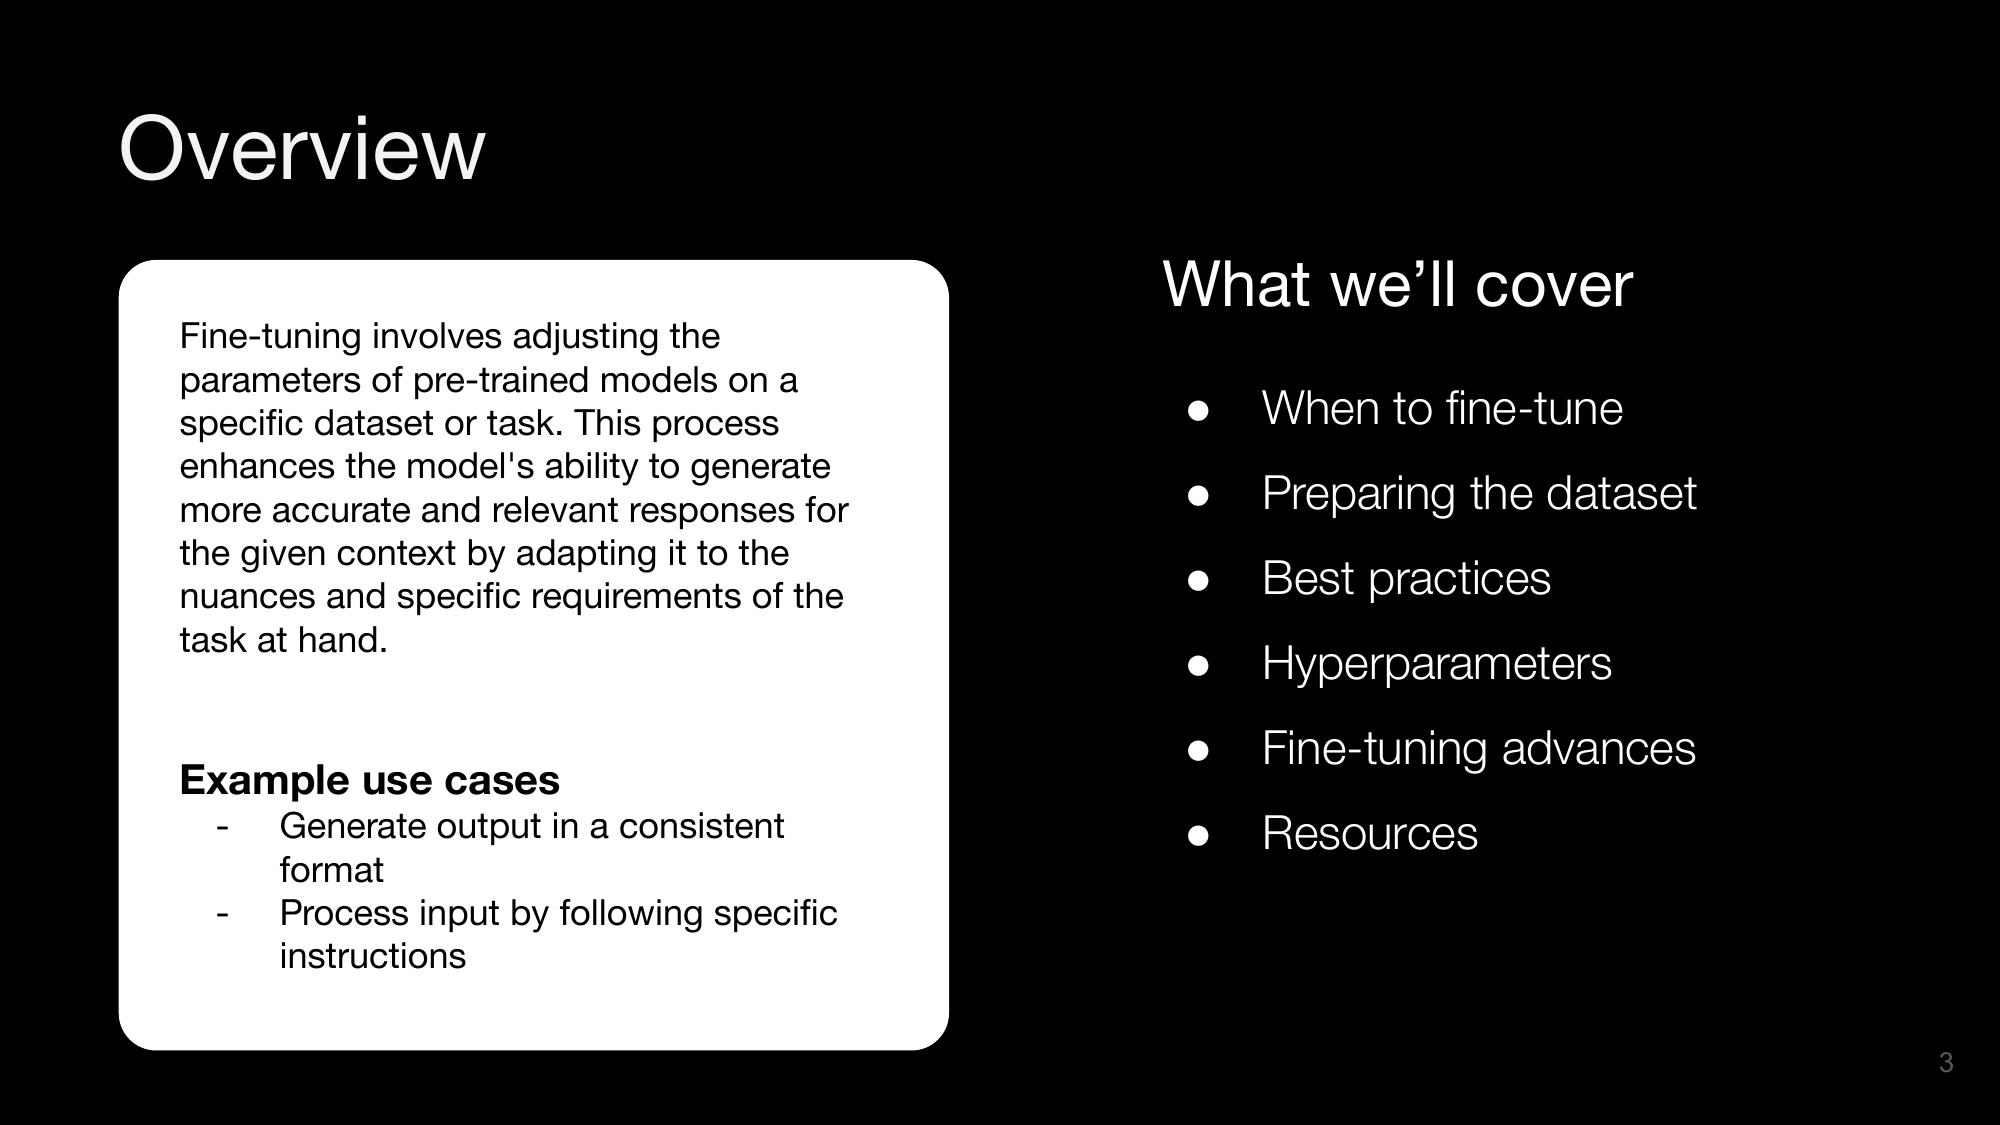

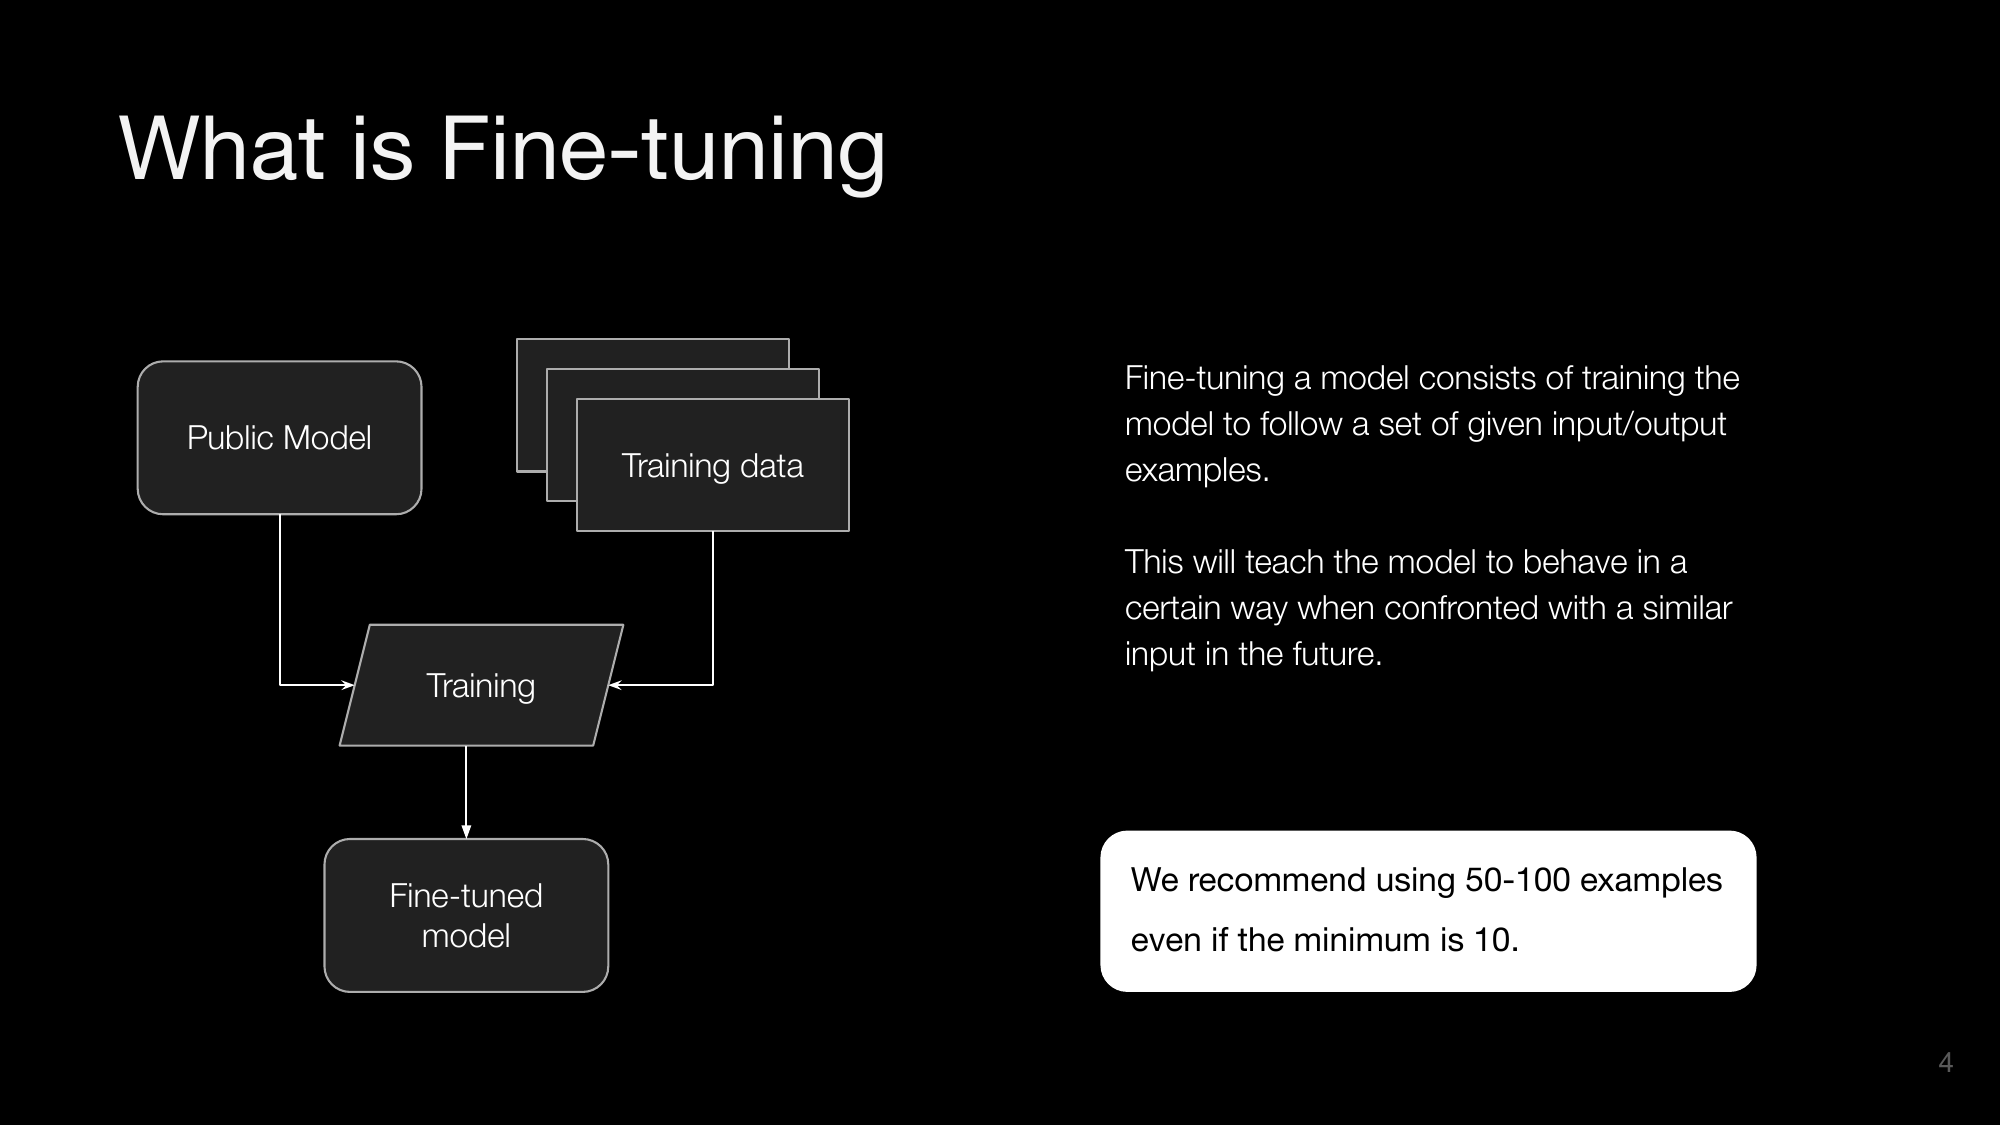

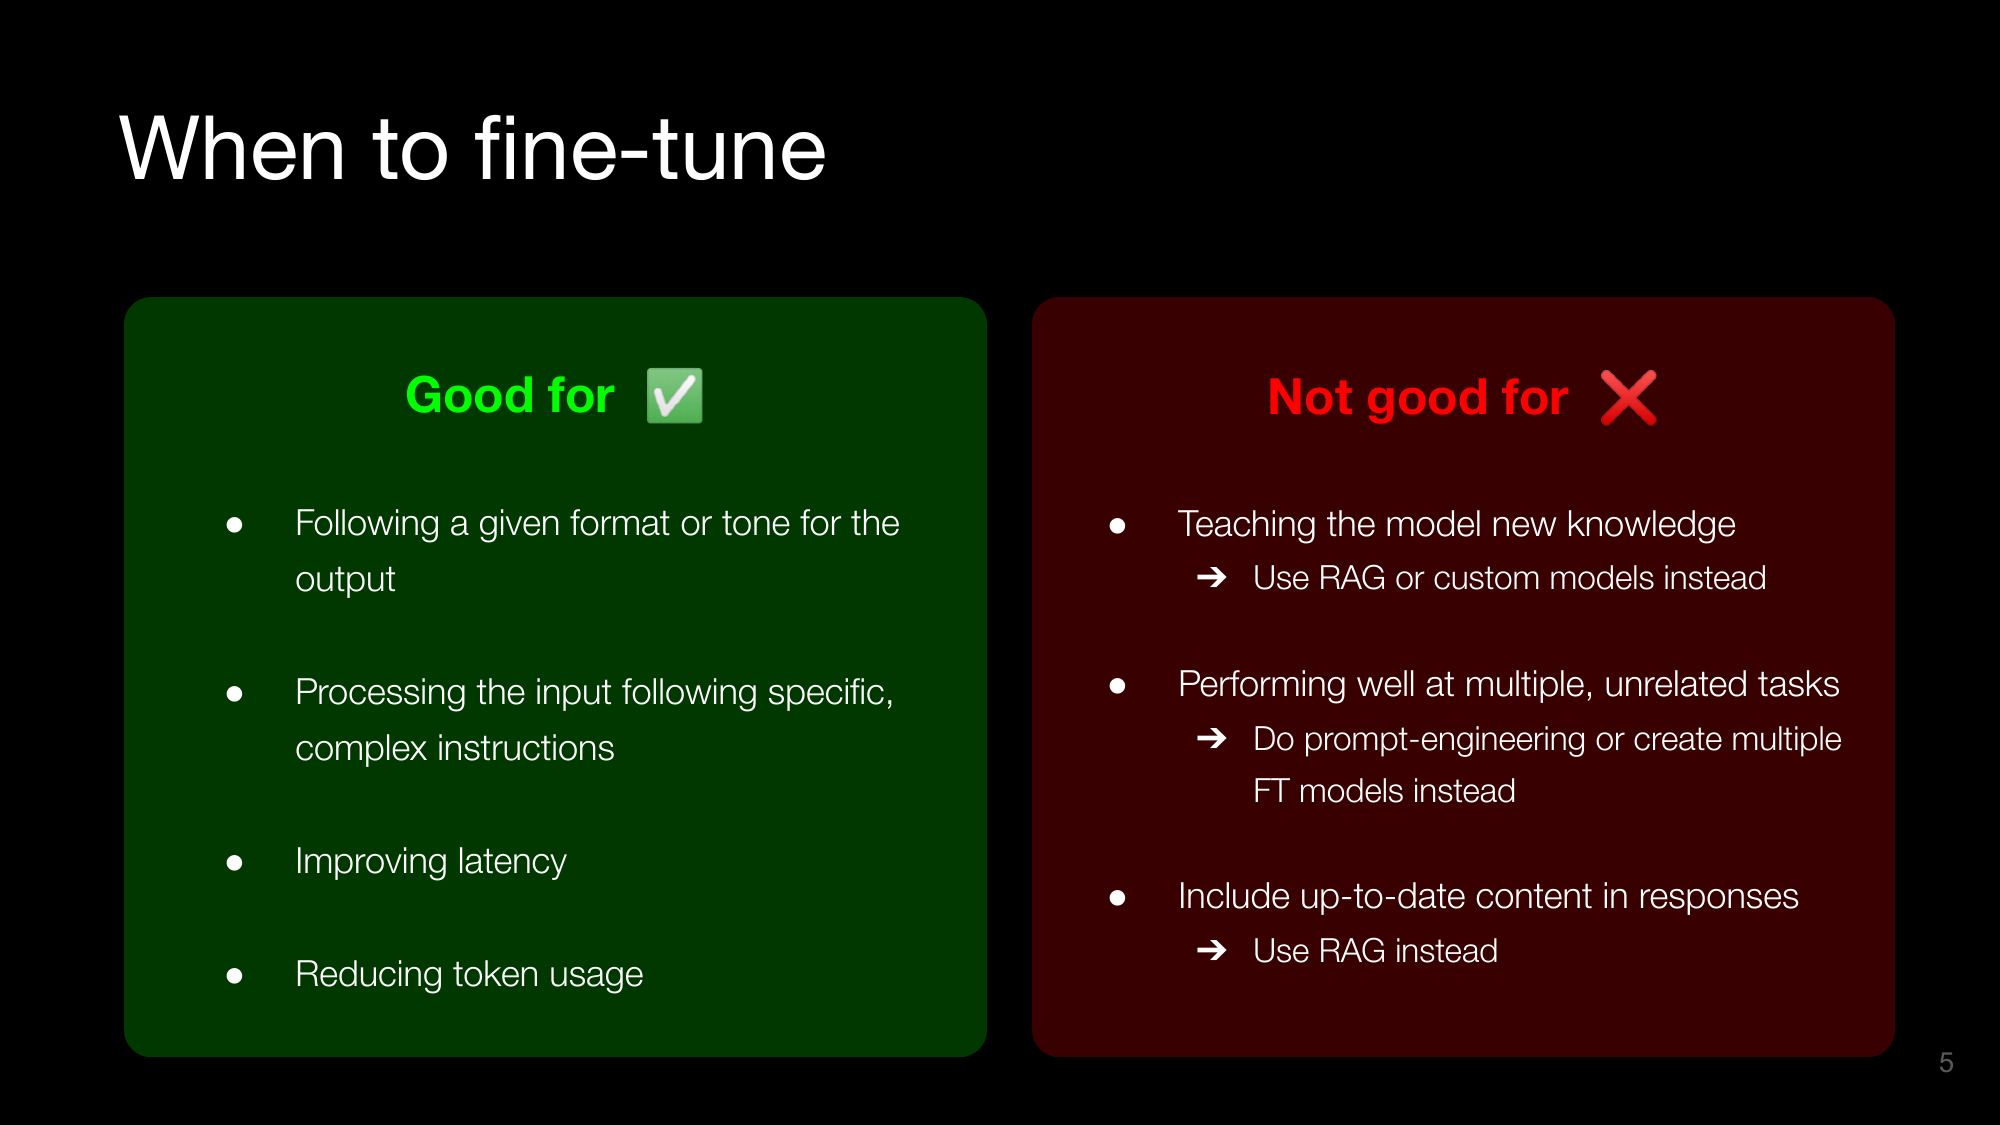

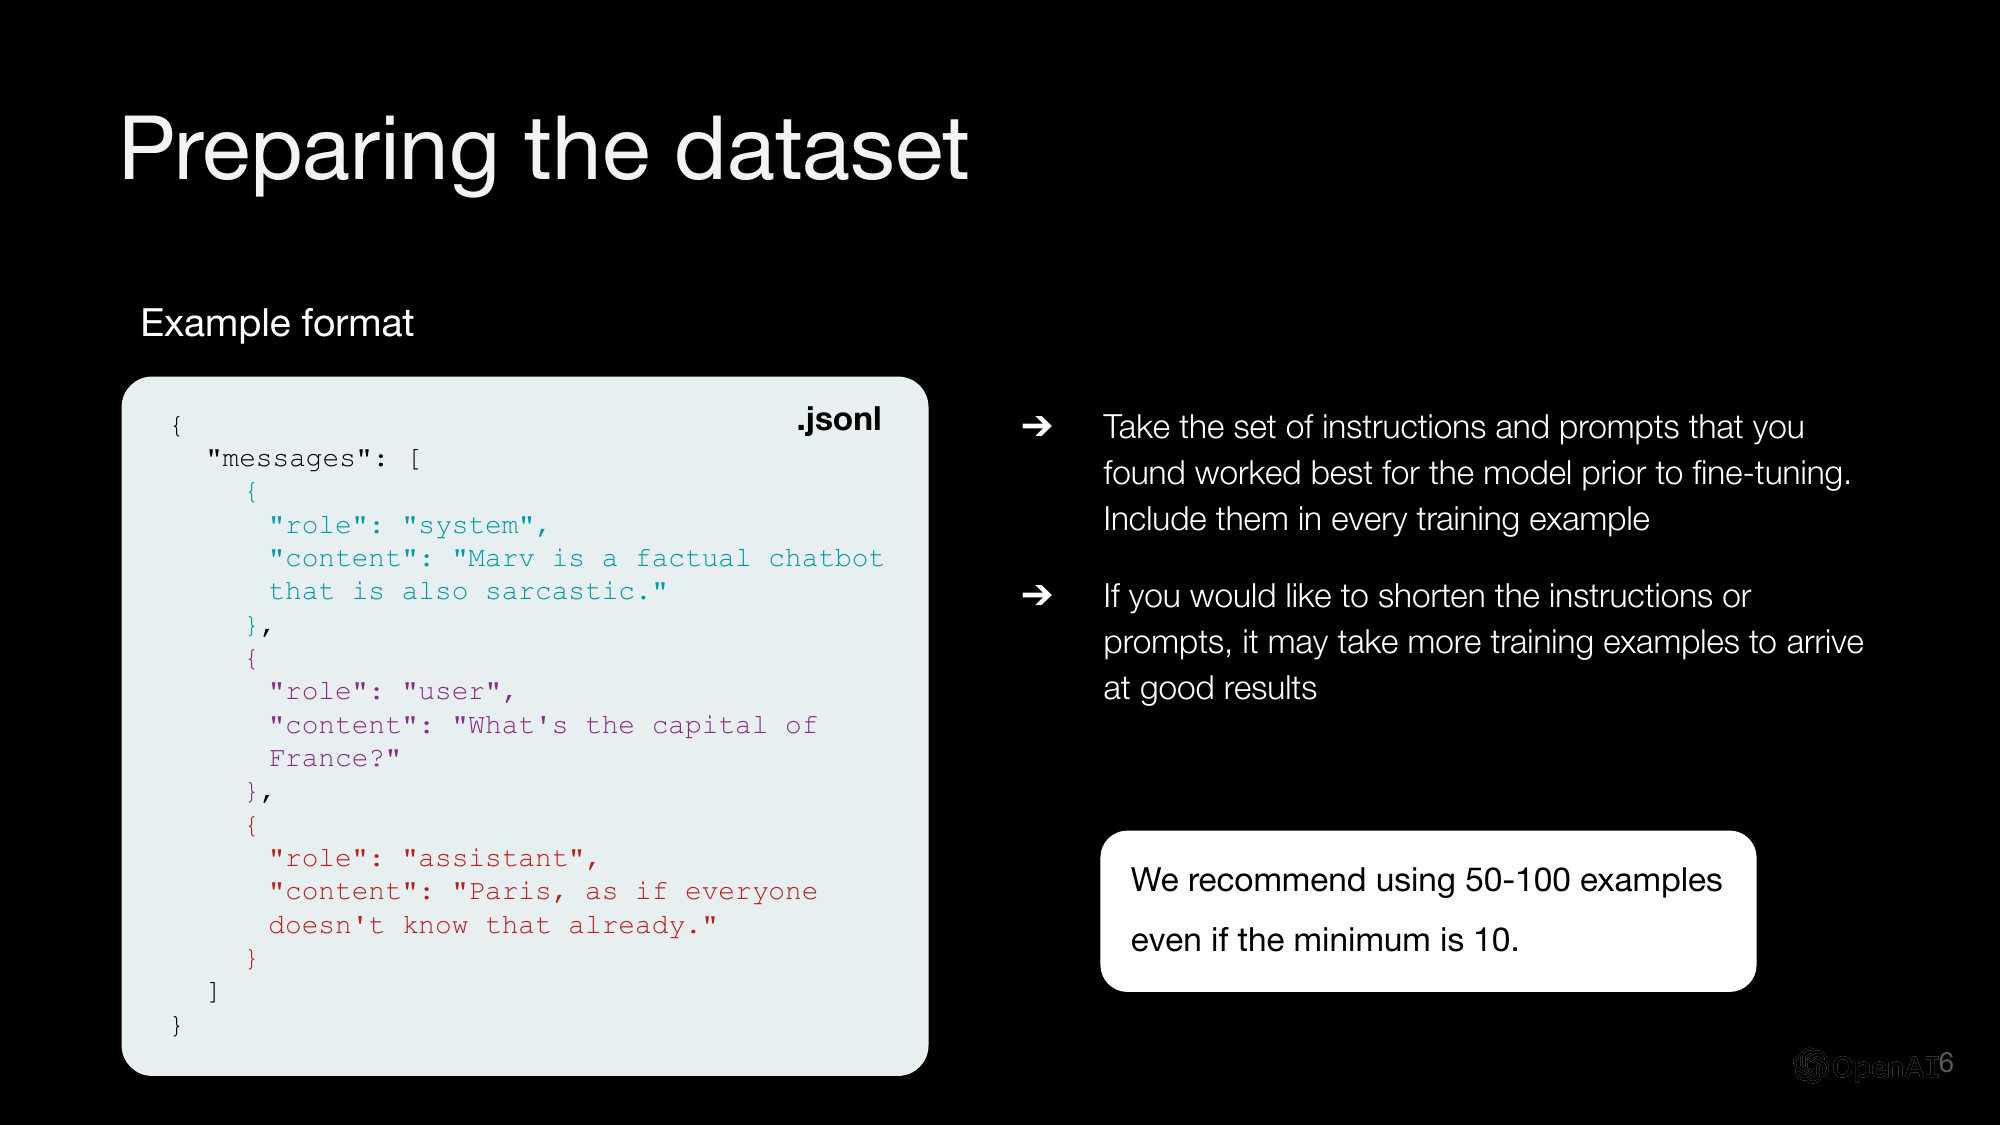

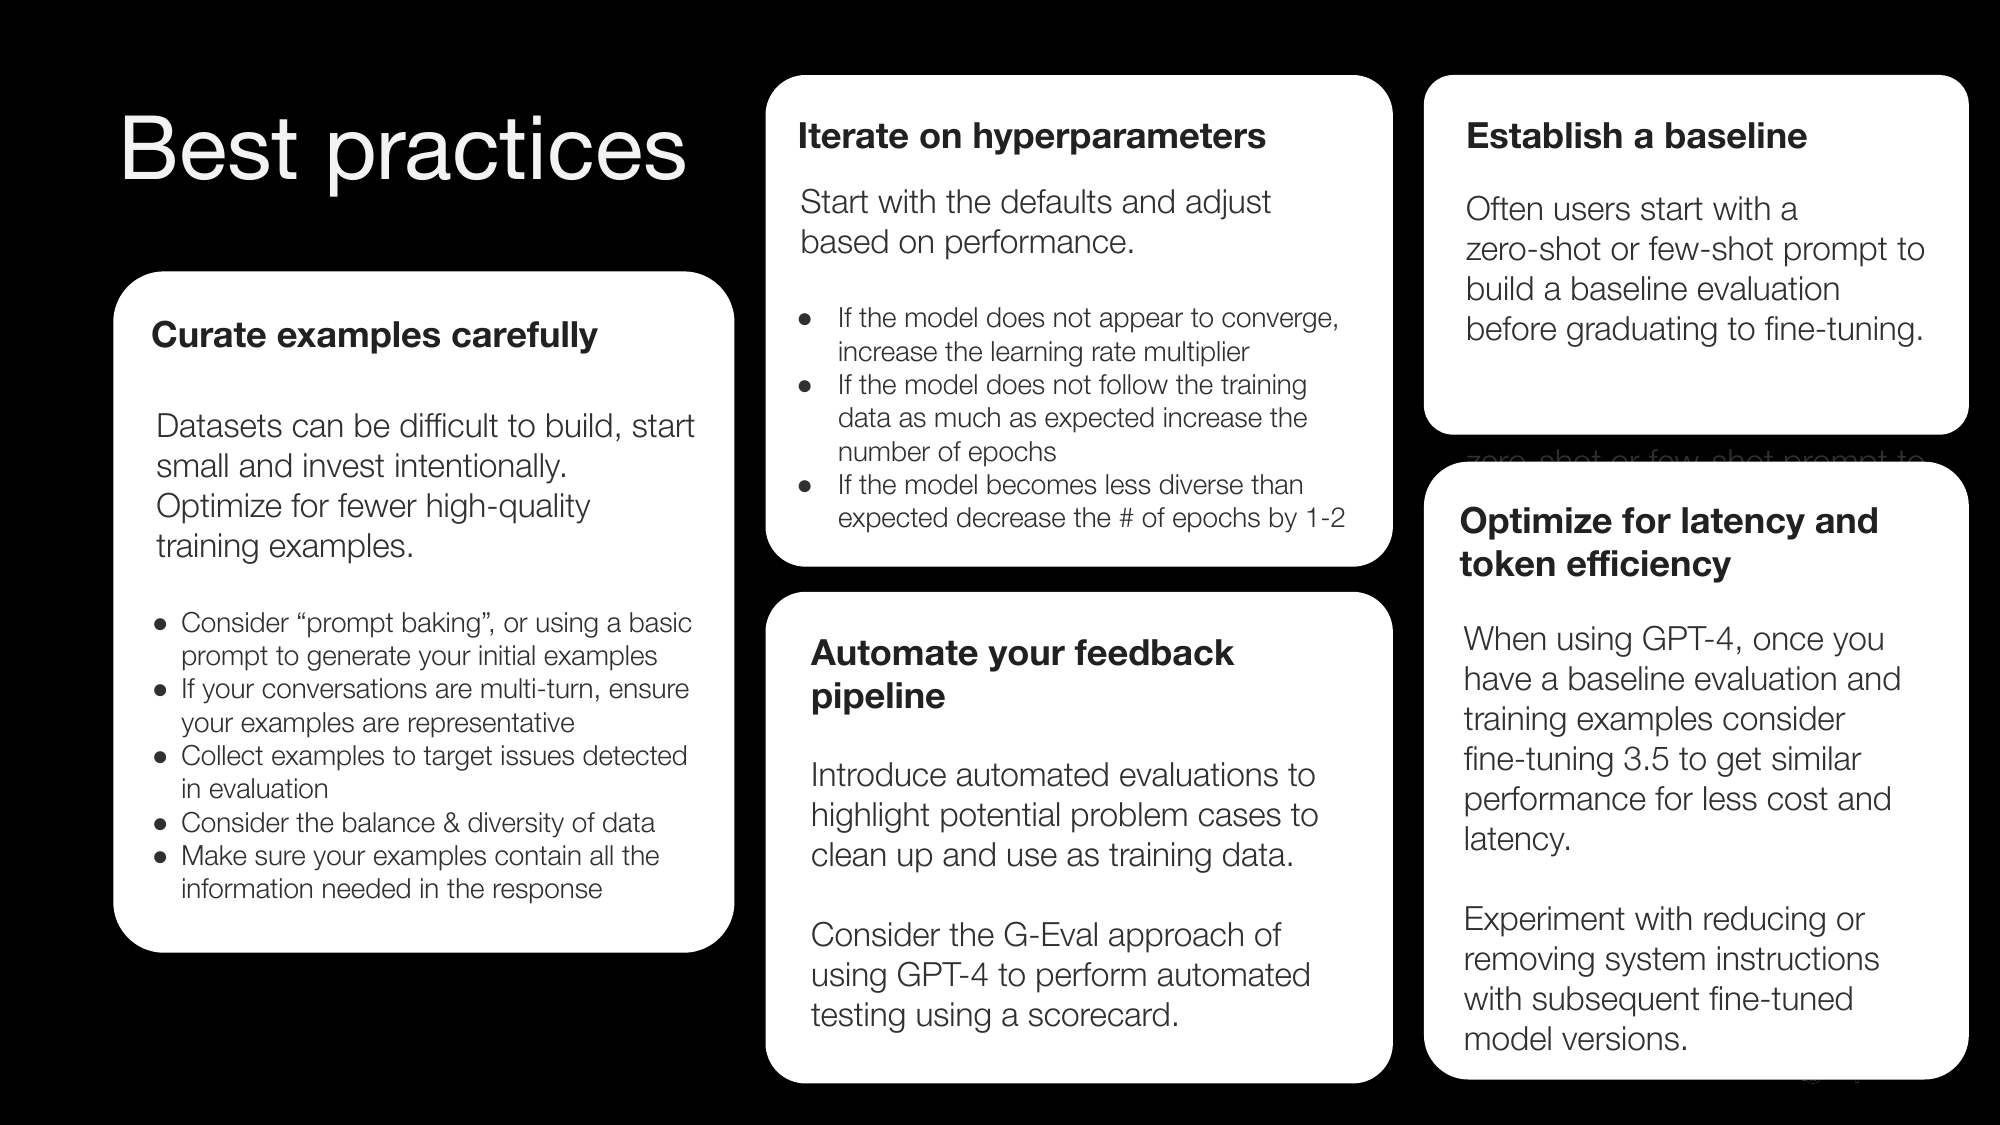

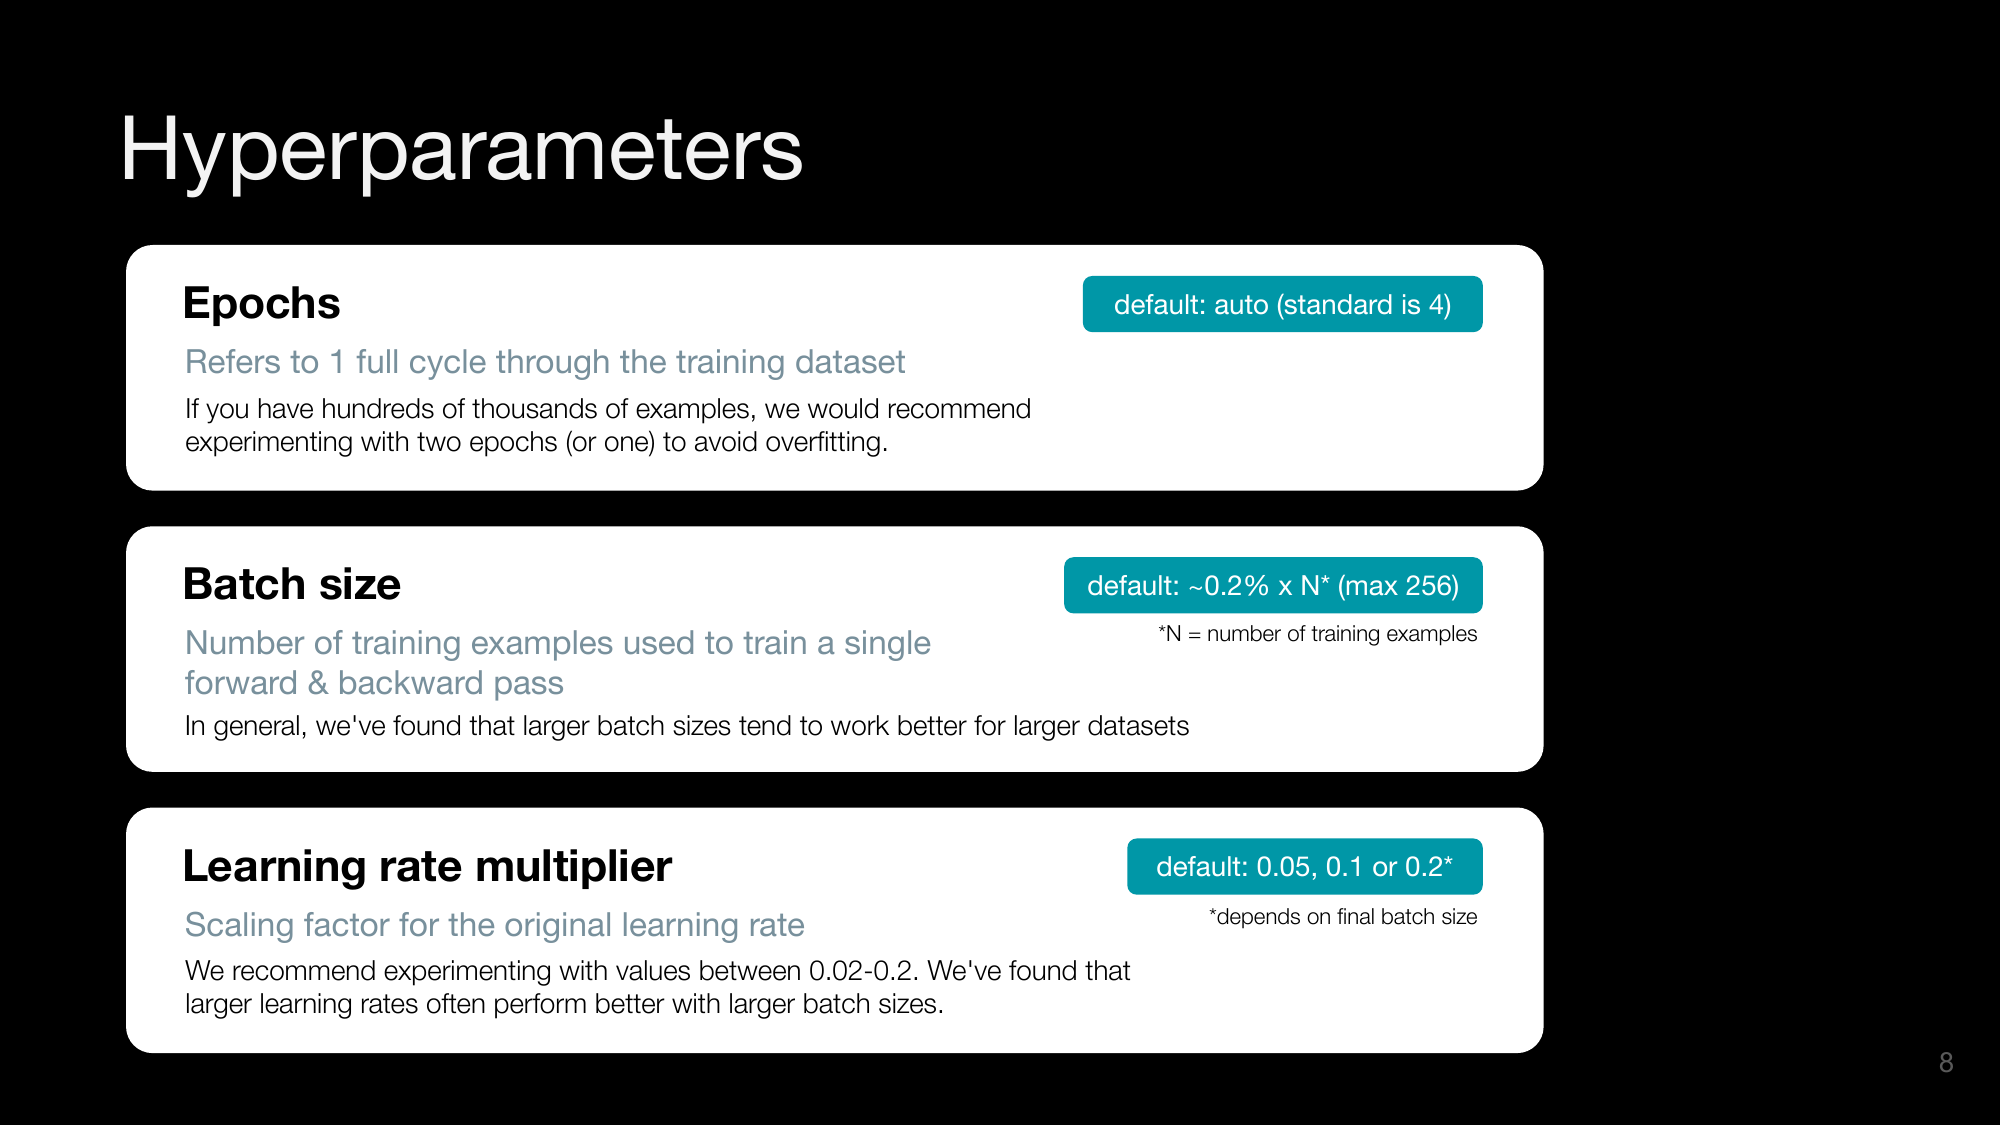

In [20]:
for img in images:
    display(img)

In [21]:
# Converting images to base64 encoded images in a data URI format to use with the ChatCompletions API
def get_img_uri(img):
    buffer = BytesIO()
    img.save(buffer, format="jpeg")
    base64_image = base64.b64encode(buffer.getvalue()).decode("utf-8")
    data_uri = f"data:image/jpeg;base64,{base64_image}"
    return data_uri

In [35]:
system_prompt = '''
You will be provided with an image of a pdf page or a slide. Your goal is to talk about the content that you see, in technical terms, as if you were delivering a presentation.

If there are diagrams, describe the diagrams and explain their meaning.
For example: if there is a diagram describing a process flow, say something like "the process flow starts with X then we have Y and Z..."

If there are tables, describe logically the content in the tables
For example: if there is a table listing items and prices, say something like "the prices are the following: A for X, B for Y..."

DO NOT include terms referring to the content format
DO NOT mention the content type - DO focus on the content itself
For example: if there is a diagram/chart and text on the image, talk about both without mentioning that one is a chart and the other is text.
Simply describe what you see in the diagram and what you understand from the text.

You should keep it concise, but keep in mind your audience cannot see the image so be exhaustive in describing the content.

Exclude elements that are not relevant to the content:
DO NOT mention page numbers or the position of the elements on the image.

------

If there is an identifiable title, identify the title to give the output in the following format:

{TITLE}

{Content description}

If there is no clear title, simply return the content description.

'''

def analyze_image(img_url):
    response = client.chat.completions.create(
    model="gpt-4o",
    temperature=0,
    messages=[
        {
            "role": "system",
            "content": system_prompt
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": {
                        "url": img_url
                    },
                },
            ],
        }
    ],
        max_tokens=300,
        top_p=0.1
    )

    return response.choices[0].message.content

In [36]:
img = images[2]
data_uri = get_img_uri(img)

In [37]:
res = analyze_image(data_uri)
print(res)

What is Fine-tuning

Fine-tuning a model involves training it to follow a set of given input/output examples. This process helps the 
model learn to behave in a specific way when faced with similar inputs in the future. The diagram illustrates that 
a public model is combined with training data during the training process to produce a fine-tuned model. It is 
recommended to use 50-100 examples for effective fine-tuning, although the minimum required is 10.

## Processing all documents

In [38]:
files_path = "data/example_pdfs"

all_items = os.listdir(files_path)
files = [item for item in all_items if os.path.isfile(os.path.join(files_path, item))]

In [42]:
from ratelimit import limits, sleep_and_retry

@sleep_and_retry
@limits(calls=10, period=60)  # 10 calls per minute
def analyze_doc_image(img):
    img_uri = get_img_uri(img)
    data = analyze_image(img_uri)
    return data

In [43]:
docs = []

for f in files:
    
    path = f"{files_path}/{f}"
    doc = {
        "filename": f
    }
    text = extract_text_from_doc(path)
    doc['text'] = text
    imgs = convert_doc_to_images(path)
    pages_description = []
    
    print(f"Analyzing pages for doc {f}")
    
    # Concurrent execution
    with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
        
        # Removing 1st slide as it's usually just an intro
        futures = [
            executor.submit(analyze_doc_image, img)
            for img in imgs[1:]
        ]
        
        with tqdm(total=len(imgs)-1) as pbar:
            for _ in concurrent.futures.as_completed(futures):
                pbar.update(1)
        
        for f in futures:
            res = f.result()
            pages_description.append(res)
        
    doc['pages_description'] = pages_description
    docs.append(doc)

Analyzing pages for doc fine-tuning-deck.pdf

100%|██████████| 6/6 [00:04<00:00,  1.39it/s]


Analyzing pages for doc rag-deck.pdf

100%|██████████| 19/19 [01:52<00:00,  5.93s/it]


Analyzing pages for doc evals-decks.pdf

100%|██████████| 12/12 [01:00<00:00,  5.03s/it]


Analyzing pages for doc models-page.pdf

100%|██████████| 9/9 [00:59<00:00,  6.62s/it]


In [44]:
# Saving result to file for later
json_path = "data/parsed_pdf_docs.json"

with open(json_path, 'w') as f:
    json.dump(docs, f)

In [45]:
# Optional: load content from the saved file
with open(json_path, 'r') as f:
    docs = json.load(f)

## Embedding content

In [46]:
# Chunking content by page and merging together slides text & description if applicable
content = []
for doc in docs:
    # Removing first slide as well
    text = doc['text'].split('\f')[1:]
    description = doc['pages_description']
    description_indexes = []
    for i in range(len(text)):
        slide_content = text[i] + '\n'
        # Trying to find matching slide description
        slide_title = text[i].split('\n')[0]
        for j in range(len(description)):
            description_title = description[j].split('\n')[0]
            if slide_title.lower() == description_title.lower():
                slide_content += description[j].replace(description_title, '')
                # Keeping track of the descriptions added
                description_indexes.append(j)
        # Adding the slide content + matching slide description to the content pieces
        content.append(slide_content) 
    # Adding the slides descriptions that weren't used
    for j in range(len(description)):
        if j not in description_indexes:
            content.append(description[j])

In [47]:
for c in content:
    print(c)
    print("\n\n-------------------------------\n\n")

Overview

Fine-tuning involves adjusting the 
parameters of pre-trained models on a 
speciﬁc dataset or task. This process 
enhances the model's ability to generate 
more accurate and relevant responses for 
the given context by adapting it to the 
nuances and speciﬁc requirements of the 
task at hand.

Example use cases

- Generate output in a consistent 

-

format
Process input by following speciﬁc 
instructions

What we’ll cover

● When to ﬁne-tune

● Preparing the dataset

● Best practices

● Hyperparameters

● Fine-tuning advances

● Resources

3

-------------------------------

What is Fine-tuning

Public Model

Training data

Training

Fine-tuned 
model

Fine-tuning a model consists of training the 
model to follow a set of given input/output 
examples.

This will teach the model to behave in a 
certain way when confronted with a similar 
input in the future.

We recommend using 50-100 examples 

even if the minimum is 10.

4

-------------------------------

When to ﬁne-tune

Good for  ✅

Not good for  ❌

●

●

●

●

Following a given format or tone for the 

output

Processing the input following speciﬁc, 

complex instructions

Improving latency

Reducing token usage

●

●

●

Teaching the model new knowledge
➔ Use RAG or custom models instead

Performing well at multiple, unrelated tasks
➔ Do prompt-engineering or create multiple 

FT models instead

Include up-to-date content in responses
➔ Use RAG instead

5

-------------------------------

Preparing the dataset

Example format

{

"messages": [

{

"role": "system",
"content": "Marv is a factual chatbot 
that is also sarcastic."

},
{

"role": "user",
"content": "What's the capital of 
France?"

},
{

"role": "assistant",
"content": "Paris, as if everyone 
doesn't know that already."

}

]

}

.jsonl

➔ Take the set of instructions and prompts that you 

found worked best for the model prior to ﬁne-tuning. 
Include them in every training example

➔ If you would like to shorten the instructions or 

prompts, it may take more training examples to arrive 
at good results

We recommend using 50-100 examples 

even if the minimum is 10.

6

-------------------------------

Best practices

Curate examples carefully

Datasets can be diﬃcult to build, start 
small and invest intentionally. 
Optimize for fewer high-quality 
training examples.

● Consider “prompt baking”, or using a basic 
prompt to generate your initial examples
● If your conversations are multi-turn, ensure 

your examples are representative

● Collect examples to target issues detected 

in evaluation

● Consider the balance & diversity of data
● Make sure your examples contain all the 

information needed in the response

Iterate on hyperparameters

Establish a baseline

Start with the defaults and adjust 
based on performance.

● If the model does not appear to converge, 

increase the learning rate multiplier
● If the model does not follow the training 
data as much as expected increase the 
number of epochs

● If the model becomes less diverse than 

expected decrease the # of epochs by 1-2

Automate your feedback 
pipeline

Introduce automated evaluations to 
highlight potential problem cases to 
clean up and use as training data.

Consider the G-Eval approach of 
using GPT-4 to perform automated 
testing using a scorecard.

Often users start with a 
zero-shot or few-shot prompt to 
build a baseline evaluation 
before graduating to ﬁne-tuning.

Often users start with a 
zero-shot or few-shot prompt to 
build a baseline evaluation 
Optimize for latency and 
before graduating to ﬁne-tuning.
token eﬃciency

When using GPT-4, once you 
have a baseline evaluation and 
training examples consider 
ﬁne-tuning 3.5 to get similar 
performance for less cost and 
latency.

Experiment with reducing or 
removing system instructions 
with subsequent ﬁne-tuned 
model versions.

-------------------------------

Hyperparameters

Epochs
Refers to 1 full cycle through the training dataset
If you have hundreds of thousands of examples, we would recommend 
experimenting with two epochs (or one) to avoid overﬁtting.

default: auto (standard is 4)

Batch size
Number of training examples used to train a single 
forward & backward pass
In general, we've found that larger batch sizes tend to work better for larger datasets

default: ~0.2% x N* (max 256)

*N = number of training examples

Learning rate multiplier
Scaling factor for the original learning rate
We recommend experimenting with values between 0.02-0.2. We've found that 
larger learning rates often perform better with larger batch sizes.

default: 0.05, 0.1 or 0.2*

*depends on ﬁnal batch size

8

-------------------------------

-------------------------------

**Overview**

Fine-tuning involves adjusting the parameters of pre-trained models on a specific dataset or task. This process 
enhances the model's ability to generate more accurate and relevant responses by adapting it to the nuances and 
specific requirements of the task at hand.

**Example use cases:**
- Generate output in a consistent format
- Process input by following specific instructions

**What we’ll cover:**
- When to fine-tune
- Preparing the dataset
- Best practices
- Hyperparameters
- Fine-tuning advances
- Resources

-------------------------------

**What is Fine-tuning**

Fine-tuning involves training a model to follow specific input/output examples. This process helps the model learn 
to respond in a particular way when faced with similar inputs in the future. The diagram illustrates that a public 
model is combined with training data during the training process to produce a fine-tuned model. It is recommended 
to use 50-100 examples for effective fine-tuning, although the minimum required is 10.

-------------------------------

**When to Fine-Tune**

**Good for:**
- Following a given format or tone for the output.
- Processing the input following specific, complex instructions.
- Improving latency.
- Reducing token usage.

**Not good for:**
- Teaching the model new knowledge: Use Retrieval-Augmented Generation (RAG) or custom models instead.
- Performing well at multiple, unrelated tasks: Do prompt-engineering or create multiple fine-tuned models instead.
- Including up-to-date content in responses: Use RAG instead.

-------------------------------

**Preparing the dataset**

The example format shown is a JSONL structure used for training a chatbot. It includes a sequence of messages with 
different roles: "system," "user," and "assistant." The system message sets the context, describing the chatbot as 
"Marv, a factual chatbot that is also sarcastic." The user asks, "What's the capital of France?" and the assistant 
responds with a sarcastic remark, "Paris, as if everyone doesn't know that already."

Key points for preparing the dataset include:

- Use a consistent set of instructions and prompts that have proven effective for the model before fine-tuning. 
These should be included in every training example.
- If instructions or prompts are shortened, more training examples may be needed to achieve good results.
- It is recommended to use 50-100 examples, even though the minimum required is 10.

-------------------------------

**Best Practices**

**Curate examples carefully**
- Building datasets can be challenging; start small and focus on high-quality examples.
- Use "prompt baking" or basic prompts for initial examples.
- Ensure multi-turn conversations are representative.
- Collect examples to address issues found in evaluations.
- Balance and diversify data.
- Ensure examples contain all necessary response information.

**Iterate on hyperparameters**
- Begin with default settings and adjust based on performance.
- Increase learning rate if the model doesn't converge.
- Increase epochs if the model doesn't follow training data well.
- Decrease epochs if the model becomes less diverse than expected.

**Establish a baseline**
- Start with zero-shot or few-shot prompts for baseline evaluation before fine-tuning.

**Automate your feedback pipeline**
- Use automated evaluations to identify and clean up problem cases for training data.
- Consider using G-Eval with GPT-4 for automated testing with a scorecard.

**Optimize for latency and token efficiency**
- After baseline evaluation, consider fine-tuning with GPT-3.5 for cost and latency efficiency.
- Experiment with reducing or removing system instructions in subsequent fine-tuned models.

-------------------------------

**Hyperparameters**

**Epochs**  
This refers to one complete cycle through the training dataset. For datasets with hundreds of thousands of 
examples, it is recommended to use two epochs or even one to prevent overfitting. The default setting is auto, with
a standard of 4 epochs.

**Batch size**  
This is the number of training examples used to train during a single forward and backward pass. Larger batch sizes
are generally more effective for larger datasets. The default is approximately 0.2% of the total number of training
examples, with a maximum of 256.

**Learning rate multiplier**  
This is a scaling factor for the original learning rate. It is suggested to experiment with values between 0.02 and
0.2, as larger learning rates often yield better results with larger batch sizes. The default values are 0.05, 0.1,
or 0.2, depending on the final batch size.

-------------------------------

Overview

Retrieval-Augmented Generation 
enhances the capabilities of language 
models by combining them with a 
retrieval system. This allows the model 
to leverage external knowledge sources 
to generate more accurate and 
contextually relevant responses.

Example use cases

- Provide answers with up-to-date 

information

- Generate contextual responses

What we’ll cover

● Technical patterns

● Best practices

● Common pitfalls

● Resources

3

-------------------------------

What is RAG

Retrieve information to Augment the model’s knowledge and Generate the output

“What is your 
return policy?”

ask

result

search

LLM

return information

Total refunds: 0-14 days
50% of value vouchers: 14-30 days
$5 discount on next order: > 30 days

“You can get a full refund up 
to 14 days after the 
purchase, then up to 30 days 
you would get a voucher for 
half the value of your order”

Knowledge 
Base / External 
sources

4




RAG stands for Retrieve information to Augment the model’s knowledge and Generate the output. The process involves 
a user asking a question, such as "What is your return policy?" This question is directed to a Large Language Model
(LLM), which then searches a Knowledge Base or external sources for relevant information. The retrieved information
includes details like:

- Total refunds available from 0 to 14 days.
- 50% value vouchers for returns between 14 to 30 days.
- A $5 discount on the next order for returns after 30 days.

The LLM processes this information and generates a response for the user, such as: "You can get a full refund up to
14 days after the purchase, then up to 30 days you would get a voucher for half the value of your order." This 
illustrates how RAG enhances the model's ability to provide accurate and contextually relevant answers by 
leveraging external data sources.

-------------------------------

When to use RAG

Good for  ✅

Not good for  ❌

●

●

Introducing new information to the model 

●

Teaching the model a speciﬁc format, style, 

to update its knowledge

Reducing hallucinations by controlling 

content

/!\ Hallucinations can still happen with RAG

or language
➔ Use ﬁne-tuning or custom models instead

●

Reducing token usage
➔ Consider ﬁne-tuning depending on the use 

case

5

-------------------------------

Technical patterns

Data preparation

Input processing

Retrieval

Answer Generation

● Chunking

●

●

Embeddings

Augmenting 
content

●

Input 
augmentation

● NER

●

Search

● Context window

● Multi-step 
retrieval

● Optimisation

●

Safety checks

●

Embeddings

● Re-ranking

6

-------------------------------

Technical patterns
Data preparation

chunk documents into multiple 
pieces for easier consumption

content

embeddings

0.983, 0.123, 0.289…

0.876, 0.145, 0.179…

0.983, 0.123, 0.289…

Augment content 
using LLMs

Ex: parse text only, ask gpt-4 to rephrase & 
summarize each part, generate bullet points…

BEST PRACTICES

Pre-process content for LLM 
consumption: 
Add summary, headers for each 
part, etc.
+ curate relevant data sources

Knowledge 
Base

COMMON PITFALLS

➔ Having too much low-quality 

content

➔ Having too large documents

7

-------------------------------

Technical patterns
Data preparation: chunking

Why chunking?

If your system doesn’t require 
entire documents to provide 
relevant answers, you can 
chunk them into multiple pieces 
for easier consumption (reduced 
cost & latency).

Other approaches: graphs or 
map-reduce

Things to consider

●

Overlap:

○

○

Should chunks be independent or overlap one 
another?
If they overlap, by how much?

●

Size of chunks: 

○ What is the optimal chunk size for my use case?
○

Do I want to include a lot in the context window or 
just the minimum?

● Where to chunk:

○

○

Should I chunk every N tokens or use speciﬁc 
separators? 
Is there a logical way to split the context that would 
help the retrieval process?

● What to return:

○

○

Should I return chunks across multiple documents 
or top chunks within the same doc?
Should chunks be linked together with metadata to 
indicate common properties?

8

-------------------------------

Technical patterns
Data preparation: embeddings

What to embed?

Depending on your use case 
you might not want just to 
embed the text in the 
documents but metadata as well 
- anything that will make it easier 
to surface this speciﬁc chunk or 
document when performing a 
search

Examples

Embedding Q&A posts in a forum
You might want to embed the title of the posts, 
the text of the original question and the content of 
the top answers.
Additionally, if the posts are tagged by topic or 
with keywords, you can embed those too.

Embedding product specs
In additional to embedding the text contained in 
documents describing the products, you might 
want to add metadata that you have on the 
product such as the color, size, etc. in your 
embeddings.

9

-------------------------------

Technical patterns
Data preparation: augmenting content

What does “Augmenting 
content” mean?

Augmenting content refers to 
modiﬁcations of the original content 
to make it more digestible for a 
system relying on RAG. The 
modiﬁcations could be a change in 
format, wording, or adding 
descriptive content such as 
summaries or keywords.

Example approaches

Make it a guide*
Reformat the content to look more like 
a step-by-step guide with clear 
headings and bullet-points, as this 
format is more easily understandable 
by an LLM.

Add descriptive metadata*
Consider adding keywords or text that 
users might search for when thinking 
of a speciﬁc product or service.

Multimodality
Leverage models 
such as Whisper or 
GPT-4V to 
transform audio or 
visual content into 
text.
For example, you 
can use GPT-4V to 
generate tags for 
images or to 
describe slides.

* GPT-4 can do this for you with the right prompt

10

-------------------------------

Technical patterns
Input processing

Process input according to task

Q&A
HyDE:  Ask LLM to hypothetically answer the 
question & use the answer to search the KB

embeddings

0.983, 0.123, 0.289…

0.876, 0.145, 0.179…

Content search
Prompt LLM to rephrase input & optionally add 
more context

query

SELECT * from items…

DB search
NER:  Find relevant entities to be used for a 
keyword search or to construct a search query

keywords

red

summer

BEST PRACTICES

Consider how to transform the 
input to match content in the 
database
Consider using metadata to 
augment the user input

COMMON PITFALLS

➔ Comparing directly the input 
to the database without 
considering the task 
speciﬁcities 

11

-------------------------------

Technical patterns
Input processing: input augmentation

What is input augmentation?

Example approaches

Augmenting the input means turning 
it into something diﬀerent, either 
rephrasing it, splitting it in several 
inputs or expanding it.
This helps boost performance as 
the LLM might understand better 
the user intent.

Query 
expansion*
Rephrase the 
query to be 
more 
descriptive

HyDE*
Hypothetically 
answer the 
question & use 
the answer to 
search the KB

Splitting a query in N*
When there is more than 1 question or 
intent in a user query, consider 
splitting it in several queries

Fallback
Consider 
implementing a 
ﬂow where the LLM 
can ask for 
clariﬁcation when 
there is not enough 
information in the 
original user query 
to get a result
(Especially relevant 
with tool usage)

* GPT-4 can do this for you with the right prompt

12

-------------------------------

Technical patterns
Input processing: NER

Why use NER?

Using NER (Named Entity 
Recognition) allows to extract 
relevant entities from the input, that 
can then be used for more 
deterministic search queries. 
This can be useful when the scope 
is very constrained.

Example

Searching for movies
If you have a structured database containing 
metadata on movies, you can extract genre, 
actors or directors names, etc. from the user 
query and use this to search the database

Note: You can use exact values or embeddings after 
having extracted the relevant entities

13

-------------------------------

Technical patterns
Retrieval

re-ranking

INPUT

embeddings

0.983, 0.123, 0.289…

0.876, 0.145, 0.179…

query

SELECT * from items…

keywords

red

summer

Semantic 
search

RESULTS

RESULTS

vector DB

relational / 
nosql db

FINAL RESULT

Used to 
generate output

BEST PRACTICES

Use a combination of semantic 
search and deterministic queries 
where possible

+ Cache output where possible

COMMON PITFALLS

➔ The wrong elements could be 
compared when looking at 
text similarity, that is why 
re-ranking is important

14

-------------------------------

Technical patterns
Retrieval: search

How to search?

Semantic search

Keyword search

Search query

There are many diﬀerent 
approaches to search depending on 
the use case and the existing 
system.

Using embeddings, you 
can perform semantic 
searches. You can 
compare embeddings 
with what is in your 
database and ﬁnd the 
most similar.

If you have extracted 
speciﬁc entities or 
keywords to search for, 
you can search for these 
in your database.

Based on the extracted 
entities you have or the 
user input as is, you can 
construct search queries 
(SQL, cypher…) and use 
these queries to search 
your database.

You can use a hybrid approach and combine several of these.
You can perform multiple searches in parallel or in sequence, or 
search for keywords with their embeddings for example.

15

-------------------------------

Technical patterns
Retrieval: multi-step retrieval

What is multi-step retrieval?

In some cases, there might be 
several actions to be performed to 
get the required information to 
generate an answer.

Things to consider

●

Framework to be used:

○ When there are multiple steps to perform, 
consider whether you want to handle this 
yourself or use a framework to make it easier

●

Cost & Latency:

○

○

Performing multiple steps at the retrieval 
stage can increase latency and cost 
signiﬁcantly
Consider performing actions in parallel to 
reduce latency

●

Chain of Thought:

○

○

Guide the assistant with the chain of thought 
approach: break down instructions into 
several steps, with clear guidelines on 
whether to continue, stop or do something 
else. 
This is more appropriate when tasks need to 
be performed sequentially - for example: “if 
this didn’t work, then do this”

16

-------------------------------

Technical patterns
Retrieval: re-ranking

What is re-ranking?

Example approaches

Re-ranking means re-ordering the 
results of the retrieval process to 
surface more relevant results.
This is particularly important when 
doing semantic searches.

Rule-based re-ranking
You can use metadata to rank results by relevance. For 
example, you can look at the recency of the documents, at 
tags, speciﬁc keywords in the title, etc.

Re-ranking algorithms
There are several existing algorithms/approaches you can use 
based on your use case: BERT-based re-rankers, 
cross-encoder re-ranking, TF-IDF algorithms…

17

-------------------------------

Technical patterns
Answer Generation

FINAL RESULT

Piece of content 
retrieved

LLM

Prompt including 
the content

User sees the 
ﬁnal result

BEST PRACTICES

Evaluate performance after each 
experimentation to assess if it’s 
worth exploring other paths
+ Implement guardrails if applicable

COMMON PITFALLS

➔ Going for ﬁne-tuning without 
trying other approaches
➔ Not paying attention to the 
way the model is prompted

18

-------------------------------

Technical patterns
Answer Generation: context window

How to manage context?

Depending on your use case, there are 
several things to consider when 
including retrieved content into the 
context window to generate an answer. 

Things to consider

●

Context window max size:

○

○

There is a maximum size, so putting too 
much content is not ideal
In conversation use cases, the 
conversation will be part of the context 
as well and will add to that size

●

Cost & Latency vs Accuracy:

○ More context results in increased 

latency and additional costs since there 
will be more input tokens
Less context might also result in 
decreased accuracy

○

●

“Lost in the middle” problem:

○ When there is too much context, LLMs 
tend to forget the text “in the middle” of 
the content and might look over some 
important information.

19

-------------------------------

Technical patterns
Answer Generation: optimisation

How to optimise?

There are a few diﬀerent 
methods to consider when 
optimising a RAG application.
Try them from left to right, and 
iterate with several of these 
approaches if needed.

Prompt Engineering

Few-shot examples

Fine-tuning

At each point of the 
process, experiment with 
diﬀerent prompts to get 
the expected input format 
or generate a relevant 
output.
Try guiding the model if 
the process to get to the 
ﬁnal outcome contains 
several steps.

If the model doesn’t 
behave as expected, 
provide examples of what 
you want e.g. provide 
example user inputs and 
the expected processing 
format.

If giving a few examples 
isn’t enough, consider 
ﬁne-tuning a model with 
more examples for each 
step of the process: you 
can ﬁne-tune to get a 
speciﬁc input processing 
or output format.

20

-------------------------------

Technical patterns
Answer Generation: safety checks

Why include safety checks?

Just because you provide the model 
with (supposedly) relevant context 
doesn’t mean the answer will 
systematically be truthful or on-point.
Depending on the use case, you 
might want to double-check. 

Example evaluation framework: RAGAS

21

-------------------------------

-------------------------------

**Overview**

Retrieval-Augmented Generation enhances language models by integrating them with a retrieval system. This 
combination allows the model to use external knowledge sources for more accurate and contextually relevant 
responses. 

**Example use cases:**
- Providing answers with up-to-date information
- Generating contextual responses

**What we’ll cover:**
- Technical patterns
- Best practices
- Common pitfalls
- Resources

-------------------------------

**When to use RAG**

**Good for:**
- Introducing new information to the model to update its knowledge.
- Reducing hallucinations by controlling content, though hallucinations can still occur.

**Not good for:**
- Teaching the model a specific format, style, or language; fine-tuning or custom models are recommended instead.
- Reducing token usage; consider fine-tuning depending on the use case.

-------------------------------

**Technical patterns**

1. **Data Preparation**
   - **Chunking**: Dividing data into manageable pieces.
   - **Embeddings**: Converting data into vector representations.
   - **Augmenting Content**: Enhancing data with additional information.

2. **Input Processing**
   - **Input Augmentation**: Modifying inputs to improve model performance.
   - **NER (Named Entity Recognition)**: Identifying and classifying entities in text.
   - **Embeddings**: Using vector representations for input data.

3. **Retrieval**
   - **Search**: Locating relevant information.
   - **Multi-step Retrieval**: Using multiple steps to refine search results.
   - **Re-ranking**: Ordering results based on relevance.

4. **Answer Generation**
   - **Context Window**: Using surrounding information to generate responses.
   - **Optimisation**: Improving efficiency and accuracy.
   - **Safety Checks**: Ensuring responses are appropriate and safe.

-------------------------------

**Technical patterns: Data preparation**

The process involves chunking documents into multiple pieces for easier consumption. These chunks are then 
converted into embeddings, which are numerical representations, and stored in a knowledge base. To enhance the 
content, it can be augmented using large language models (LLMs), such as GPT-4, to rephrase, summarize, and 
generate bullet points.

**Best Practices:**
- Pre-process content for LLM consumption by adding summaries and headers for each part.
- Curate relevant data sources to ensure quality.

**Common Pitfalls:**
- Including too much low-quality content.
- Handling overly large documents, which can complicate processing.

-------------------------------

**Technical patterns: Data preparation - chunking**

**Why chunking?**

Chunking is useful when your system doesn't need entire documents to provide relevant answers. By breaking 
documents into smaller pieces, you can achieve easier consumption, reduced cost, and lower latency. Alternative 
approaches include using graphs or map-reduce.

**Things to consider:**

- **Overlap:**
  - Should chunks be independent or overlap?
  - If they overlap, by how much?

- **Size of chunks:**
  - What is the optimal chunk size for your use case?
  - Do you want to include a lot in the context window or just the minimum?

- **Where to chunk:**
  - Should you chunk every N tokens or use specific separators?
  - Is there a logical way to split the context that would help the retrieval process?

- **What to return:**
  - Should you return chunks across multiple documents or top chunks within the same document?
  - Should chunks be linked with metadata to indicate common properties?

-------------------------------

**Technical patterns: Data preparation: embeddings**

**What to embed?**

Depending on your use case, you might want to embed not just the text in the documents but also metadata. This 
includes anything that will make it easier to surface a specific chunk or document during a search.

**Examples**

1. **Embedding Q&A posts in a forum**
   - Embed the title of the posts, the text of the original question, and the content of the top answers. 
Additionally, if posts are tagged by topic or with keywords, these can be embedded as well.

2. **Embedding product specs**
   - Besides embedding the text in documents describing products, you might want to add metadata such as color, 
size, etc., in your embeddings.

-------------------------------

**Technical patterns: Data preparation - augmenting content**

Augmenting content involves modifying original content to make it more digestible for systems relying on 
Retrieval-Augmented Generation (RAG). This can include changes in format, wording, or adding descriptive elements 
like summaries or keywords.

**Example approaches:**

1. **Make it a guide**: Reformat content into a step-by-step guide with clear headings and bullet points, making it
more understandable by a language model (LLM).

2. **Add descriptive metadata**: Include keywords or text that users might search for when considering a specific 
product or service.

3. **Multimodality**: Use models like Whisper or GPT-4V to convert audio or visual content into text. For instance,
GPT-4V can generate tags for images or describe slides.

-------------------------------

**Technical patterns: Input processing**

The process of input handling is tailored according to specific tasks:

- **Q&A**: Utilizes HyDE, where a large language model (LLM) is asked to hypothetically answer a question. This 
answer is then used to search the knowledge base (KB).
  
- **Content search**: Involves prompting the LLM to rephrase the input and optionally add more context for better 
search results.
  
- **DB search**: Employs Named Entity Recognition (NER) to identify relevant entities for keyword searches or to 
construct a search query.

The input is transformed into different formats such as embeddings, queries, or keywords for effective processing.

**Best Practices**:
- Transform the input to align with the database content.
- Use metadata to enhance user input.

**Common Pitfalls**:
- Avoid directly comparing input to the database without considering task-specific requirements.

-------------------------------

**Technical patterns: Input processing: input augmentation**

Input augmentation involves transforming the input into something different, such as rephrasing, splitting it into 
several inputs, or expanding it. This process enhances performance by helping the language model (LLM) better 
understand user intent.

**Example approaches:**

1. **Query expansion**: Rephrase the query to make it more descriptive.
2. **HyDE**: Hypothetically answer the question and use the answer to search the knowledge base (KB).
3. **Splitting a query in N**: When a user query contains more than one question or intent, consider splitting it 
into several queries.
4. **Fallback**: Implement a flow where the LLM can ask for clarification if the original query lacks sufficient 
information, especially relevant when using tools.

*Note: GPT-4 can perform these tasks with the right prompt.*

-------------------------------

Technical patterns: Input processing: NER

Using Named Entity Recognition (NER) allows for the extraction of relevant entities from input data, which can be 
utilized for more deterministic search queries. This is particularly useful when the scope is very constrained. 

An example provided is searching for movies. If you have a structured database with movie metadata, you can extract
entities such as genre, actors, or directors' names from a user query and use these to search the database. After 
extracting the relevant entities, you can use exact values or embeddings for further processing.

-------------------------------

**Technical Patterns: Retrieval**

The diagram illustrates a retrieval process using both semantic search and deterministic queries. 

**Input:**
- **Embeddings**: Numeric vectors representing data, used for semantic search in a vector database.
- **Query**: SQL-like commands for retrieving data from a relational or NoSQL database.
- **Keywords**: Specific terms used to refine searches.

**Process:**
- Embeddings are processed through semantic search in a vector database.
- Queries and keywords are used in a relational or NoSQL database.
- Results from both databases are re-ranked to ensure accuracy and relevance.
- The final result is generated from the re-ranked data.

**Best Practices:**
- Combine semantic search with deterministic queries.
- Cache outputs to improve efficiency.

**Common Pitfalls:**
- Incorrect element comparison in text similarity can occur, highlighting the importance of re-ranking.

-------------------------------

**Technical patterns: Retrieval - search**

There are various approaches to search, tailored to the use case and existing system. 

1. **Semantic search**: Utilizes embeddings to perform searches by comparing them with database contents to find 
the most similar matches.

2. **Keyword search**: Involves searching for specific entities or keywords extracted from the data within the 
database.

3. **Search query**: Constructs search queries (e.g., SQL, Cypher) based on extracted entities or user input to 
search the database.

A hybrid approach can be employed, combining multiple methods. Searches can be conducted in parallel or sequence, 
or by searching for keywords with their embeddings.

-------------------------------

**Technical patterns: Retrieval - multi-step retrieval**

Multi-step retrieval involves performing several actions to obtain the necessary information to generate an answer.

**Things to consider:**

- **Framework to be used:**
  - Decide whether to handle multiple steps yourself or use a framework for ease.

- **Cost & Latency:**
  - Multiple steps can increase latency and cost.
  - Consider parallel actions to reduce latency.

- **Chain of Thought:**
  - Guide the assistant with a step-by-step approach, providing clear instructions on whether to continue, stop, or
change actions.
  - Useful for tasks requiring sequential steps, such as "if this didn’t work, then do this."

-------------------------------

**Technical patterns: Retrieval: re-ranking**

Re-ranking involves re-ordering the results of a retrieval process to highlight more relevant outcomes. This is 
crucial for semantic searches. 

**Example approaches:**

- **Rule-based re-ranking:** Utilizes metadata to rank results by relevance, considering factors like document 
recency, tags, and specific keywords in titles.

- **Re-ranking algorithms:** Employs various algorithms based on specific use cases, such as BERT-based re-rankers,
cross-encoder re-ranking, and TF-IDF algorithms.

-------------------------------

**Technical Patterns: Answer Generation**

The process involves retrieving a piece of content, which is then used to create a prompt for a large language 
model (LLM). The LLM generates a final result that the user sees. 

**Best Practices:**
- Evaluate performance after each experiment to determine if exploring other paths is beneficial.
- Implement guardrails if applicable.

**Common Pitfalls:**
- Relying on fine-tuning without considering other approaches.
- Neglecting the importance of how the model is prompted.

-------------------------------

**Technical patterns: Answer Generation - context window**

To manage context effectively, consider the following:

1. **Context window max size**:
   - There is a maximum size for the context window, so overloading it with content is not ideal.
   - In conversational use cases, the conversation itself contributes to the context size.

2. **Cost & Latency vs Accuracy**:
   - More context increases latency and costs due to more input tokens.
   - Less context can lead to decreased accuracy.

3. **"Lost in the middle" problem**:
   - Excessive context can cause language models to overlook important information in the middle of the content.

-------------------------------

**Technical patterns: Answer Generation - Optimisation**

To optimise a RAG application, consider several methods:

1. **Prompt Engineering**: Experiment with different prompts at each stage to achieve the desired input format or 
output. Guide the model through multiple steps if necessary.

2. **Few-shot Examples**: If the model's behavior is not as expected, provide examples of desired outcomes, such as
user inputs and processing formats.

3. **Fine-tuning**: If examples are insufficient, fine-tune the model with more examples for each process step to 
achieve specific input or output formats.

Iterate through these approaches as needed.

-------------------------------

**Technical patterns: Answer Generation - Safety Checks**

Including safety checks in answer generation is crucial because providing a model with relevant context does not 
guarantee that the answer will be truthful or accurate. Depending on the use case, it is important to verify the 
output.

The RAGAS score is an evaluation framework that assesses both generation and retrieval aspects:

- **Generation:**
  - **Faithfulness:** Measures how factually accurate the generated answer is.
  - **Answer Relevancy:** Evaluates how relevant the generated answer is to the question.

- **Retrieval:**
  - **Context Precision:** Assesses the signal-to-noise ratio of the retrieved context.
  - **Context Recall:** Determines if all relevant information required to answer the question is retrieved.

-------------------------------

Overview

Evaluation is the process of validating 
and testing the outputs that your LLM 
applications are producing. Having 
strong evaluations (“evals”) will mean a 
more stable, reliable application which is 
resilient to code and model changes.

Example use cases

- Quantify a solution’s reliability
- Monitor application performance in 

production
Test for regressions 

-

What we’ll cover

● What are evals

● Technical patterns

● Example framework

● Best practices

● Resources

3

-------------------------------

What are evals
Example

An evaluation contains a question and a correct answer. We call this the ground truth.

Question

What is the population 
of Canada?

Thought: I don’t know. I 
should use a tool
Action: Search
Action Input: What is the 
population of Canada?

LLM

Search

There are 39,566,248 people 
in Canada as of 2023.

The current population of 
Canada is 39,566,248 as of 
Tuesday, May 23, 2023….

Actual result

4




An evaluation contains a question and a correct answer, referred to as the ground truth. In this example, the 
question is "What is the population of Canada?" The process involves a person asking this question, which is then 
processed by a language model (LLM). The LLM determines it doesn't know the answer and decides to use a tool, 
initiating a search with the input "What is the population of Canada?" The search returns the result: "The current 
population of Canada is 39,566,248 as of Tuesday, May 23, 2023." The actual result provided is "There are 
39,566,248 people in Canada as of 2023."

This example illustrates the concept of evaluations by comparing a predicted answer to a ground truth. The question
posed is, "What is the population of Canada?" The ground truth states that the population of Canada in 2023 is 
39,566,248 people. The predicted answer matches this, stating, "There are 39,566,248 people in Canada as of 2023." 
Since the predicted answer matches the ground truth, the evaluation is successful, as indicated by a check mark.

-------------------------------

What are evals
Example

Our ground truth matches the predicted answer, so the evaluation passes!

Evaluation

Question

Ground Truth

Predicted Answer

What is the population 
of Canada?

The population of Canada in 
2023 is 39,566,248 people.

There are 39,566,248 people 
in Canada as of 2023.

5




An evaluation contains a question and a correct answer, referred to as the ground truth. In this example, the 
question is "What is the population of Canada?" The process involves a person asking this question, which is then 
processed by a language model (LLM). The LLM determines it doesn't know the answer and decides to use a tool, 
initiating a search with the input "What is the population of Canada?" The search returns the result: "The current 
population of Canada is 39,566,248 as of Tuesday, May 23, 2023." The actual result provided is "There are 
39,566,248 people in Canada as of 2023."

This example illustrates the concept of evaluations by comparing a predicted answer to a ground truth. The question
posed is, "What is the population of Canada?" The ground truth states that the population of Canada in 2023 is 
39,566,248 people. The predicted answer matches this, stating, "There are 39,566,248 people in Canada as of 2023." 
Since the predicted answer matches the ground truth, the evaluation is successful, as indicated by a check mark.

-------------------------------

Technical patterns

Metric-based evaluations

Component evaluations

Subjective evaluations

●

●

Comparison metrics like 
BLEU, ROUGE

Gives a score to ﬁlter and 
rank results

●

●

Compares ground 
truth to prediction

Gives Pass/Fail

●

●

Uses a scorecard to 
evaluate subjectively

Scorecard may also 
have a Pass/Fail

6




Metric-based evaluations

The BLEU score is a standard metric used for evaluating machine translation tasks. It compares the predicted 
translation to a reference translation. In this example, the original text in Welsh is "Y gwir oedd doedden nhw 
ddim yn dweud celwyddau wedi'r cwbl." The reference translation is "The truth was they were not telling lies after 
all." The predicted translation is "The truth was they weren't telling lies after all." The BLEU score for this 
translation is 0.39938, indicating the level of similarity between the predicted and reference translations.

-------------------------------

Technical patterns
Metric-based evaluations

ROUGE is a common metric for evaluating machine summarizations of text

ROUGE

Metric for evaluating 
summarization tasks

Original

OpenAI's mission is to ensure that 
artiﬁcial general intelligence (AGI) 
beneﬁts all of humanity. OpenAI 
will build safe and beneﬁcial AGI 
directly, but will also consider its 
mission fulﬁlled if its work aids 
others to achieve this outcome. 
OpenAI follows several key 
principles for this purpose. First, 
broadly distributed beneﬁts - any 
inﬂuence over AGI's deployment 
will be used for the beneﬁt of all, 
and to avoid harmful uses or undue 
concentration of power…

Machine 
Summary

OpenAI aims to ensure AGI is 
for everyone's use, totally 
avoiding harmful stuff or big 
power concentration. 
Committed to researching 
AGI's safe side, promoting 
these studies in AI folks. 
OpenAI wants to be top in AI 
things and works with 
worldwide research, policy 
groups to ﬁgure AGI's stuff.

ROUGE 
Score

0.51162

7




Metric-based evaluations

The BLEU score is a standard metric used for evaluating machine translation tasks. It compares the predicted 
translation to a reference translation. In this example, the original text in Welsh is "Y gwir oedd doedden nhw 
ddim yn dweud celwyddau wedi'r cwbl." The reference translation is "The truth was they were not telling lies after 
all." The predicted translation is "The truth was they weren't telling lies after all." The BLEU score for this 
translation is 0.39938, indicating the level of similarity between the predicted and reference translations.

-------------------------------

Technical patterns
Metric-based evaluations

BLEU score is another standard metric, this time focusing on machine translation tasks

BLEU

Original text

Reference
Translation

Predicted 
Translation

Metric for 
evaluating 
translation tasks

Y gwir oedd 
doedden nhw 
ddim yn dweud 
celwyddau wedi'r 
cwbl.

The truth was 
they were not 
telling lies after 
all.

The truth was 
they weren't 
telling lies after 
all.

BLEU 
Score

0.39938

8




Metric-based evaluations

The BLEU score is a standard metric used for evaluating machine translation tasks. It compares the predicted 
translation to a reference translation. In this example, the original text in Welsh is "Y gwir oedd doedden nhw 
ddim yn dweud celwyddau wedi'r cwbl." The reference translation is "The truth was they were not telling lies after 
all." The predicted translation is "The truth was they weren't telling lies after all." The BLEU score for this 
translation is 0.39938, indicating the level of similarity between the predicted and reference translations.

-------------------------------

Technical patterns
Metric-based evaluations

What they’re good for

What to be aware of

●

●

A good starting point for evaluating a 

● Not tuned to your speciﬁc context

fresh solution

Useful yardstick for automated testing 

of whether a change has triggered a 

major performance shift

● Most customers require more 

sophisticated evaluations to go to 

production

● Cheap and fast

9




Metric-based evaluations

The BLEU score is a standard metric used for evaluating machine translation tasks. It compares the predicted 
translation to a reference translation. In this example, the original text in Welsh is "Y gwir oedd doedden nhw 
ddim yn dweud celwyddau wedi'r cwbl." The reference translation is "The truth was they were not telling lies after 
all." The predicted translation is "The truth was they weren't telling lies after all." The BLEU score for this 
translation is 0.39938, indicating the level of similarity between the predicted and reference translations.

-------------------------------

Technical patterns
Component evaluations

Component evaluations (or “unit tests”) cover a single input/output of the application. They check 
whether each component works in isolation, comparing the input to a ground truth ideal result

Is this the 
correct action?

Exact match 
comparison

Does this answer 
use the context?

Extract numbers 
from each and 
compare

What is the population 
of Canada?

Thought: I don’t know. I 
should use a tool
Action: Search
Action Input: What is the 
population of Canada?

Agent

Search

There are 39,566,248 people 
in Canada as of 2023.

The current population of 
Canada is 39,566,248 as of 
Tuesday, May 23, 2023….

Is this the right 
search result?

Tag the right 
answer and do 
an exact match 
comparison with 
the retrieval.

10




Metric-based evaluations

The BLEU score is a standard metric used for evaluating machine translation tasks. It compares the predicted 
translation to a reference translation. In this example, the original text in Welsh is "Y gwir oedd doedden nhw 
ddim yn dweud celwyddau wedi'r cwbl." The reference translation is "The truth was they were not telling lies after 
all." The predicted translation is "The truth was they weren't telling lies after all." The BLEU score for this 
translation is 0.39938, indicating the level of similarity between the predicted and reference translations.

-------------------------------

Technical patterns
Subjective evaluations

Building up a good scorecard for automated testing beneﬁts from a few rounds of detailed human 
review so we can learn what is valuable. 

A policy of “show rather than tell” is also advised for GPT-4, so include examples of what a 1, 3 and 
8 out of 10 look like so the model can appreciate the spread.

Example 
scorecard

You are a helpful evaluation assistant who grades how well the Assistant has answered the customer’s query.

You will assess each submission against these metrics, please think through these step by step:

-

relevance: Grade how relevant the search content is to the question from 1 to 5 // 5 being highly relevant and 1 
being 
not relevant at all.

- credibility: Grade how credible the sources provided are from 1 to 5 // 5 being an established newspaper, 

-

government agency or large company and 1 being unreferenced.
result: Assess whether the question is correct given only the content returned from the search and the user’s 
question // acceptable values are “correct” or “incorrect”

You will output this as a JSON document: {relevance: integer, credibility: integer, result: string}

User: What is the population of Canada?
Assistant: Canada's population was estimated at 39,858,480 on April 1, 2023 by Statistics Canada.
Evaluation: {relevance: 5, credibility: 5, result: correct}

11




Metric-based evaluations

The BLEU score is a standard metric used for evaluating machine translation tasks. It compares the predicted 
translation to a reference translation. In this example, the original text in Welsh is "Y gwir oedd doedden nhw 
ddim yn dweud celwyddau wedi'r cwbl." The reference translation is "The truth was they were not telling lies after 
all." The predicted translation is "The truth was they weren't telling lies after all." The BLEU score for this 
translation is 0.39938, indicating the level of similarity between the predicted and reference translations.

-------------------------------

Example framework

Your evaluations can be grouped up into test suites called runs and executed in a batch to test 
the eﬀectiveness of your system.

Each run should have its contents logged and stored at the most granular level possible 
(“tracing”) so you can investigate failure reasons, make tweaks and then rerun your evals.

Run ID Model

Score

Annotation feedback

Changes since last run

1

2

3

4

5

gpt-3.5-turbo 28/50

gpt-4

36/50

gpt-3.5-turbo 34/50

● 18 incorrect with correct search results
● 4 incorrect searches

N/A

● 10 incorrect with correct search results
● 4 incorrect searches

● 12 incorrect with correct search results
● 4 incorrect searches

Model updated to GPT-4

Added few-shot examples

gpt-3.5-turbo 42/50

● 8 incorrect with correct search results

Added metadata to search
Prompt engineering for Answer step

gpt-3.5-turbo 48/50

● 2 incorrect with correct search results

Prompt engineering to Answer step

12

-------------------------------

Example framework

I want to return a 
T-shirt I bought on 
Amazon on March 3rd.

User

Router

LLM

Expected: return
Predicted: return
PASS

Return
Assistant

LLM

Component evals

Subjective evals

Expected: return_policy
Predicted: return_policy
PASS

Knowledge 
base

Question: Does this response adhere to 
our guidelines
Score: 
Politeness: 5, Coherence: 4, Relevancy: 4
PASS

Sure - because we’re 
within 14 days of the 
purchase, I can 
process the return

Question: I want to return a T-shirt I 
bought on Amazon on March 3rd.
Ground truth: Eligible for return
PASS

13

-------------------------------

Best practices

Log everything

●

Evals need test cases - log everything as you develop so you can mine your logs for good eval cases

Create a feedback loop

●
●

Build evals into your application so you can quickly run them, iterate and rerun to see the impact
Evals also provide a useful structure for few-shot or ﬁne-tuning examples when optimizing

Employ expert labellers who know the process

● Use experts to help create your eval cases - these need to be as lifelike as possible

Evaluate early and often

●

Evals are something you should build as soon as you have your ﬁrst functioning prompt - you won’t be 
able to optimize without this baseline, so build it early

● Making evals early also forces you to engage with what a good response looks like

-------------------------------

-------------------------------

**Overview**

Evaluation involves validating and testing the outputs of LLM applications to ensure stability and reliability, 
making them resilient to changes in code and models. Strong evaluations, or "evals," contribute to this resilience.

**Example use cases:**
- Quantifying a solution’s reliability
- Monitoring application performance in production
- Testing for regressions

**What we’ll cover:**
- What are evals
- Technical patterns
- Example framework
- Best practices
- Resources

-------------------------------

**Technical patterns**

1. **Metric-based evaluations**
   - Utilizes comparison metrics such as BLEU and ROUGE.
   - Provides a score to filter and rank results.

2. **Component evaluations**
   - Involves comparing ground truth to predictions.
   - Results in a Pass/Fail outcome.

3. **Subjective evaluations**
   - Employs a scorecard for subjective assessment.
   - The scorecard may also include a Pass/Fail option.

-------------------------------

**Technical patterns**

Metric-based evaluations

ROUGE is a common metric for evaluating machine summarizations of text. It is used to assess the quality of 
summarization tasks by comparing the original text with the machine-generated summary. In this example, the 
original text describes OpenAI's mission to ensure that artificial general intelligence (AGI) benefits all of 
humanity, emphasizing safety, broad distribution of benefits, and avoiding harmful uses or power concentration.

The machine-generated summary simplifies this by stating that OpenAI aims to ensure AGI is safe for everyone's use,
avoiding harm and power concentration, and promoting research. The ROUGE score for this summarization is 0.51162, 
indicating the level of overlap between the original and the summary.

-------------------------------

**Technical patterns: Metric-based evaluations**

**What they're good for:**
- Serve as a good starting point for evaluating a fresh solution.
- Act as a useful yardstick for automated testing to determine if a change has triggered a major performance shift.
- Are cheap and fast to implement.

**What to be aware of:**
- They are not tuned to your specific context.
- Most customers require more sophisticated evaluations to proceed to production.

-------------------------------

**Technical patterns: Component evaluations**

Component evaluations, or "unit tests," focus on a single input/output of the application. They ensure each 
component functions correctly in isolation by comparing the input to a ground truth ideal result. 

The process involves several steps:

1. **Input Question:** "What is the population of Canada?"
2. **Agent's Thought Process:** The agent acknowledges a lack of knowledge and decides to use a tool, initiating a 
search with the input question.
3. **Search Action:** The search component retrieves the information.
4. **Output Comparison:** The retrieved answer, "The current population of Canada is 39,566,248 as of Tuesday, May 
23, 2023," is compared to the expected answer, "There are 39,566,248 people in Canada as of 2023."

Key evaluation questions include:
- Is the action taken correct?
- Does the answer use the context?
- Is the search result accurate?
- Are the numbers extracted and compared correctly?

The process involves tagging the correct answer and performing an exact match comparison with the retrieved data.

-------------------------------

**Technical patterns: Subjective evaluations**

Building an effective scorecard for automated testing involves detailed human reviews to identify valuable 
insights. It's recommended to use a "show rather than tell" approach for GPT-4, providing examples of scores like 
1, 3, and 8 out of 10 to help the model understand the range.

**Example scorecard:**

- **Role:** You are an evaluation assistant grading the Assistant's response to customer queries.
- **Metrics:**
  - **Relevance:** Grade from 1 to 5, with 5 being highly relevant.
  - **Credibility:** Grade from 1 to 5, with 5 being a credible source like a government agency.
  - **Result:** Determine if the answer is "correct" or "incorrect" based on the search content and user query.

**Output format:** JSON document with relevance, credibility, and result.

**Example:**
- **User Query:** What is the population of Canada?
- **Assistant Response:** Canada's population was estimated at 39,858,480 on April 1, 2023, by Statistics Canada.
- **Evaluation:** {relevance: 5, credibility: 5, result: correct}

-------------------------------

**Example framework**

Evaluations are organized into test suites called runs, executed in batches to assess system effectiveness. Each 
run should be logged and stored at a granular level for tracing, allowing investigation of failures, adjustments, 
and reruns.

The table provides details of five runs:

1. **Run 1**: 
   - Model: gpt-3.5-turbo
   - Score: 28/50
   - Annotation feedback: 18 incorrect with correct search results, 4 incorrect searches
   - Changes: N/A

2. **Run 2**: 
   - Model: gpt-4
   - Score: 36/50
   - Annotation feedback: 10 incorrect with correct search results, 4 incorrect searches
   - Changes: Model updated to GPT-4

3. **Run 3**: 
   - Model: gpt-3.5-turbo
   - Score: 34/50
   - Annotation feedback: 12 incorrect with correct search results, 4 incorrect searches
   - Changes: Added few-shot examples

4. **Run 4**: 
   - Model: gpt-3.5-turbo
   - Score: 42/50
   - Annotation feedback: 8 incorrect with correct search results, 4 incorrect searches
   - Changes: Added metadata to search, prompt engineering for answer step

5. **Run 5**: 
   -

-------------------------------

**Example framework**

The framework illustrates a process for handling a user request to return a T-shirt purchased on Amazon. The user 
initiates the request, which is processed by a Router using a Large Language Model (LLM). The Router predicts the 
request as a "return" and passes it to a Return Assistant, which also uses an LLM. The Return Assistant consults a 
knowledge base to verify the return policy, predicting it as "return_policy" and confirming the request is eligible
for return.

The system evaluates the response based on politeness, coherence, and relevancy, scoring 5, 4, and 4 respectively, 
and passes the evaluation. The final response to the user is: "Sure - because we're within 14 days of the purchase,
I can process the return."

Component evaluations are marked with red dashed lines, while subjective evaluations are marked with orange dashed 
lines. The process successfully passes all checks, ensuring adherence to guidelines.

-------------------------------

**Best practices**

Log everything:
- Evals require test cases, so log all development activities to mine logs for effective eval cases.

Create a feedback loop:
- Integrate evals into your application for quick execution, iteration, and reruns to assess impact.
- Evals offer a structure for few-shot or fine-tuning examples during optimization.

Employ expert labelers who know the process:
- Use experts to create eval cases, ensuring they are as realistic as possible.

Evaluate early and often:
- Build evals as soon as the first functioning prompt is available to enable optimization.
- Early evals help define what constitutes a good response.

-------------------------------

26/02/2024, 17:58

Models - OpenAI API

gpt-3.5-turbo ,  gpt-4 , and  gpt-4-turbo-preview  point to the latest model
version. You can verify this by looking at the response object after sending a request.
The response will include the specific model version used (e.g.  gpt-3.5-turbo-
0613 ).

We also offer static model versions that developers can continue using for at least
three months after an updated model has been introduced. With the new cadence of
model updates, we are also giving people the ability to contribute evals to help us

improve the model for different use cases. If you are interested, check out the OpenAI
Evals repository.

Learn more about model deprecation on our deprecation page.

GPT-4 and GPT-4 Turbo

GPT-4 is a large multimodal model (accepting text or image inputs and outputting text)
that can solve difficult problems with greater accuracy than any of our previous

models, thanks to its broader general knowledge and advanced reasoning capabilities.

GPT-4 is available in the OpenAI API to paying customers. Like  gpt-3.5-turbo , GPT-

4 is optimized for chat but works well for traditional completions tasks using the Chat
Completions API. Learn how to use GPT-4 in our text generation guide.

MODEL

DE S CRIPTION

CONTEXT
WIND OW

TRAINING
DATA

gpt-4-0125-preview

New  GPT-4 Turbo

128,000

Up to

Dec

2023

The latest GPT-4 model

tokens

intended to reduce cases of

“laziness” where the model
doesn’t complete a task.
Returns a maximum of

4,096 output tokens.
Learn more.

gpt-4-turbo-preview

Currently points to gpt-4-

0125-preview.

gpt-4-1106-preview

GPT-4 Turbo model
featuring improved
instruction following, JSON

mode, reproducible outputs,
parallel function calling, and
more. Returns a maximum
of 4,096 output tokens. This

128,000
tokens

Up to
Dec
2023

128,000
tokens

Up to
Apr 2023

https://platform.openai.com/docs/models/overview

2/10

-------------------------------

26/02/2024, 17:58

Models - OpenAI API

MODEL

DE S CRIPTION

is a preview model.
Learn more.

CONTEXT
WIND OW

TRAINING
DATA

gpt-4-vision-preview

GPT-4 with the ability to
understand images, in

128,000
tokens

Up to
Apr 2023

addition to all other GPT-4
Turbo capabilities. Currently
points to gpt-4-1106-

vision-preview.

gpt-4-1106-vision-preview GPT-4 with the ability to

understand images, in
addition to all other GPT-4

Turbo capabilities. Returns a
maximum of 4,096 output

tokens. This is a preview

model version. Learn more.

128,000
tokens

Up to
Apr 2023

gpt-4

gpt-4-0613

Currently points to gpt-4-

8,192

Up to

0613. See

tokens

Sep 2021

continuous model upgrades.

Snapshot of gpt-4 from

June 13th 2023 with

improved function calling

support.

8,192
tokens

Up to
Sep 2021

gpt-4-32k

Currently points to gpt-4-

gpt-4-32k-0613

32k-0613. See

continuous model upgrades.
This model was never rolled
out widely in favor of GPT-4

Turbo.

Snapshot of gpt-4-32k

from June 13th 2023 with
improved function calling
support. This model was
never rolled out widely in

favor of GPT-4 Turbo.

32,768

tokens

Up to

Sep 2021

32,768

tokens

Up to

Sep 2021

For many basic tasks, the difference between GPT-4 and GPT-3.5 models is not
significant. However, in more complex reasoning situations, GPT-4 is much more
capable than any of our previous models.

https://platform.openai.com/docs/models/overview

3/10

-------------------------------

26/02/2024, 17:58

Models - OpenAI API

Multilingual capabilities

GPT-4 outperforms both previous large language models and as of 2023, most state-
of-the-art systems (which often have benchmark-specific training or hand-
engineering). On the MMLU benchmark, an English-language suite of multiple-choice
questions covering 57 subjects, GPT-4 not only outperforms existing models by a
considerable margin in English, but also demonstrates strong performance in other
languages.

GPT-3.5 Turbo

GPT-3.5 Turbo models can understand and generate natural language or code and
have been optimized for chat using the Chat Completions API but work well for non-
chat tasks as well.

CONTEXT
WIND OW

TRAINING
DATA

16,385

tokens

Up to Sep

2021

MODEL

DE S CRIPTION

gpt-3.5-turbo-0125

New  Updated GPT 3.5 Turbo

The latest GPT-3.5 Turbo
model with higher accuracy at

responding in requested

formats and a fix for a bug

which caused a text encoding
issue for non-English

language function calls.

Returns a maximum of 4,096

output tokens. Learn more.

gpt-3.5-turbo

Currently points to gpt-3.5-

4,096

Up to Sep

turbo-0613. The gpt-3.5-

tokens

2021

turbo model alias will be

automatically upgraded from
gpt-3.5-turbo-0613 to

gpt-3.5-turbo-0125 on

February 16th.

gpt-3.5-turbo-1106

GPT-3.5 Turbo model with
improved instruction

16,385
tokens

Up to Sep
2021

following, JSON mode,
reproducible outputs, parallel
function calling, and more.
Returns a maximum of 4,096

output tokens. Learn more.

https://platform.openai.com/docs/models/overview

4/10

-------------------------------

26/02/2024, 17:58

Models - OpenAI API

MODEL

DE S CRIPTION

gpt-3.5-turbo-instruct Similar capabilities as GPT-3
era models. Compatible with
legacy Completions endpoint
and not Chat Completions.

CONTEXT
WIND OW

TRAINING
DATA

4,096
tokens

Up to Sep
2021

gpt-3.5-turbo-16k

Legacy  Currently points to
gpt-3.5-turbo-16k-0613.

16,385
tokens

Up to Sep
2021

gpt-3.5-turbo-0613

Legacy  Snapshot of gpt-3.5-

turbo from June 13th 2023.

Will be deprecated on June 13,
2024.

4,096
tokens

Up to Sep
2021

gpt-3.5-turbo-16k-0613

Legacy  Snapshot of gpt-3.5-

16,385

Up to Sep

16k-turbo from June 13th

tokens

2021

2023. Will be deprecated on

June 13, 2024.

DALL·E

DALL·E is a AI system that can create realistic images and art from a description in

natural language. DALL·E 3 currently supports the ability, given a prompt, to create a

new image with a specific size. DALL·E 2 also support the ability to edit an existing

image, or create variations of a user provided image.

DALL·E 3 is available through our Images API along with DALL·E 2. You can try DALL·E 3

through ChatGPT Plus.

MODEL

DE S CRIPTION

dall-e-3

New  DALL·E 3

The latest DALL·E model released in Nov 2023. Learn more.

dall-e-2 The previous DALL·E model released in Nov 2022. The 2nd iteration of
DALL·E with more realistic, accurate, and 4x greater resolution images
than the original model.

TTS

TTS is an AI model that converts text to natural sounding spoken text. We offer two
different model variates,  tts-1  is optimized for real time text to speech use cases
and  tts-1-hd  is optimized for quality. These models can be used with the Speech

endpoint in the Audio API.

https://platform.openai.com/docs/models/overview

5/10

-------------------------------

26/02/2024, 17:58

Models - OpenAI API

MODEL

DE S CRIPTION

tts-1

New  Text-to-speech 1
The latest text to speech model, optimized for speed.

tts-1-hd

New  Text-to-speech 1 HD
The latest text to speech model, optimized for quality.

Whisper

Whisper is a general-purpose speech recognition model. It is trained on a large dataset
of diverse audio and is also a multi-task model that can perform multilingual speech
recognition as well as speech translation and language identification. The Whisper v2-

large model is currently available through our API with the  whisper-1  model name.

Currently, there is no difference between the open source version of Whisper and the

version available through our API. However, through our API, we offer an optimized
inference process which makes running Whisper through our API much faster than

doing it through other means. For more technical details on Whisper, you can read the

paper.

Embeddings

Embeddings are a numerical representation of text that can be used to measure the

relatedness between two pieces of text. Embeddings are useful for search, clustering,

recommendations, anomaly detection, and classification tasks. You can read more
about our latest embedding models in the announcement blog post.

MODEL

DE S CRIPTION

text-embedding-
3-large

New  Embedding V3 large
Most capable embedding model for both

english and non-english tasks

text-embedding-

New  Embedding V3 small

3-small

Increased performance over 2nd generation ada
embedding model

text-embedding-
ada-002

Most capable 2nd generation embedding
model, replacing 16 first generation models

OUTP UT
DIMENSION

3,072

1,536

1,536

Moderation

https://platform.openai.com/docs/models/overview

6/10

-------------------------------

26/02/2024, 17:58

Models - OpenAI API

The Moderation models are designed to check whether content complies with
OpenAI's usage policies. The models provide classification capabilities that look for
content in the following categories: hate, hate/threatening, self-harm, sexual,
sexual/minors, violence, and violence/graphic. You can find out more in our moderation

guide.

Moderation models take in an arbitrary sized input that is automatically broken up into
chunks of 4,096 tokens. In cases where the input is more than 32,768 tokens,

truncation is used which in a rare condition may omit a small number of tokens from
the moderation check.

The final results from each request to the moderation endpoint shows the maximum

value on a per category basis. For example, if one chunk of 4K tokens had a category
score of 0.9901 and the other had a score of 0.1901, the results would show 0.9901 in the
API response since it is higher.

MODEL

DE S CRIPTION

MAX
TOKENS

text-moderation-latest Currently points to text-moderation-

32,768

007.

text-moderation-stable Currently points to text-moderation-

32,768

007.

text-moderation-007

Most capable moderation model across
all categories.

32,768

GPT base

GPT base models can understand and generate natural language or code but are not
trained with instruction following. These models are made to be replacements for our

original GPT-3 base models and use the legacy Completions API. Most customers

should use GPT-3.5 or GPT-4.

MODEL

DE S CRIPTION

babbage-002 Replacement for the GPT-3 ada and

babbage base models.

davinci-002 Replacement for the GPT-3 curie and

davinci base models.

MAX
TOKENS

TRAINING
DATA

16,384
tokens

16,384
tokens

Up to Sep
2021

Up to Sep
2021

How we use your data

https://platform.openai.com/docs/models/overview

7/10

-------------------------------

26/02/2024, 17:58

Models - OpenAI API

Your data is your data.

As of March 1, 2023, data sent to the OpenAI API will not be used to train or improve

OpenAI models (unless you explicitly opt in). One advantage to opting in is that the
models may get better at your use case over time.

To help identify abuse, API data may be retained for up to 30 days, after which it will be

deleted (unless otherwise required by law). For trusted customers with sensitive
applications, zero data retention may be available. With zero data retention, request
and response bodies are not persisted to any logging mechanism and exist only in
memory in order to serve the request.

Note that this data policy does not apply to OpenAI's non-API consumer services like
ChatGPT or DALL·E Labs.

Default usage policies by endpoint

ENDP OINT

DATA USED
FOR TRAINING

DEFAULT
RETENTION

ELIGIBLE FOR
ZERO RETENTION

/v1/chat/completions*

No

30 days

Yes, except

image inputs*

/v1/files

/v1/assistants

/v1/threads

/v1/threads/messages

/v1/threads/runs

/v1/threads/runs/steps

/v1/images/generations

/v1/images/edits

/v1/images/variations

/v1/embeddings

No

No

No

No

No

No

No

No

No

No

/v1/audio/transcriptions No

Until deleted by

No

customer

Until deleted by

No

customer

60 days *

60 days *

60 days *

60 days *

30 days

30 days

30 days

30 days

Zero data
retention

No

No

No

No

No

No

No

Yes

-

https://platform.openai.com/docs/models/overview

8/10

-------------------------------

26/02/2024, 17:58

Models - OpenAI API

ENDP OINT

DATA USED
FOR TRAINING

DEFAULT
RETENTION

ELIGIBLE FOR
ZERO RETENTION

/v1/audio/translations

No

/v1/audio/speech

/v1/fine_tuning/jobs

/v1/moderations

/v1/completions

No

No

No

No

Zero data
retention

30 days

Until deleted by
customer

Zero data
retention

-

No

No

-

30 days

Yes

* Image inputs via the  gpt-4-vision-preview  model are not eligible for zero
retention.

* For the Assistants API, we are still evaluating the default retention period during the

Beta. We expect that the default retention period will be stable after the end of the

Beta.

For details, see our API data usage policies. To learn more about zero retention, get in

touch with our sales team.

Model endpoint compatibility

ENDP OINT

L ATE ST MODEL S

/v1/assistants

All models except gpt-3.5-turbo-0301

supported. The retrieval tool requires gpt-4-

turbo-preview (and subsequent dated model

releases) or gpt-3.5-turbo-1106 (and

subsequent versions).

/v1/audio/transcriptions whisper-1

/v1/audio/translations

whisper-1

/v1/audio/speech

tts-1, tts-1-hd

/v1/chat/completions

gpt-4 and dated model releases, gpt-4-turbo-

preview and dated model releases, gpt-4-

vision-preview, gpt-4-32k and dated model

releases, gpt-3.5-turbo and dated model

https://platform.openai.com/docs/models/overview

9/10

-------------------------------

26/02/2024, 17:58

ENDP OINT

Models - OpenAI API

L ATE ST MODEL S

releases, gpt-3.5-turbo-16k and dated model

releases, fine-tuned versions of gpt-3.5-turbo

/v1/completions (Legacy) gpt-3.5-turbo-instruct, babbage-002,

davinci-002

/v1/embeddings

text-embedding-3-small, text-embedding-

3-large, text-embedding-ada-002

/v1/fine_tuning/jobs

gpt-3.5-turbo, babbage-002, davinci-002

/v1/moderations

text-moderation-stable, text-

https://platform.openai.com/docs/models/overview

10/10

-------------------------------

-------------------------------

**GPT-4 and GPT-4 Turbo**

GPT-4 is a large multimodal model capable of processing text and image inputs to produce text outputs. It excels in
solving complex problems with high accuracy due to its extensive general knowledge and advanced reasoning 
abilities. Available through the OpenAI API for paying customers, GPT-4 is optimized for chat and traditional 
completions tasks via the Chat Completions API.

**Model Descriptions:**

- **gpt-4-0125-preview**: This is the latest GPT-4 Turbo model designed to address "laziness" issues where tasks 
are not completed. It returns up to 4,096 output tokens and has a context window of 128,000 tokens, trained with 
data up to December 2023.

- **gpt-4-turbo-preview**: Currently points to the gpt-4-0125-preview model, sharing the same specifications.

- **gpt-4-1106-preview**: An earlier version of the GPT-4 Turbo model, featuring improved instruction following, 
JSON mode, reproducible outputs, and parallel function calling. It also returns up to 4,096 output tokens, with a 
context window of 128,000 tokens, trained with data up to April 2023.

-------------------------------

**Models - OpenAI API**

- **gpt-4-vision-preview**: This model includes the ability to understand images along with all GPT-4 Turbo 
capabilities. It has a context window of 128,000 tokens and is trained on data up to April 2023. It currently 
points to the gpt-4-1106-vision-preview.

- **gpt-4-1106-vision-preview**: Similar to the gpt-4-vision-preview, this model can understand images and includes
GPT-4 Turbo capabilities. It returns a maximum of 4,096 output tokens and is a preview model version. It also has a
context window of 128,000 tokens and is trained on data up to April 2023.

- **gpt-4**: This model points to gpt-4-0613 and has a context window of 8,192 tokens. It is trained on data up to 
September 2021.

- **gpt-4-0613**: A snapshot of GPT-4 from June 13th, 2023, with improved function calling support. It has a 
context window of 8,192 tokens and is trained on data up to September 2021.

- **gpt-4-32k**: Points to gpt-4-32k-0613 and has a context window of 32,768 tokens. This model was not widely 
rolled out in favor of GPT-

-------------------------------

**Multilingual capabilities**

GPT-4 surpasses previous large language models and most state-of-the-art systems as of 2023. It excels in the MMLU 
benchmark, covering 57 subjects, showing superior performance in English and other languages.

**GPT-3.5 Turbo**

GPT-3.5 Turbo models are designed for natural language and code generation, optimized for chat using the Chat 
Completions API, and effective for non-chat tasks.

- **gpt-3.5-turbo-0125**: This updated model offers higher accuracy and fixes a text encoding bug for non-English 
language function calls. It supports a context window of 16,385 tokens and provides up to 4,096 output tokens, with
training data up to September 2021.

- **gpt-3.5-turbo**: Currently linked to gpt-3.5-turbo-0613, this model will automatically upgrade to 
gpt-3.5-turbo-0125. It supports a context window of 4,096 tokens, with training data up to September 2021.

- **gpt-3.5-turbo-1106**: Features improved instruction following, JSON mode, reproducible outputs, and parallel 
function calling. It supports a context window of 16,385 tokens and provides up to 4,096 output tokens, with 
training data up to September 2021.

-------------------------------

Models - OpenAI API

**GPT-3.5 Models:**
- **gpt-3.5-turbo-instruct:** Offers similar capabilities to GPT-3 era models, compatible with legacy Completions 
endpoint, not Chat Completions. Context window: 4,096 tokens. Training data up to September 2021.
- **gpt-3.5-turbo-16k:** Legacy model pointing to gpt-3.5-turbo-16k-0613. Context window: 16,385 tokens. Training 
data up to September 2021.
- **gpt-3.5-turbo-0613:** Legacy snapshot from June 13, 2023. Will be deprecated on June 13, 2024. Context window: 
4,096 tokens. Training data up to September 2021.
- **gpt-3.5-turbo-16k-0613:** Legacy snapshot from June 13, 2023. Will be deprecated on June 13, 2024. Context 
window: 16,385 tokens. Training data up to September 2021.

**DALL-E:**
- DALL-E is an AI system for creating realistic images and art from text descriptions. DALL-E 3 supports creating 
new images with specific sizes and editing existing images.
- **dall-e-3:** Latest model released in November 2023, available through Images API and ChatGPT Plus

-------------------------------

**Models - OpenAI API**

**Text-to-Speech Models:**
- **tts-1**: A new text-to-speech model optimized for speed.
- **tts-1-hd**: A new text-to-speech model optimized for quality.

**Whisper:**
Whisper is a versatile speech recognition model trained on a diverse audio dataset. It supports multilingual speech
recognition, speech translation, and language identification. The Whisper v2-large model is accessible via the API 
under the name "whisper-1". The API version offers an optimized inference process, enhancing speed compared to 
other methods. More technical details are available in the associated paper.

**Embeddings:**
Embeddings provide a numerical representation of text, useful for measuring text relatedness. They are applicable 
in search, clustering, recommendations, anomaly detection, and classification tasks.

- **text-embedding-3-large**: The most capable embedding model for English and non-English tasks, with an output 
dimension of 3,072.
- **text-embedding-3-small**: Offers improved performance over the second-generation ada embedding model, with an 
output dimension of 1,536.
- **text-embedding-ada-002**: The most capable second-generation embedding model, replacing 16 first-generation 
models, with an output dimension of 1,536.

-------------------------------

The Moderation models are designed to ensure content compliance with OpenAI's usage policies. They classify content
into categories such as hate, hate/threatening, self-harm, sexual, sexual/minors, violence, and violence/graphic. 
Inputs are divided into chunks of 4,096 tokens, with a maximum of 32,768 tokens processed. If the input exceeds 
this, truncation may occur, potentially omitting some tokens. The moderation endpoint returns the highest category 
score from the chunks.

The models include:

- **text-moderation-latest**: Points to text-moderation-007, with a max of 32,768 tokens.
- **text-moderation-stable**: Also points to text-moderation-007, with a max of 32,768 tokens.
- **text-moderation-007**: The most capable model across all categories, with a max of 32,768 tokens.

**GPT base models** can understand and generate natural language or code but lack instruction-following training. 
They replace GPT-3 base models and use the legacy Completions API. Customers are advised to use GPT-3.5 or GPT-4.

The models include:

- **babbage-002**: Replaces GPT-3 ada and babbage models, with 16,384 tokens and training data up to September 
2021.
- **davinci-002**: Replaces GPT-3 curie and davinci

-------------------------------

Your data is your data.

As of March 1, 2023, data sent to the OpenAI API will not be used to train or improve OpenAI models unless you 
explicitly opt in. Opting in allows models to improve over time based on your use case.

To prevent abuse, API data may be retained for up to 30 days before deletion, unless law requires otherwise. 
Trusted customers with sensitive applications may have zero data retention, meaning request and response bodies are
not logged and exist only in memory to serve the request.

This data policy does not apply to OpenAI's non-API consumer services like ChatGPT or DALL-E Labs.

Default usage policies by endpoint:

- **/v1/chat/completions**: No data used for training, 30-day retention, eligible for zero retention except image 
inputs.
- **/v1/files**: No data used for training, retained until deleted by customer, not eligible for zero retention.
- **/v1/assistants**: No data used for training, retained until deleted by customer, not eligible for zero 
retention.
- **/v1/threads**: No data used for training, 60-day retention, not eligible for zero retention.
- **/v1/threads/messages**: No data used for training, 60-day retention, not eligible for zero retention.
- **/v1/threads/runs**: No data used for training, 60-day retention, not eligible for zero

-------------------------------

**Data Retention and Model Endpoint Compatibility**

**Data Retention:**

- **/v1/audio/translations:** No data used for training, zero data retention.
- **/v1/audio/speech:** No data used for training, 30 days retention, not eligible for zero retention.
- **/v1/fine_tuning/jobs:** No data used for training, retention until deleted by customer, not eligible for zero 
retention.
- **/v1/moderations:** No data used for training, zero data retention.
- **/v1/completions:** No data used for training, 30 days retention, eligible for zero retention.

*Note: Image inputs via the gpt-4-vision-preview model are not eligible for zero retention. The default retention 
period for the Assistants API is under evaluation during the Beta phase.*

**Model Endpoint Compatibility:**

- **/v1/assistants:** All models except gpt-3.5-turbo-0301 are supported. The retrieval tool requires 
gpt-4-turbo-preview or gpt-3.5-turbo-1106 and subsequent versions.
- **/v1/audio/transcriptions:** Supported by whisper-1.
- **/v1/audio/translations:** Supported by whisper-1.
- **/v1/audio/speech:** Supported by tts-1, tts-1-hd.
- **/v1/chat/completions:** Supported by gpt-4

-------------------------------

**LATEST MODELS**

- **Releases**: Includes gpt-3.5-turbo-16k and dated model releases, as well as fine-tuned versions of 
gpt-3.5-turbo.
  
- **/v1/completions (Legacy)**: Models available are gpt-3.5-turbo-instruct, babbage-002, and davinci-002.

- **/v1/embeddings**: Offers text-embedding-3-small, text-embedding-3-large, and text-embedding-ada-002.

- **/v1/fine_tuning/jobs**: Supports gpt-3.5-turbo, babbage-002, and davinci-002.

- **/v1/moderations**: Utilizes text-moderation-stable.

-------------------------------

In [48]:
# Cleaning up content
# Removing trailing spaces, additional line breaks, page numbers and references to the content being a slide
clean_content = []
for c in content:
    text = c.replace(' \n', '').replace('\n\n', '\n').replace('\n\n\n', '\n').strip()
    text = re.sub(r"(?<=\n)\d{1,2}", "", text)
    text = re.sub(r"\b(?:the|this)\s*slide\s*\w+\b", "", text, flags=re.IGNORECASE)
    clean_content.append(text)

In [49]:
for c in clean_content:
    print(c)
    print("\n\n-------------------------------\n\n")

Overview
Fine-tuning involves adjusting theparameters of pre-trained models on aspeciﬁc dataset or task. This 
processenhances the model's ability to generatemore accurate and relevant responses forthe given context by 
adapting it to thenuances and speciﬁc requirements of thetask at hand.
Example use cases
- Generate output in a consistent
-
format
Process input by following speciﬁcinstructions
What we’ll cover
● When to ﬁne-tune
● Preparing the dataset
● Best practices
● Hyperparameters
● Fine-tuning advances
● Resources

-------------------------------

What is Fine-tuning
Public Model
Training data
Training
Fine-tunedmodel
Fine-tuning a model consists of training themodel to follow a set of given input/outputexamples.
This will teach the model to behave in acertain way when confronted with a similarinput in the future.
We recommend using 50-100 examples
even if the minimum is 10.

-------------------------------

When to ﬁne-tune
Good for  ✅
Not good for  ❌
●
●
●
●
Following a given format or tone for the
output
Processing the input following speciﬁc,
complex instructions
Improving latency
Reducing token usage
●
●
●
Teaching the model new knowledge
➔ Use RAG or custom models instead
Performing well at multiple, unrelated tasks
➔ Do prompt-engineering or create multiple
FT models instead
Include up-to-date content in responses
➔ Use RAG instead

-------------------------------

Preparing the dataset
Example format
{
"messages": [
{
"role": "system",
"content": "Marv is a factual chatbotthat is also sarcastic."
},
{
"role": "user",
"content": "What's the capital ofFrance?"
},
{
"role": "assistant",
"content": "Paris, as if everyonedoesn't know that already."
}
]
}
.jsonl
➔ Take the set of instructions and prompts that you
found worked best for the model prior to ﬁne-tuning.Include them in every training example
➔ If you would like to shorten the instructions or
prompts, it may take more training examples to arriveat good results
We recommend using 50-100 examples
even if the minimum is 10.

-------------------------------

Best practices
Curate examples carefully
Datasets can be diﬃcult to build, startsmall and invest intentionally.Optimize for fewer high-qualitytraining 
examples.
● Consider “prompt baking”, or using a basicprompt to generate your initial examples
● If your conversations are multi-turn, ensure
your examples are representative
● Collect examples to target issues detected
in evaluation
● Consider the balance & diversity of data
● Make sure your examples contain all the
information needed in the response
Iterate on hyperparameters
Establish a baseline
Start with the defaults and adjustbased on performance.
● If the model does not appear to converge,
increase the learning rate multiplier
● If the model does not follow the trainingdata as much as expected increase thenumber of epochs
● If the model becomes less diverse than
expected decrease the # of epochs by 1-2
Automate your feedbackpipeline
Introduce automated evaluations tohighlight potential problem cases toclean up and use as training data.
Consider the G-Eval approach ofusing GPT-4 to perform automatedtesting using a scorecard.
Often users start with azero-shot or few-shot prompt tobuild a baseline evaluationbefore graduating to ﬁne-tuning.
Often users start with azero-shot or few-shot prompt tobuild a baseline evaluationOptimize for latency andbefore 
graduating to ﬁne-tuning.
token eﬃciency
When using GPT-4, once youhave a baseline evaluation andtraining examples considerﬁne-tuning 3.5 to get 
similarperformance for less cost andlatency.
Experiment with reducing orremoving system instructionswith subsequent ﬁne-tunedmodel versions.

-------------------------------

Hyperparameters
Epochs
Refers to 1 full cycle through the training dataset
If you have hundreds of thousands of examples, we would recommendexperimenting with two epochs (or one) to avoid 
overﬁtting.
default: auto (standard is 4)
Batch size
Number of training examples used to train a singleforward & backward pass
In general, we've found that larger batch sizes tend to work better for larger datasets
default: ~0.2% x N* (max 256)
*N = number of training examples
Learning rate multiplier
Scaling factor for the original learning rate
We recommend experimenting with values between 0.02-0.2. We've found thatlarger learning rates often perform better
with larger batch sizes.
default: 0.05, 0.1 or 0.2*
*depends on ﬁnal batch size

-------------------------------

-------------------------------

**Overview**
Fine-tuning involves adjusting the parameters of pre-trained models on a specific dataset or task. This process 
enhances the model's ability to generate more accurate and relevant responses by adapting it to the nuances and 
specific requirements of the task at hand.
**Example use cases:**
- Generate output in a consistent format
- Process input by following specific instructions
**What we’ll cover:**
- When to fine-tune
- Preparing the dataset
- Best practices
- Hyperparameters
- Fine-tuning advances
- Resources

-------------------------------

**What is Fine-tuning**
Fine-tuning involves training a model to follow specific input/output examples. This process helps the model learn 
to respond in a particular way when faced with similar inputs in the future. The diagram illustrates that a public 
model is combined with training data during the training process to produce a fine-tuned model. It is recommended 
to use 50-100 examples for effective fine-tuning, although the minimum required is 10.

-------------------------------

**When to Fine-Tune**
**Good for:**
- Following a given format or tone for the output.
- Processing the input following specific, complex instructions.
- Improving latency.
- Reducing token usage.
**Not good for:**
- Teaching the model new knowledge: Use Retrieval-Augmented Generation (RAG) or custom models instead.
- Performing well at multiple, unrelated tasks: Do prompt-engineering or create multiple fine-tuned models instead.
- Including up-to-date content in responses: Use RAG instead.

-------------------------------

**Preparing the dataset**
The example format shown is a JSONL structure used for training a chatbot. It includes a sequence of messages with 
different roles: "system," "user," and "assistant." The system message sets the context, describing the chatbot as 
"Marv, a factual chatbot that is also sarcastic." The user asks, "What's the capital of France?" and the assistant 
responds with a sarcastic remark, "Paris, as if everyone doesn't know that already."
Key points for preparing the dataset include:
- Use a consistent set of instructions and prompts that have proven effective for the model before fine-tuning. 
These should be included in every training example.
- If instructions or prompts are shortened, more training examples may be needed to achieve good results.
- It is recommended to use 50-100 examples, even though the minimum required is 10.

-------------------------------

**Best Practices**
**Curate examples carefully**
- Building datasets can be challenging; start small and focus on high-quality examples.
- Use "prompt baking" or basic prompts for initial examples.
- Ensure multi-turn conversations are representative.
- Collect examples to address issues found in evaluations.
- Balance and diversify data.
- Ensure examples contain all necessary response information.
**Iterate on hyperparameters**
- Begin with default settings and adjust based on performance.
- Increase learning rate if the model doesn't converge.
- Increase epochs if the model doesn't follow training data well.
- Decrease epochs if the model becomes less diverse than expected.
**Establish a baseline**
- Start with zero-shot or few-shot prompts for baseline evaluation before fine-tuning.
**Automate your feedback pipeline**
- Use automated evaluations to identify and clean up problem cases for training data.
- Consider using G-Eval with GPT-4 for automated testing with a scorecard.
**Optimize for latency and token efficiency**
- After baseline evaluation, consider fine-tuning with GPT-3.5 for cost and latency efficiency.
- Experiment with reducing or removing system instructions in subsequent fine-tuned models.

-------------------------------

**Hyperparameters**
**Epochs** This refers to one complete cycle through the training dataset. For datasets with hundreds of thousands 
of examples, it is recommended to use two epochs or even one to prevent overfitting. The default setting is auto, 
with a standard of 4 epochs.
**Batch size** This is the number of training examples used to train during a single forward and backward pass. 
Larger batch sizes are generally more effective for larger datasets. The default is approximately 0.2% of the total
number of training examples, with a maximum of 256.
**Learning rate multiplier** This is a scaling factor for the original learning rate. It is suggested to experiment
with values between 0.02 and 0.2, as larger learning rates often yield better results with larger batch sizes. The 
default values are 0.05, 0.1, or 0.2, depending on the final batch size.

-------------------------------

Overview
Retrieval-Augmented Generationenhances the capabilities of languagemodels by combining them with aretrieval system.
This allows the modelto leverage external knowledge sourcesto generate more accurate andcontextually relevant 
responses.
Example use cases
- Provide answers with up-to-date
information
- Generate contextual responses
What we’ll cover
● Technical patterns
● Best practices
● Common pitfalls
● Resources

-------------------------------

What is RAG
Retrieve information to Augment the model’s knowledge and Generate the output
“What is yourreturn policy?”
ask
result
search
LLM
return information
Total refunds: 0-14 days
% of value vouchers: 14-30 days
$5 discount on next order: > 30 days
“You can get a full refund upto 14 days after thepurchase, then up to 30 daysyou would get a voucher forhalf the 
value of your order”
KnowledgeBase / Externalsources

RAG stands for Retrieve information to Augment the model’s knowledge and Generate the output. The process involves 
a user asking a question, such as "What is your return policy?" This question is directed to a Large Language Model
(LLM), which then searches a Knowledge Base or external sources for relevant information. The retrieved information
includes details like:
- Total refunds available from 0 to 14 days.
- 50% value vouchers for returns between 14 to 30 days.
- A $5 discount on the next order for returns after 30 days.
The LLM processes this information and generates a response for the user, such as: "You can get a full refund up to
14 days after the purchase, then up to 30 days you would get a voucher for half the value of your order." This 
illustrates how RAG enhances the model's ability to provide accurate and contextually relevant answers by 
leveraging external data sources.

-------------------------------

When to use RAG
Good for  ✅
Not good for  ❌
●
●
Introducing new information to the model
●
Teaching the model a speciﬁc format, style,
to update its knowledge
Reducing hallucinations by controlling
content
/!\ Hallucinations can still happen with RAG
or language
➔ Use ﬁne-tuning or custom models instead
●
Reducing token usage
➔ Consider ﬁne-tuning depending on the use
case

-------------------------------

Technical patterns
Data preparation
Input processing
Retrieval
Answer Generation
● Chunking
●
●
Embeddings
Augmentingcontent
●
Inputaugmentation
● NER
●
Search
● Context window
● Multi-stepretrieval
● Optimisation
●
Safety checks
●
Embeddings
● Re-ranking

-------------------------------

Technical patterns
Data preparation
chunk documents into multiplepieces for easier consumption
content
embeddings
.983, 0.123, 0.289…
.876, 0.145, 0.179…
.983, 0.123, 0.289…
Augment contentusing LLMs
Ex: parse text only, ask gpt-4 to rephrase &summarize each part, generate bullet points…
BEST PRACTICES
Pre-process content for LLMconsumption:Add summary, headers for eachpart, etc.
+ curate relevant data sources
KnowledgeBase
COMMON PITFALLS
➔ Having too much low-quality
content
➔ Having too large documents

-------------------------------

Technical patterns
Data preparation: chunking
Why chunking?
If your system doesn’t requireentire documents to providerelevant answers, you canchunk them into multiple 
piecesfor easier consumption (reducedcost & latency).
Other approaches: graphs ormap-reduce
Things to consider
●
Overlap:
○
○
Should chunks be independent or overlap oneanother?
If they overlap, by how much?
●
Size of chunks:
○ What is the optimal chunk size for my use case?
○
Do I want to include a lot in the context window orjust the minimum?
● Where to chunk:
○
○
Should I chunk every N tokens or use speciﬁcseparators?Is there a logical way to split the context that wouldhelp 
the retrieval process?
● What to return:
○
○
Should I return chunks across multiple documentsor top chunks within the same doc?
Should chunks be linked together with metadata toindicate common properties?

-------------------------------

Technical patterns
Data preparation: embeddings
What to embed?
Depending on your use caseyou might not want just toembed the text in thedocuments but metadata as well- anything 
that will make it easierto surface this speciﬁc chunk ordocument when performing asearch
Examples
Embedding Q&A posts in a forum
You might want to embed the title of the posts,the text of the original question and the content ofthe top answers.
Additionally, if the posts are tagged by topic orwith keywords, you can embed those too.
Embedding product specs
In additional to embedding the text contained indocuments describing the products, you mightwant to add metadata 
that you have on theproduct such as the color, size, etc. in yourembeddings.

-------------------------------

Technical patterns
Data preparation: augmenting content
What does “Augmentingcontent” mean?
Augmenting content refers tomodiﬁcations of the original contentto make it more digestible for asystem relying on 
RAG. Themodiﬁcations could be a change informat, wording, or addingdescriptive content such assummaries or 
keywords.
Example approaches
Make it a guide*
Reformat the content to look more likea step-by-step guide with clearheadings and bullet-points, as thisformat is 
more easily understandableby an LLM.
Add descriptive metadata*
Consider adding keywords or text thatusers might search for when thinkingof a speciﬁc product or service.
Multimodality
Leverage modelssuch as Whisper orGPT-4V totransform audio orvisual content intotext.
For example, youcan use GPT-4V togenerate tags forimages or todescribe slides.
* GPT-4 can do this for you with the right prompt

-------------------------------

Technical patterns
Input processing
Process input according to task
Q&A
HyDE:  Ask LLM to hypothetically answer thequestion & use the answer to search the KB
embeddings
.983, 0.123, 0.289…
.876, 0.145, 0.179…
Content search
Prompt LLM to rephrase input & optionally addmore context
query
SELECT * from items…
DB search
NER:  Find relevant entities to be used for akeyword search or to construct a search query
keywords
red
summer
BEST PRACTICES
Consider how to transform theinput to match content in thedatabase
Consider using metadata toaugment the user input
COMMON PITFALLS
➔ Comparing directly the inputto the database withoutconsidering the taskspeciﬁcities

-------------------------------

Technical patterns
Input processing: input augmentation
What is input augmentation?
Example approaches
Augmenting the input means turningit into something diﬀerent, eitherrephrasing it, splitting it in severalinputs or
expanding it.
This helps boost performance asthe LLM might understand betterthe user intent.
Queryexpansion*
Rephrase thequery to bemoredescriptive
HyDE*
Hypotheticallyanswer thequestion & usethe answer tosearch the KB
Splitting a query in N*
When there is more than 1 question orintent in a user query, considersplitting it in several queries
Fallback
Considerimplementing aﬂow where the LLMcan ask forclariﬁcation whenthere is not enoughinformation in theoriginal 
user queryto get a result
(Especially relevantwith tool usage)
* GPT-4 can do this for you with the right prompt

-------------------------------

Technical patterns
Input processing: NER
Why use NER?
Using NER (Named EntityRecognition) allows to extractrelevant entities from the input, thatcan then be used for 
moredeterministic search queries.This can be useful when the scopeis very constrained.
Example
Searching for movies
If you have a structured database containingmetadata on movies, you can extract genre,actors or directors names, 
etc. from the userquery and use this to search the database
Note: You can use exact values or embeddings afterhaving extracted the relevant entities

-------------------------------

Technical patterns
Retrieval
re-ranking
INPUT
embeddings
.983, 0.123, 0.289…
.876, 0.145, 0.179…
query
SELECT * from items…
keywords
red
summer
Semanticsearch
RESULTS
RESULTS
vector DB
relational /nosql db
FINAL RESULT
Used togenerate output
BEST PRACTICES
Use a combination of semanticsearch and deterministic querieswhere possible
+ Cache output where possible
COMMON PITFALLS
➔ The wrong elements could becompared when looking attext similarity, that is whyre-ranking is important

-------------------------------

Technical patterns
Retrieval: search
How to search?
Semantic search
Keyword search
Search query
There are many diﬀerentapproaches to search depending onthe use case and the existingsystem.
Using embeddings, youcan perform semanticsearches. You cancompare embeddingswith what is in yourdatabase and ﬁnd 
themost similar.
If you have extractedspeciﬁc entities orkeywords to search for,you can search for thesein your database.
Based on the extractedentities you have or theuser input as is, you canconstruct search queries(SQL, cypher…) and 
usethese queries to searchyour database.
You can use a hybrid approach and combine several of these.
You can perform multiple searches in parallel or in sequence, orsearch for keywords with their embeddings for 
example.

-------------------------------

Technical patterns
Retrieval: multi-step retrieval
What is multi-step retrieval?
In some cases, there might beseveral actions to be performed toget the required information togenerate an answer.
Things to consider
●
Framework to be used:
○ When there are multiple steps to perform,consider whether you want to handle thisyourself or use a framework to 
make it easier
●
Cost & Latency:
○
○
Performing multiple steps at the retrievalstage can increase latency and costsigniﬁcantly
Consider performing actions in parallel toreduce latency
●
Chain of Thought:
○
○
Guide the assistant with the chain of thoughtapproach: break down instructions intoseveral steps, with clear 
guidelines onwhether to continue, stop or do somethingelse.This is more appropriate when tasks need tobe performed 
sequentially - for example: “ifthis didn’t work, then do this”

-------------------------------

Technical patterns
Retrieval: re-ranking
What is re-ranking?
Example approaches
Re-ranking means re-ordering theresults of the retrieval process tosurface more relevant results.
This is particularly important whendoing semantic searches.
Rule-based re-ranking
You can use metadata to rank results by relevance. Forexample, you can look at the recency of the documents, 
attags, speciﬁc keywords in the title, etc.
Re-ranking algorithms
There are several existing algorithms/approaches you can usebased on your use case: BERT-based 
re-rankers,cross-encoder re-ranking, TF-IDF algorithms…

-------------------------------

Technical patterns
Answer Generation
FINAL RESULT
Piece of contentretrieved
LLM
Prompt includingthe content
User sees theﬁnal result
BEST PRACTICES
Evaluate performance after eachexperimentation to assess if it’sworth exploring other paths
+ Implement guardrails if applicable
COMMON PITFALLS
➔ Going for ﬁne-tuning withouttrying other approaches
➔ Not paying attention to theway the model is prompted

-------------------------------

Technical patterns
Answer Generation: context window
How to manage context?
Depending on your use case, there areseveral things to consider whenincluding retrieved content into thecontext 
window to generate an answer.
Things to consider
●
Context window max size:
○
○
There is a maximum size, so putting toomuch content is not ideal
In conversation use cases, theconversation will be part of the contextas well and will add to that size
●
Cost & Latency vs Accuracy:
○ More context results in increased
latency and additional costs since therewill be more input tokens
Less context might also result indecreased accuracy
○
●
“Lost in the middle” problem:
○ When there is too much context, LLMstend to forget the text “in the middle” ofthe content and might look over 
someimportant information.

-------------------------------

Technical patterns
Answer Generation: optimisation
How to optimise?
There are a few diﬀerentmethods to consider whenoptimising a RAG application.
Try them from left to right, anditerate with several of theseapproaches if needed.
Prompt Engineering
Few-shot examples
Fine-tuning
At each point of theprocess, experiment withdiﬀerent prompts to getthe expected input formator generate a 
relevantoutput.
Try guiding the model ifthe process to get to theﬁnal outcome containsseveral steps.
If the model doesn’tbehave as expected,provide examples of whatyou want e.g. provideexample user inputs andthe 
expected processingformat.
If giving a few examplesisn’t enough, considerﬁne-tuning a model withmore examples for eachstep of the process: 
youcan ﬁne-tune to get aspeciﬁc input processingor output format.

-------------------------------

Technical patterns
Answer Generation: safety checks
Why include safety checks?
Just because you provide the modelwith (supposedly) relevant contextdoesn’t mean the answer willsystematically be 
truthful or on-point.
Depending on the use case, youmight want to double-check.
Example evaluation framework: RAGAS

-------------------------------

-------------------------------

**Overview**
Retrieval-Augmented Generation enhances language models by integrating them with a retrieval system. This 
combination allows the model to use external knowledge sources for more accurate and contextually relevant 
responses.
**Example use cases:**
- Providing answers with up-to-date information
- Generating contextual responses
**What we’ll cover:**
- Technical patterns
- Best practices
- Common pitfalls
- Resources

-------------------------------

**When to use RAG**
**Good for:**
- Introducing new information to the model to update its knowledge.
- Reducing hallucinations by controlling content, though hallucinations can still occur.
**Not good for:**
- Teaching the model a specific format, style, or language; fine-tuning or custom models are recommended instead.
- Reducing token usage; consider fine-tuning depending on the use case.

-------------------------------

**Technical patterns**
. **Data Preparation**
   - **Chunking**: Dividing data into manageable pieces.
   - **Embeddings**: Converting data into vector representations.
   - **Augmenting Content**: Enhancing data with additional information.
. **Input Processing**
   - **Input Augmentation**: Modifying inputs to improve model performance.
   - **NER (Named Entity Recognition)**: Identifying and classifying entities in text.
   - **Embeddings**: Using vector representations for input data.
. **Retrieval**
   - **Search**: Locating relevant information.
   - **Multi-step Retrieval**: Using multiple steps to refine search results.
   - **Re-ranking**: Ordering results based on relevance.
. **Answer Generation**
   - **Context Window**: Using surrounding information to generate responses.
   - **Optimisation**: Improving efficiency and accuracy.
   - **Safety Checks**: Ensuring responses are appropriate and safe.

-------------------------------

**Technical patterns: Data preparation**
The process involves chunking documents into multiple pieces for easier consumption. These chunks are then 
converted into embeddings, which are numerical representations, and stored in a knowledge base. To enhance the 
content, it can be augmented using large language models (LLMs), such as GPT-4, to rephrase, summarize, and 
generate bullet points.
**Best Practices:**
- Pre-process content for LLM consumption by adding summaries and headers for each part.
- Curate relevant data sources to ensure quality.
**Common Pitfalls:**
- Including too much low-quality content.
- Handling overly large documents, which can complicate processing.

-------------------------------

**Technical patterns: Data preparation - chunking**
**Why chunking?**
Chunking is useful when your system doesn't need entire documents to provide relevant answers. By breaking 
documents into smaller pieces, you can achieve easier consumption, reduced cost, and lower latency. Alternative 
approaches include using graphs or map-reduce.
**Things to consider:**
- **Overlap:**
  - Should chunks be independent or overlap?
  - If they overlap, by how much?
- **Size of chunks:**
  - What is the optimal chunk size for your use case?
  - Do you want to include a lot in the context window or just the minimum?
- **Where to chunk:**
  - Should you chunk every N tokens or use specific separators?
  - Is there a logical way to split the context that would help the retrieval process?
- **What to return:**
  - Should you return chunks across multiple documents or top chunks within the same document?
  - Should chunks be linked with metadata to indicate common properties?

-------------------------------

**Technical patterns: Data preparation: embeddings**
**What to embed?**
Depending on your use case, you might want to embed not just the text in the documents but also metadata. This 
includes anything that will make it easier to surface a specific chunk or document during a search.
**Examples**
. **Embedding Q&A posts in a forum**
   - Embed the title of the posts, the text of the original question, and the content of the top answers. 
Additionally, if posts are tagged by topic or with keywords, these can be embedded as well.
. **Embedding product specs**
   - Besides embedding the text in documents describing products, you might want to add metadata such as color, 
size, etc., in your embeddings.

-------------------------------

**Technical patterns: Data preparation - augmenting content**
Augmenting content involves modifying original content to make it more digestible for systems relying on 
Retrieval-Augmented Generation (RAG). This can include changes in format, wording, or adding descriptive elements 
like summaries or keywords.
**Example approaches:**
. **Make it a guide**: Reformat content into a step-by-step guide with clear headings and bullet points, making it 
more understandable by a language model (LLM).
. **Add descriptive metadata**: Include keywords or text that users might search for when considering a specific 
product or service.
. **Multimodality**: Use models like Whisper or GPT-4V to convert audio or visual content into text. For instance, 
GPT-4V can generate tags for images or describe slides.

-------------------------------

**Technical patterns: Input processing**
The process of input handling is tailored according to specific tasks:
- **Q&A**: Utilizes HyDE, where a large language model (LLM) is asked to hypothetically answer a question. This 
answer is then used to search the knowledge base (KB).
 - **Content search**: Involves prompting the LLM to rephrase the input and optionally add more context for better 
search results.
 - **DB search**: Employs Named Entity Recognition (NER) to identify relevant entities for keyword searches or to 
construct a search query.
The input is transformed into different formats such as embeddings, queries, or keywords for effective processing.
**Best Practices**:
- Transform the input to align with the database content.
- Use metadata to enhance user input.
**Common Pitfalls**:
- Avoid directly comparing input to the database without considering task-specific requirements.

-------------------------------

**Technical patterns: Input processing: input augmentation**
Input augmentation involves transforming the input into something different, such as rephrasing, splitting it into 
several inputs, or expanding it. This process enhances performance by helping the language model (LLM) better 
understand user intent.
**Example approaches:**
. **Query expansion**: Rephrase the query to make it more descriptive.
. **HyDE**: Hypothetically answer the question and use the answer to search the knowledge base (KB).
. **Splitting a query in N**: When a user query contains more than one question or intent, consider splitting it 
into several queries.
. **Fallback**: Implement a flow where the LLM can ask for clarification if the original query lacks sufficient 
information, especially relevant when using tools.
*Note: GPT-4 can perform these tasks with the right prompt.*

-------------------------------

Technical patterns: Input processing: NER
Using Named Entity Recognition (NER) allows for the extraction of relevant entities from input data, which can be 
utilized for more deterministic search queries. This is particularly useful when the scope is very constrained.
An example provided is searching for movies. If you have a structured database with movie metadata, you can extract
entities such as genre, actors, or directors' names from a user query and use these to search the database. After 
extracting the relevant entities, you can use exact values or embeddings for further processing.

-------------------------------

**Technical Patterns: Retrieval**
The diagram illustrates a retrieval process using both semantic search and deterministic queries.
**Input:**
- **Embeddings**: Numeric vectors representing data, used for semantic search in a vector database.
- **Query**: SQL-like commands for retrieving data from a relational or NoSQL database.
- **Keywords**: Specific terms used to refine searches.
**Process:**
- Embeddings are processed through semantic search in a vector database.
- Queries and keywords are used in a relational or NoSQL database.
- Results from both databases are re-ranked to ensure accuracy and relevance.
- The final result is generated from the re-ranked data.
**Best Practices:**
- Combine semantic search with deterministic queries.
- Cache outputs to improve efficiency.
**Common Pitfalls:**
- Incorrect element comparison in text similarity can occur, highlighting the importance of re-ranking.

-------------------------------

**Technical patterns: Retrieval - search**
There are various approaches to search, tailored to the use case and existing system.
. **Semantic search**: Utilizes embeddings to perform searches by comparing them with database contents to find the
most similar matches.
. **Keyword search**: Involves searching for specific entities or keywords extracted from the data within the 
database.
. **Search query**: Constructs search queries (e.g., SQL, Cypher) based on extracted entities or user input to 
search the database.
A hybrid approach can be employed, combining multiple methods. Searches can be conducted in parallel or sequence, 
or by searching for keywords with their embeddings.

-------------------------------

**Technical patterns: Retrieval - multi-step retrieval**
Multi-step retrieval involves performing several actions to obtain the necessary information to generate an answer.
**Things to consider:**
- **Framework to be used:**
  - Decide whether to handle multiple steps yourself or use a framework for ease.
- **Cost & Latency:**
  - Multiple steps can increase latency and cost.
  - Consider parallel actions to reduce latency.
- **Chain of Thought:**
  - Guide the assistant with a step-by-step approach, providing clear instructions on whether to continue, stop, or
change actions.
  - Useful for tasks requiring sequential steps, such as "if this didn’t work, then do this."

-------------------------------

**Technical patterns: Retrieval: re-ranking**
Re-ranking involves re-ordering the results of a retrieval process to highlight more relevant outcomes. This is 
crucial for semantic searches.
**Example approaches:**
- **Rule-based re-ranking:** Utilizes metadata to rank results by relevance, considering factors like document 
recency, tags, and specific keywords in titles.
- **Re-ranking algorithms:** Employs various algorithms based on specific use cases, such as BERT-based re-rankers,
cross-encoder re-ranking, and TF-IDF algorithms.

-------------------------------

**Technical Patterns: Answer Generation**
The process involves retrieving a piece of content, which is then used to create a prompt for a large language 
model (LLM). The LLM generates a final result that the user sees.
**Best Practices:**
- Evaluate performance after each experiment to determine if exploring other paths is beneficial.
- Implement guardrails if applicable.
**Common Pitfalls:**
- Relying on fine-tuning without considering other approaches.
- Neglecting the importance of how the model is prompted.

-------------------------------

**Technical patterns: Answer Generation - context window**
To manage context effectively, consider the following:
. **Context window max size**:
   - There is a maximum size for the context window, so overloading it with content is not ideal.
   - In conversational use cases, the conversation itself contributes to the context size.
. **Cost & Latency vs Accuracy**:
   - More context increases latency and costs due to more input tokens.
   - Less context can lead to decreased accuracy.
. **"Lost in the middle" problem**:
   - Excessive context can cause language models to overlook important information in the middle of the content.

-------------------------------

**Technical patterns: Answer Generation - Optimisation**
To optimise a RAG application, consider several methods:
. **Prompt Engineering**: Experiment with different prompts at each stage to achieve the desired input format or 
output. Guide the model through multiple steps if necessary.
. **Few-shot Examples**: If the model's behavior is not as expected, provide examples of desired outcomes, such as 
user inputs and processing formats.
. **Fine-tuning**: If examples are insufficient, fine-tune the model with more examples for each process step to 
achieve specific input or output formats.
Iterate through these approaches as needed.

-------------------------------

**Technical patterns: Answer Generation - Safety Checks**
Including safety checks in answer generation is crucial because providing a model with relevant context does not 
guarantee that the answer will be truthful or accurate. Depending on the use case, it is important to verify the 
output.
The RAGAS score is an evaluation framework that assesses both generation and retrieval aspects:
- **Generation:**
  - **Faithfulness:** Measures how factually accurate the generated answer is.
  - **Answer Relevancy:** Evaluates how relevant the generated answer is to the question.
- **Retrieval:**
  - **Context Precision:** Assesses the signal-to-noise ratio of the retrieved context.
  - **Context Recall:** Determines if all relevant information required to answer the question is retrieved.

-------------------------------

Overview
Evaluation is the process of validatingand testing the outputs that your LLMapplications are producing. 
Havingstrong evaluations (“evals”) will mean amore stable, reliable application which isresilient to code and model
changes.
Example use cases
- Quantify a solution’s reliability
- Monitor application performance in
production
Test for regressions
-
What we’ll cover
● What are evals
● Technical patterns
● Example framework
● Best practices
● Resources

-------------------------------

What are evals
Example
An evaluation contains a question and a correct answer. We call this the ground truth.
Question
What is the populationof Canada?
Thought: I don’t know. Ishould use a tool
Action: Search
Action Input: What is thepopulation of Canada?
LLM
Search
There are 39,566,248 peoplein Canada as of 2023.
The current population ofCanada is 39,566,248 as ofTuesday, May 23, 2023….
Actual result

An evaluation contains a question and a correct answer, referred to as the ground truth. In this example, the 
question is "What is the population of Canada?" The process involves a person asking this question, which is then 
processed by a language model (LLM). The LLM determines it doesn't know the answer and decides to use a tool, 
initiating a search with the input "What is the population of Canada?" The search returns the result: "The current 
population of Canada is 39,566,248 as of Tuesday, May 23, 2023." The actual result provided is "There are 
39,566,248 people in Canada as of 2023."
This example illustrates the concept of evaluations by comparing a predicted answer to a ground truth. The question
posed is, "What is the population of Canada?" The ground truth states that the population of Canada in 2023 is 
39,566,248 people. The predicted answer matches this, stating, "There are 39,566,248 people in Canada as of 2023." 
Since the predicted answer matches the ground truth, the evaluation is successful, as indicated by a check mark.

-------------------------------

What are evals
Example
Our ground truth matches the predicted answer, so the evaluation passes!
Evaluation
Question
Ground Truth
Predicted Answer
What is the populationof Canada?
The population of Canada in2023 is 39,566,248 people.
There are 39,566,248 peoplein Canada as of 2023.

An evaluation contains a question and a correct answer, referred to as the ground truth. In this example, the 
question is "What is the population of Canada?" The process involves a person asking this question, which is then 
processed by a language model (LLM). The LLM determines it doesn't know the answer and decides to use a tool, 
initiating a search with the input "What is the population of Canada?" The search returns the result: "The current 
population of Canada is 39,566,248 as of Tuesday, May 23, 2023." The actual result provided is "There are 
39,566,248 people in Canada as of 2023."
This example illustrates the concept of evaluations by comparing a predicted answer to a ground truth. The question
posed is, "What is the population of Canada?" The ground truth states that the population of Canada in 2023 is 
39,566,248 people. The predicted answer matches this, stating, "There are 39,566,248 people in Canada as of 2023." 
Since the predicted answer matches the ground truth, the evaluation is successful, as indicated by a check mark.

-------------------------------

Technical patterns
Metric-based evaluations
Component evaluations
Subjective evaluations
●
●
Comparison metrics likeBLEU, ROUGE
Gives a score to ﬁlter andrank results
●
●
Compares groundtruth to prediction
Gives Pass/Fail
●
●
Uses a scorecard toevaluate subjectively
Scorecard may alsohave a Pass/Fail

Metric-based evaluations
The BLEU score is a standard metric used for evaluating machine translation tasks. It compares the predicted 
translation to a reference translation. In this example, the original text in Welsh is "Y gwir oedd doedden nhw 
ddim yn dweud celwyddau wedi'r cwbl." The reference translation is "The truth was they were not telling lies after 
all." The predicted translation is "The truth was they weren't telling lies after all." The BLEU score for this 
translation is 0.39938, indicating the level of similarity between the predicted and reference translations.

-------------------------------

Technical patterns
Metric-based evaluations
ROUGE is a common metric for evaluating machine summarizations of text
ROUGE
Metric for evaluatingsummarization tasks
Original
OpenAI's mission is to ensure thatartiﬁcial general intelligence (AGI)beneﬁts all of humanity. OpenAIwill build 
safe and beneﬁcial AGIdirectly, but will also consider itsmission fulﬁlled if its work aidsothers to achieve this 
outcome.OpenAI follows several keyprinciples for this purpose. First,broadly distributed beneﬁts - anyinﬂuence over
AGI's deploymentwill be used for the beneﬁt of all,and to avoid harmful uses or undueconcentration of power…
MachineSummary
OpenAI aims to ensure AGI isfor everyone's use, totallyavoiding harmful stuff or bigpower concentration.Committed 
to researchingAGI's safe side, promotingthese studies in AI folks.OpenAI wants to be top in AIthings and works 
withworldwide research, policygroups to ﬁgure AGI's stuff.
ROUGEScore
.51162

Metric-based evaluations
The BLEU score is a standard metric used for evaluating machine translation tasks. It compares the predicted 
translation to a reference translation. In this example, the original text in Welsh is "Y gwir oedd doedden nhw 
ddim yn dweud celwyddau wedi'r cwbl." The reference translation is "The truth was they were not telling lies after 
all." The predicted translation is "The truth was they weren't telling lies after all." The BLEU score for this 
translation is 0.39938, indicating the level of similarity between the predicted and reference translations.

-------------------------------

Technical patterns
Metric-based evaluations
BLEU score is another standard metric, this time focusing on machine translation tasks
BLEU
Original text
Reference
Translation
PredictedTranslation
Metric forevaluatingtranslation tasks
Y gwir oedddoedden nhwddim yn dweudcelwyddau wedi'rcwbl.
The truth wasthey were nottelling lies afterall.
The truth wasthey weren'ttelling lies afterall.
BLEUScore
.39938

Metric-based evaluations
The BLEU score is a standard metric used for evaluating machine translation tasks. It compares the predicted 
translation to a reference translation. In this example, the original text in Welsh is "Y gwir oedd doedden nhw 
ddim yn dweud celwyddau wedi'r cwbl." The reference translation is "The truth was they were not telling lies after 
all." The predicted translation is "The truth was they weren't telling lies after all." The BLEU score for this 
translation is 0.39938, indicating the level of similarity between the predicted and reference translations.

-------------------------------

Technical patterns
Metric-based evaluations
What they’re good for
What to be aware of
●
●
A good starting point for evaluating a
● Not tuned to your speciﬁc context
fresh solution
Useful yardstick for automated testing
of whether a change has triggered a
major performance shift
● Most customers require more
sophisticated evaluations to go to
production
● Cheap and fast

Metric-based evaluations
The BLEU score is a standard metric used for evaluating machine translation tasks. It compares the predicted 
translation to a reference translation. In this example, the original text in Welsh is "Y gwir oedd doedden nhw 
ddim yn dweud celwyddau wedi'r cwbl." The reference translation is "The truth was they were not telling lies after 
all." The predicted translation is "The truth was they weren't telling lies after all." The BLEU score for this 
translation is 0.39938, indicating the level of similarity between the predicted and reference translations.

-------------------------------

Technical patterns
Component evaluations
Component evaluations (or “unit tests”) cover a single input/output of the application. They checkwhether each 
component works in isolation, comparing the input to a ground truth ideal result
Is this thecorrect action?
Exact matchcomparison
Does this answeruse the context?
Extract numbersfrom each andcompare
What is the populationof Canada?
Thought: I don’t know. Ishould use a tool
Action: Search
Action Input: What is thepopulation of Canada?
Agent
Search
There are 39,566,248 peoplein Canada as of 2023.
The current population ofCanada is 39,566,248 as ofTuesday, May 23, 2023….
Is this the rightsearch result?
Tag the rightanswer and doan exact matchcomparison withthe retrieval.

Metric-based evaluations
The BLEU score is a standard metric used for evaluating machine translation tasks. It compares the predicted 
translation to a reference translation. In this example, the original text in Welsh is "Y gwir oedd doedden nhw 
ddim yn dweud celwyddau wedi'r cwbl." The reference translation is "The truth was they were not telling lies after 
all." The predicted translation is "The truth was they weren't telling lies after all." The BLEU score for this 
translation is 0.39938, indicating the level of similarity between the predicted and reference translations.

-------------------------------

Technical patterns
Subjective evaluations
Building up a good scorecard for automated testing beneﬁts from a few rounds of detailed humanreview so we can 
learn what is valuable.
A policy of “show rather than tell” is also advised for GPT-4, so include examples of what a 1, 3 and8 out of 10 
look like so the model can appreciate the spread.
Examplescorecard
You are a helpful evaluation assistant who grades how well the Assistant has answered the customer’s query.
You will assess each submission against these metrics, please think through these step by step:
-
relevance: Grade how relevant the search content is to the question from 1 to 5 // 5 being highly relevant and 1 
beingnot relevant at all.
- credibility: Grade how credible the sources provided are from 1 to 5 // 5 being an established newspaper,
-
government agency or large company and 1 being unreferenced.
result: Assess whether the question is correct given only the content returned from the search and the 
user’squestion // acceptable values are “correct” or “incorrect”
You will output this as a JSON document: {relevance: integer, credibility: integer, result: string}
User: What is the population of Canada?
Assistant: Canada's population was estimated at 39,858,480 on April 1, 2023 by Statistics Canada.
Evaluation: {relevance: 5, credibility: 5, result: correct}

Metric-based evaluations
The BLEU score is a standard metric used for evaluating machine translation tasks. It compares the predicted 
translation to a reference translation. In this example, the original text in Welsh is "Y gwir oedd doedden nhw 
ddim yn dweud celwyddau wedi'r cwbl." The reference translation is "The truth was they were not telling lies after 
all." The predicted translation is "The truth was they weren't telling lies after all." The BLEU score for this 
translation is 0.39938, indicating the level of similarity between the predicted and reference translations.

-------------------------------

Example framework
Your evaluations can be grouped up into test suites called runs and executed in a batch to testthe eﬀectiveness of 
your system.
Each run should have its contents logged and stored at the most granular level possible(“tracing”) so you can 
investigate failure reasons, make tweaks and then rerun your evals.
Run ID Model
Score
Annotation feedback
Changes since last run





gpt-3.5-turbo 28/50
gpt-4
/50
gpt-3.5-turbo 34/50
● 18 incorrect with correct search results
● 4 incorrect searches
N/A
● 10 incorrect with correct search results
● 4 incorrect searches
● 12 incorrect with correct search results
● 4 incorrect searches
Model updated to GPT-4
Added few-shot examples
gpt-3.5-turbo 42/50
● 8 incorrect with correct search results
Added metadata to search
Prompt engineering for Answer step
gpt-3.5-turbo 48/50
● 2 incorrect with correct search results
Prompt engineering to Answer step

-------------------------------

Example framework
I want to return aT-shirt I bought onAmazon on March 3rd.
User
Router
LLM
Expected: return
Predicted: return
PASS
Return
Assistant
LLM
Component evals
Subjective evals
Expected: return_policy
Predicted: return_policy
PASS
Knowledgebase
Question: Does this response adhere toour guidelines
Score:Politeness: 5, Coherence: 4, Relevancy: 4
PASS
Sure - because we’rewithin 14 days of thepurchase, I canprocess the return
Question: I want to return a T-shirt Ibought on Amazon on March 3rd.
Ground truth: Eligible for return
PASS

-------------------------------

Best practices
Log everything
●
Evals need test cases - log everything as you develop so you can mine your logs for good eval cases
Create a feedback loop
●
●
Build evals into your application so you can quickly run them, iterate and rerun to see the impact
Evals also provide a useful structure for few-shot or ﬁne-tuning examples when optimizing
Employ expert labellers who know the process
● Use experts to help create your eval cases - these need to be as lifelike as possible
Evaluate early and often
●
Evals are something you should build as soon as you have your ﬁrst functioning prompt - you won’t beable to 
optimize without this baseline, so build it early
● Making evals early also forces you to engage with what a good response looks like

-------------------------------

-------------------------------

**Overview**
Evaluation involves validating and testing the outputs of LLM applications to ensure stability and reliability, 
making them resilient to changes in code and models. Strong evaluations, or "evals," contribute to this resilience.
**Example use cases:**
- Quantifying a solution’s reliability
- Monitoring application performance in production
- Testing for regressions
**What we’ll cover:**
- What are evals
- Technical patterns
- Example framework
- Best practices
- Resources

-------------------------------

**Technical patterns**
. **Metric-based evaluations**
   - Utilizes comparison metrics such as BLEU and ROUGE.
   - Provides a score to filter and rank results.
. **Component evaluations**
   - Involves comparing ground truth to predictions.
   - Results in a Pass/Fail outcome.
. **Subjective evaluations**
   - Employs a scorecard for subjective assessment.
   - The scorecard may also include a Pass/Fail option.

-------------------------------

**Technical patterns**
Metric-based evaluations
ROUGE is a common metric for evaluating machine summarizations of text. It is used to assess the quality of 
summarization tasks by comparing the original text with the machine-generated summary. In this example, the 
original text describes OpenAI's mission to ensure that artificial general intelligence (AGI) benefits all of 
humanity, emphasizing safety, broad distribution of benefits, and avoiding harmful uses or power concentration.
The machine-generated summary simplifies this by stating that OpenAI aims to ensure AGI is safe for everyone's use,
avoiding harm and power concentration, and promoting research. The ROUGE score for this summarization is 0.51162, 
indicating the level of overlap between the original and the summary.

-------------------------------

**Technical patterns: Metric-based evaluations**
**What they're good for:**
- Serve as a good starting point for evaluating a fresh solution.
- Act as a useful yardstick for automated testing to determine if a change has triggered a major performance shift.
- Are cheap and fast to implement.
**What to be aware of:**
- They are not tuned to your specific context.
- Most customers require more sophisticated evaluations to proceed to production.

-------------------------------

**Technical patterns: Component evaluations**
Component evaluations, or "unit tests," focus on a single input/output of the application. They ensure each 
component functions correctly in isolation by comparing the input to a ground truth ideal result.
The process involves several steps:
. **Input Question:** "What is the population of Canada?"
. **Agent's Thought Process:** The agent acknowledges a lack of knowledge and decides to use a tool, initiating a 
search with the input question.
. **Search Action:** The search component retrieves the information.
. **Output Comparison:** The retrieved answer, "The current population of Canada is 39,566,248 as of Tuesday, May 
23, 2023," is compared to the expected answer, "There are 39,566,248 people in Canada as of 2023."
Key evaluation questions include:
- Is the action taken correct?
- Does the answer use the context?
- Is the search result accurate?
- Are the numbers extracted and compared correctly?
The process involves tagging the correct answer and performing an exact match comparison with the retrieved data.

-------------------------------

**Technical patterns: Subjective evaluations**
Building an effective scorecard for automated testing involves detailed human reviews to identify valuable 
insights. It's recommended to use a "show rather than tell" approach for GPT-4, providing examples of scores like 
1, 3, and 8 out of 10 to help the model understand the range.
**Example scorecard:**
- **Role:** You are an evaluation assistant grading the Assistant's response to customer queries.
- **Metrics:**
  - **Relevance:** Grade from 1 to 5, with 5 being highly relevant.
  - **Credibility:** Grade from 1 to 5, with 5 being a credible source like a government agency.
  - **Result:** Determine if the answer is "correct" or "incorrect" based on the search content and user query.
**Output format:** JSON document with relevance, credibility, and result.
**Example:**
- **User Query:** What is the population of Canada?
- **Assistant Response:** Canada's population was estimated at 39,858,480 on April 1, 2023, by Statistics Canada.
- **Evaluation:** {relevance: 5, credibility: 5, result: correct}

-------------------------------

**Example framework**
Evaluations are organized into test suites called runs, executed in batches to assess system effectiveness. Each 
run should be logged and stored at a granular level for tracing, allowing investigation of failures, adjustments, 
and reruns.
The table provides details of five runs:
. **Run 1**:   - Model: gpt-3.5-turbo
   - Score: 28/50
   - Annotation feedback: 18 incorrect with correct search results, 4 incorrect searches
   - Changes: N/A
. **Run 2**:   - Model: gpt-4
   - Score: 36/50
   - Annotation feedback: 10 incorrect with correct search results, 4 incorrect searches
   - Changes: Model updated to GPT-4
. **Run 3**:   - Model: gpt-3.5-turbo
   - Score: 34/50
   - Annotation feedback: 12 incorrect with correct search results, 4 incorrect searches
   - Changes: Added few-shot examples
. **Run 4**:   - Model: gpt-3.5-turbo
   - Score: 42/50
   - Annotation feedback: 8 incorrect with correct search results, 4 incorrect searches
   - Changes: Added metadata to search, prompt engineering for answer step
. **Run 5**:   -

-------------------------------

**Example framework**
The framework illustrates a process for handling a user request to return a T-shirt purchased on Amazon. The user 
initiates the request, which is processed by a Router using a Large Language Model (LLM). The Router predicts the 
request as a "return" and passes it to a Return Assistant, which also uses an LLM. The Return Assistant consults a 
knowledge base to verify the return policy, predicting it as "return_policy" and confirming the request is eligible
for return.
The system evaluates the response based on politeness, coherence, and relevancy, scoring 5, 4, and 4 respectively, 
and passes the evaluation. The final response to the user is: "Sure - because we're within 14 days of the purchase,
I can process the return."
Component evaluations are marked with red dashed lines, while subjective evaluations are marked with orange dashed 
lines. The process successfully passes all checks, ensuring adherence to guidelines.

-------------------------------

**Best practices**
Log everything:
- Evals require test cases, so log all development activities to mine logs for effective eval cases.
Create a feedback loop:
- Integrate evals into your application for quick execution, iteration, and reruns to assess impact.
- Evals offer a structure for few-shot or fine-tuning examples during optimization.
Employ expert labelers who know the process:
- Use experts to create eval cases, ensuring they are as realistic as possible.
Evaluate early and often:
- Build evals as soon as the first functioning prompt is available to enable optimization.
- Early evals help define what constitutes a good response.

-------------------------------

26/02/2024, 17:58
Models - OpenAI API
gpt-3.5-turbo ,  gpt-4 , and  gpt-4-turbo-preview  point to the latest model
version. You can verify this by looking at the response object after sending a request.
The response will include the specific model version used (e.g.  gpt-3.5-turbo-
13 ).
We also offer static model versions that developers can continue using for at least
three months after an updated model has been introduced. With the new cadence of
model updates, we are also giving people the ability to contribute evals to help us
improve the model for different use cases. If you are interested, check out the OpenAI
Evals repository.
Learn more about model deprecation on our deprecation page.
GPT-4 and GPT-4 Turbo
GPT-4 is a large multimodal model (accepting text or image inputs and outputting text)
that can solve difficult problems with greater accuracy than any of our previous
models, thanks to its broader general knowledge and advanced reasoning capabilities.
GPT-4 is available in the OpenAI API to paying customers. Like  gpt-3.5-turbo , GPT-
 is optimized for chat but works well for traditional completions tasks using the Chat
Completions API. Learn how to use GPT-4 in our text generation guide.
MODEL
DE S CRIPTION
CONTEXT
WIND OW
TRAINING
DATA
gpt-4-0125-preview
New  GPT-4 Turbo
8,000
Up to
Dec
23
The latest GPT-4 model
tokens
intended to reduce cases of
“laziness” where the model
doesn’t complete a task.
Returns a maximum of
,096 output tokens.
Learn more.
gpt-4-turbo-preview
Currently points to gpt-4-
25-preview.
gpt-4-1106-preview
GPT-4 Turbo model
featuring improved
instruction following, JSON
mode, reproducible outputs,
parallel function calling, and
more. Returns a maximum
of 4,096 output tokens. This
8,000
tokens
Up to
Dec
23
8,000
tokens
Up to
Apr 2023
https://platform.openai.com/docs/models/overview
/10

-------------------------------

26/02/2024, 17:58
Models - OpenAI API
MODEL
DE S CRIPTION
is a preview model.
Learn more.
CONTEXT
WIND OW
TRAINING
DATA
gpt-4-vision-preview
GPT-4 with the ability to
understand images, in
8,000
tokens
Up to
Apr 2023
addition to all other GPT-4
Turbo capabilities. Currently
points to gpt-4-1106-
vision-preview.
gpt-4-1106-vision-preview GPT-4 with the ability to
understand images, in
addition to all other GPT-4
Turbo capabilities. Returns a
maximum of 4,096 output
tokens. This is a preview
model version. Learn more.
8,000
tokens
Up to
Apr 2023
gpt-4
gpt-4-0613
Currently points to gpt-4-
,192
Up to
13. See
tokens
Sep 2021
continuous model upgrades.
Snapshot of gpt-4 from
June 13th 2023 with
improved function calling
support.
,192
tokens
Up to
Sep 2021
gpt-4-32k
Currently points to gpt-4-
gpt-4-32k-0613
k-0613. See
continuous model upgrades.
This model was never rolled
out widely in favor of GPT-4
Turbo.
Snapshot of gpt-4-32k
from June 13th 2023 with
improved function calling
support. This model was
never rolled out widely in
favor of GPT-4 Turbo.
,768
tokens
Up to
Sep 2021
,768
tokens
Up to
Sep 2021
For many basic tasks, the difference between GPT-4 and GPT-3.5 models is not
significant. However, in more complex reasoning situations, GPT-4 is much more
capable than any of our previous models.
https://platform.openai.com/docs/models/overview
/10

-------------------------------

26/02/2024, 17:58
Models - OpenAI API
Multilingual capabilities
GPT-4 outperforms both previous large language models and as of 2023, most state-
of-the-art systems (which often have benchmark-specific training or hand-
engineering). On the MMLU benchmark, an English-language suite of multiple-choice
questions covering 57 subjects, GPT-4 not only outperforms existing models by a
considerable margin in English, but also demonstrates strong performance in other
languages.
GPT-3.5 Turbo
GPT-3.5 Turbo models can understand and generate natural language or code and
have been optimized for chat using the Chat Completions API but work well for non-
chat tasks as well.
CONTEXT
WIND OW
TRAINING
DATA
,385
tokens
Up to Sep
21
MODEL
DE S CRIPTION
gpt-3.5-turbo-0125
New  Updated GPT 3.5 Turbo
The latest GPT-3.5 Turbo
model with higher accuracy at
responding in requested
formats and a fix for a bug
which caused a text encoding
issue for non-English
language function calls.
Returns a maximum of 4,096
output tokens. Learn more.
gpt-3.5-turbo
Currently points to gpt-3.5-
,096
Up to Sep
turbo-0613. The gpt-3.5-
tokens
21
turbo model alias will be
automatically upgraded from
gpt-3.5-turbo-0613 to
gpt-3.5-turbo-0125 on
February 16th.
gpt-3.5-turbo-1106
GPT-3.5 Turbo model with
improved instruction
,385
tokens
Up to Sep
21
following, JSON mode,
reproducible outputs, parallel
function calling, and more.
Returns a maximum of 4,096
output tokens. Learn more.
https://platform.openai.com/docs/models/overview
/10

-------------------------------

26/02/2024, 17:58
Models - OpenAI API
MODEL
DE S CRIPTION
gpt-3.5-turbo-instruct Similar capabilities as GPT-3
era models. Compatible with
legacy Completions endpoint
and not Chat Completions.
CONTEXT
WIND OW
TRAINING
DATA
,096
tokens
Up to Sep
21
gpt-3.5-turbo-16k
Legacy  Currently points to
gpt-3.5-turbo-16k-0613.
,385
tokens
Up to Sep
21
gpt-3.5-turbo-0613
Legacy  Snapshot of gpt-3.5-
turbo from June 13th 2023.
Will be deprecated on June 13,
24.
,096
tokens
Up to Sep
21
gpt-3.5-turbo-16k-0613
Legacy  Snapshot of gpt-3.5-
,385
Up to Sep
k-turbo from June 13th
tokens
21
23. Will be deprecated on
June 13, 2024.
DALL·E
DALL·E is a AI system that can create realistic images and art from a description in
natural language. DALL·E 3 currently supports the ability, given a prompt, to create a
new image with a specific size. DALL·E 2 also support the ability to edit an existing
image, or create variations of a user provided image.
DALL·E 3 is available through our Images API along with DALL·E 2. You can try DALL·E 3
through ChatGPT Plus.
MODEL
DE S CRIPTION
dall-e-3
New  DALL·E 3
The latest DALL·E model released in Nov 2023. Learn more.
dall-e-2 The previous DALL·E model released in Nov 2022. The 2nd iteration of
DALL·E with more realistic, accurate, and 4x greater resolution images
than the original model.
TTS
TTS is an AI model that converts text to natural sounding spoken text. We offer two
different model variates,  tts-1  is optimized for real time text to speech use cases
and  tts-1-hd  is optimized for quality. These models can be used with the Speech
endpoint in the Audio API.
https://platform.openai.com/docs/models/overview
/10

-------------------------------

26/02/2024, 17:58
Models - OpenAI API
MODEL
DE S CRIPTION
tts-1
New  Text-to-speech 1
The latest text to speech model, optimized for speed.
tts-1-hd
New  Text-to-speech 1 HD
The latest text to speech model, optimized for quality.
Whisper
Whisper is a general-purpose speech recognition model. It is trained on a large dataset
of diverse audio and is also a multi-task model that can perform multilingual speech
recognition as well as speech translation and language identification. The Whisper v2-
large model is currently available through our API with the  whisper-1  model name.
Currently, there is no difference between the open source version of Whisper and the
version available through our API. However, through our API, we offer an optimized
inference process which makes running Whisper through our API much faster than
doing it through other means. For more technical details on Whisper, you can read the
paper.
Embeddings
Embeddings are a numerical representation of text that can be used to measure the
relatedness between two pieces of text. Embeddings are useful for search, clustering,
recommendations, anomaly detection, and classification tasks. You can read more
about our latest embedding models in the announcement blog post.
MODEL
DE S CRIPTION
text-embedding-
-large
New  Embedding V3 large
Most capable embedding model for both
english and non-english tasks
text-embedding-
New  Embedding V3 small
-small
Increased performance over 2nd generation ada
embedding model
text-embedding-
ada-002
Most capable 2nd generation embedding
model, replacing 16 first generation models
OUTP UT
DIMENSION
,072
,536
,536
Moderation
https://platform.openai.com/docs/models/overview
/10

-------------------------------

26/02/2024, 17:58
Models - OpenAI API
The Moderation models are designed to check whether content complies with
OpenAI's usage policies. The models provide classification capabilities that look for
content in the following categories: hate, hate/threatening, self-harm, sexual,
sexual/minors, violence, and violence/graphic. You can find out more in our moderation
guide.
Moderation models take in an arbitrary sized input that is automatically broken up into
chunks of 4,096 tokens. In cases where the input is more than 32,768 tokens,
truncation is used which in a rare condition may omit a small number of tokens from
the moderation check.
The final results from each request to the moderation endpoint shows the maximum
value on a per category basis. For example, if one chunk of 4K tokens had a category
score of 0.9901 and the other had a score of 0.1901, the results would show 0.9901 in the
API response since it is higher.
MODEL
DE S CRIPTION
MAX
TOKENS
text-moderation-latest Currently points to text-moderation-
,768
7.
text-moderation-stable Currently points to text-moderation-
,768
7.
text-moderation-007
Most capable moderation model across
all categories.
,768
GPT base
GPT base models can understand and generate natural language or code but are not
trained with instruction following. These models are made to be replacements for our
original GPT-3 base models and use the legacy Completions API. Most customers
should use GPT-3.5 or GPT-4.
MODEL
DE S CRIPTION
babbage-002 Replacement for the GPT-3 ada and
babbage base models.
davinci-002 Replacement for the GPT-3 curie and
davinci base models.
MAX
TOKENS
TRAINING
DATA
,384
tokens
,384
tokens
Up to Sep
21
Up to Sep
21
How we use your data
https://platform.openai.com/docs/models/overview
/10

-------------------------------

26/02/2024, 17:58
Models - OpenAI API
Your data is your data.
As of March 1, 2023, data sent to the OpenAI API will not be used to train or improve
OpenAI models (unless you explicitly opt in). One advantage to opting in is that the
models may get better at your use case over time.
To help identify abuse, API data may be retained for up to 30 days, after which it will be
deleted (unless otherwise required by law). For trusted customers with sensitive
applications, zero data retention may be available. With zero data retention, request
and response bodies are not persisted to any logging mechanism and exist only in
memory in order to serve the request.
Note that this data policy does not apply to OpenAI's non-API consumer services like
ChatGPT or DALL·E Labs.
Default usage policies by endpoint
ENDP OINT
DATA USED
FOR TRAINING
DEFAULT
RETENTION
ELIGIBLE FOR
ZERO RETENTION
/v1/chat/completions*
No
 days
Yes, except
image inputs*
/v1/files
/v1/assistants
/v1/threads
/v1/threads/messages
/v1/threads/runs
/v1/threads/runs/steps
/v1/images/generations
/v1/images/edits
/v1/images/variations
/v1/embeddings
No
No
No
No
No
No
No
No
No
No
/v1/audio/transcriptions No
Until deleted by
No
customer
Until deleted by
No
customer
 days *
 days *
 days *
 days *
 days
 days
 days
 days
Zero data
retention
No
No
No
No
No
No
No
Yes
-
https://platform.openai.com/docs/models/overview
/10

-------------------------------

26/02/2024, 17:58
Models - OpenAI API
ENDP OINT
DATA USED
FOR TRAINING
DEFAULT
RETENTION
ELIGIBLE FOR
ZERO RETENTION
/v1/audio/translations
No
/v1/audio/speech
/v1/fine_tuning/jobs
/v1/moderations
/v1/completions
No
No
No
No
Zero data
retention
 days
Until deleted by
customer
Zero data
retention
-
No
No
-
 days
Yes
* Image inputs via the  gpt-4-vision-preview  model are not eligible for zero
retention.
* For the Assistants API, we are still evaluating the default retention period during the
Beta. We expect that the default retention period will be stable after the end of the
Beta.
For details, see our API data usage policies. To learn more about zero retention, get in
touch with our sales team.
Model endpoint compatibility
ENDP OINT
L ATE ST MODEL S
/v1/assistants
All models except gpt-3.5-turbo-0301
supported. The retrieval tool requires gpt-4-
turbo-preview (and subsequent dated model
releases) or gpt-3.5-turbo-1106 (and
subsequent versions).
/v1/audio/transcriptions whisper-1
/v1/audio/translations
whisper-1
/v1/audio/speech
tts-1, tts-1-hd
/v1/chat/completions
gpt-4 and dated model releases, gpt-4-turbo-
preview and dated model releases, gpt-4-
vision-preview, gpt-4-32k and dated model
releases, gpt-3.5-turbo and dated model
https://platform.openai.com/docs/models/overview
/10

-------------------------------

26/02/2024, 17:58
ENDP OINT
Models - OpenAI API
L ATE ST MODEL S
releases, gpt-3.5-turbo-16k and dated model
releases, fine-tuned versions of gpt-3.5-turbo
/v1/completions (Legacy) gpt-3.5-turbo-instruct, babbage-002,
davinci-002
/v1/embeddings
text-embedding-3-small, text-embedding-
-large, text-embedding-ada-002
/v1/fine_tuning/jobs
gpt-3.5-turbo, babbage-002, davinci-002
/v1/moderations
text-moderation-stable, text-
https://platform.openai.com/docs/models/overview
/10

-------------------------------

-------------------------------

**GPT-4 and GPT-4 Turbo**
GPT-4 is a large multimodal model capable of processing text and image inputs to produce text outputs. It excels in
solving complex problems with high accuracy due to its extensive general knowledge and advanced reasoning 
abilities. Available through the OpenAI API for paying customers, GPT-4 is optimized for chat and traditional 
completions tasks via the Chat Completions API.
**Model Descriptions:**
- **gpt-4-0125-preview**: This is the latest GPT-4 Turbo model designed to address "laziness" issues where tasks 
are not completed. It returns up to 4,096 output tokens and has a context window of 128,000 tokens, trained with 
data up to December 2023.
- **gpt-4-turbo-preview**: Currently points to the gpt-4-0125-preview model, sharing the same specifications.
- **gpt-4-1106-preview**: An earlier version of the GPT-4 Turbo model, featuring improved instruction following, 
JSON mode, reproducible outputs, and parallel function calling. It also returns up to 4,096 output tokens, with a 
context window of 128,000 tokens, trained with data up to April 2023.

-------------------------------

**Models - OpenAI API**
- **gpt-4-vision-preview**: This model includes the ability to understand images along with all GPT-4 Turbo 
capabilities. It has a context window of 128,000 tokens and is trained on data up to April 2023. It currently 
points to the gpt-4-1106-vision-preview.
- **gpt-4-1106-vision-preview**: Similar to the gpt-4-vision-preview, this model can understand images and includes
GPT-4 Turbo capabilities. It returns a maximum of 4,096 output tokens and is a preview model version. It also has a
context window of 128,000 tokens and is trained on data up to April 2023.
- **gpt-4**: This model points to gpt-4-0613 and has a context window of 8,192 tokens. It is trained on data up to 
September 2021.
- **gpt-4-0613**: A snapshot of GPT-4 from June 13th, 2023, with improved function calling support. It has a 
context window of 8,192 tokens and is trained on data up to September 2021.
- **gpt-4-32k**: Points to gpt-4-32k-0613 and has a context window of 32,768 tokens. This model was not widely 
rolled out in favor of GPT-

-------------------------------

**Multilingual capabilities**
GPT-4 surpasses previous large language models and most state-of-the-art systems as of 2023. It excels in the MMLU 
benchmark, covering 57 subjects, showing superior performance in English and other languages.
**GPT-3.5 Turbo**
GPT-3.5 Turbo models are designed for natural language and code generation, optimized for chat using the Chat 
Completions API, and effective for non-chat tasks.
- **gpt-3.5-turbo-0125**: This updated model offers higher accuracy and fixes a text encoding bug for non-English 
language function calls. It supports a context window of 16,385 tokens and provides up to 4,096 output tokens, with
training data up to September 2021.
- **gpt-3.5-turbo**: Currently linked to gpt-3.5-turbo-0613, this model will automatically upgrade to 
gpt-3.5-turbo-0125. It supports a context window of 4,096 tokens, with training data up to September 2021.
- **gpt-3.5-turbo-1106**: Features improved instruction following, JSON mode, reproducible outputs, and parallel 
function calling. It supports a context window of 16,385 tokens and provides up to 4,096 output tokens, with 
training data up to September 2021.

-------------------------------

Models - OpenAI API
**GPT-3.5 Models:**
- **gpt-3.5-turbo-instruct:** Offers similar capabilities to GPT-3 era models, compatible with legacy Completions 
endpoint, not Chat Completions. Context window: 4,096 tokens. Training data up to September 2021.
- **gpt-3.5-turbo-16k:** Legacy model pointing to gpt-3.5-turbo-16k-0613. Context window: 16,385 tokens. Training 
data up to September 2021.
- **gpt-3.5-turbo-0613:** Legacy snapshot from June 13, 2023. Will be deprecated on June 13, 2024. Context window: 
4,096 tokens. Training data up to September 2021.
- **gpt-3.5-turbo-16k-0613:** Legacy snapshot from June 13, 2023. Will be deprecated on June 13, 2024. Context 
window: 16,385 tokens. Training data up to September 2021.
**DALL-E:**
- DALL-E is an AI system for creating realistic images and art from text descriptions. DALL-E 3 supports creating 
new images with specific sizes and editing existing images.
- **dall-e-3:** Latest model released in November 2023, available through Images API and ChatGPT Plus

-------------------------------

**Models - OpenAI API**
**Text-to-Speech Models:**
- **tts-1**: A new text-to-speech model optimized for speed.
- **tts-1-hd**: A new text-to-speech model optimized for quality.
**Whisper:**
Whisper is a versatile speech recognition model trained on a diverse audio dataset. It supports multilingual speech
recognition, speech translation, and language identification. The Whisper v2-large model is accessible via the API 
under the name "whisper-1". The API version offers an optimized inference process, enhancing speed compared to 
other methods. More technical details are available in the associated paper.
**Embeddings:**
Embeddings provide a numerical representation of text, useful for measuring text relatedness. They are applicable 
in search, clustering, recommendations, anomaly detection, and classification tasks.
- **text-embedding-3-large**: The most capable embedding model for English and non-English tasks, with an output 
dimension of 3,072.
- **text-embedding-3-small**: Offers improved performance over the second-generation ada embedding model, with an 
output dimension of 1,536.
- **text-embedding-ada-002**: The most capable second-generation embedding model, replacing 16 first-generation 
models, with an output dimension of 1,536.

-------------------------------

The Moderation models are designed to ensure content compliance with OpenAI's usage policies. They classify content
into categories such as hate, hate/threatening, self-harm, sexual, sexual/minors, violence, and violence/graphic. 
Inputs are divided into chunks of 4,096 tokens, with a maximum of 32,768 tokens processed. If the input exceeds 
this, truncation may occur, potentially omitting some tokens. The moderation endpoint returns the highest category 
score from the chunks.
The models include:
- **text-moderation-latest**: Points to text-moderation-007, with a max of 32,768 tokens.
- **text-moderation-stable**: Also points to text-moderation-007, with a max of 32,768 tokens.
- **text-moderation-007**: The most capable model across all categories, with a max of 32,768 tokens.
**GPT base models** can understand and generate natural language or code but lack instruction-following training. 
They replace GPT-3 base models and use the legacy Completions API. Customers are advised to use GPT-3.5 or GPT-4.
The models include:
- **babbage-002**: Replaces GPT-3 ada and babbage models, with 16,384 tokens and training data up to September 
2021.
- **davinci-002**: Replaces GPT-3 curie and davinci

-------------------------------

Your data is your data.
As of March 1, 2023, data sent to the OpenAI API will not be used to train or improve OpenAI models unless you 
explicitly opt in. Opting in allows models to improve over time based on your use case.
To prevent abuse, API data may be retained for up to 30 days before deletion, unless law requires otherwise. 
Trusted customers with sensitive applications may have zero data retention, meaning request and response bodies are
not logged and exist only in memory to serve the request.
This data policy does not apply to OpenAI's non-API consumer services like ChatGPT or DALL-E Labs.
Default usage policies by endpoint:
- **/v1/chat/completions**: No data used for training, 30-day retention, eligible for zero retention except image 
inputs.
- **/v1/files**: No data used for training, retained until deleted by customer, not eligible for zero retention.
- **/v1/assistants**: No data used for training, retained until deleted by customer, not eligible for zero 
retention.
- **/v1/threads**: No data used for training, 60-day retention, not eligible for zero retention.
- **/v1/threads/messages**: No data used for training, 60-day retention, not eligible for zero retention.
- **/v1/threads/runs**: No data used for training, 60-day retention, not eligible for zero

-------------------------------

**Data Retention and Model Endpoint Compatibility**
**Data Retention:**
- **/v1/audio/translations:** No data used for training, zero data retention.
- **/v1/audio/speech:** No data used for training, 30 days retention, not eligible for zero retention.
- **/v1/fine_tuning/jobs:** No data used for training, retention until deleted by customer, not eligible for zero 
retention.
- **/v1/moderations:** No data used for training, zero data retention.
- **/v1/completions:** No data used for training, 30 days retention, eligible for zero retention.
*Note: Image inputs via the gpt-4-vision-preview model are not eligible for zero retention. The default retention 
period for the Assistants API is under evaluation during the Beta phase.*
**Model Endpoint Compatibility:**
- **/v1/assistants:** All models except gpt-3.5-turbo-0301 are supported. The retrieval tool requires 
gpt-4-turbo-preview or gpt-3.5-turbo-1106 and subsequent versions.
- **/v1/audio/transcriptions:** Supported by whisper-1.
- **/v1/audio/translations:** Supported by whisper-1.
- **/v1/audio/speech:** Supported by tts-1, tts-1-hd.
- **/v1/chat/completions:** Supported by gpt-4

-------------------------------

**LATEST MODELS**
- **Releases**: Includes gpt-3.5-turbo-16k and dated model releases, as well as fine-tuned versions of 
gpt-3.5-turbo.
 - **/v1/completions (Legacy)**: Models available are gpt-3.5-turbo-instruct, babbage-002, and davinci-002.
- **/v1/embeddings**: Offers text-embedding-3-small, text-embedding-3-large, and text-embedding-ada-002.
- **/v1/fine_tuning/jobs**: Supports gpt-3.5-turbo, babbage-002, and davinci-002.
- **/v1/moderations**: Utilizes text-moderation-stable.

-------------------------------

In [50]:
# Creating the embeddings
# We'll save to a csv file here for testing purposes but this is where you should load content in your vectorDB.
df = pd.DataFrame(clean_content, columns=['content'])
print(df.shape)
df.head()

(92, 1)

,content
0,Overview\nFine-tuning involves adjusting thepa...
1,What is Fine-tuning\nPublic Model\nTraining da...
2,When to ﬁne-tune\nGood for ✅\nNot good for ❌...
3,"Preparing the dataset\nExample format\n{\n""mes..."
4,Best practices\nCurate examples carefully\nDat...


In [51]:
embeddings_model = "text-embedding-3-large"

def get_embeddings(text):
    embeddings = client.embeddings.create(
      model="text-embedding-3-small",
      input=text,
      encoding_format="float"
    )
    return embeddings.data[0].embedding

In [52]:
df['embeddings'] = df['content'].apply(lambda x: get_embeddings(x))
df.head()

,content,embeddings
0,Overview\nFine-tuning involves adjusting thepa...,"[-0.027469128, 0.034217127, 0.064389996, -0.04..."
1,What is Fine-tuning\nPublic Model\nTraining da...,"[-0.0020978183, 0.020287104, 0.061485887, -0.0..."
2,When to ﬁne-tune\nGood for ✅\nNot good for ❌...,"[-0.005112491, 0.023727974, 0.036328763, -0.02..."
3,"Preparing the dataset\nExample format\n{\n""mes...","[0.0023975314, -0.014139533, 0.029376538, -0.0..."
4,Best practices\nCurate examples carefully\nDat...,"[-0.0035660786, 0.01944464, 0.08273793, -0.011..."


In [53]:
# Saving locally for later
data_path = "data/parsed_pdf_docs_with_embeddings.csv"
df.to_csv(data_path, index=False)

In [54]:
# Optional: load data from saved file
df = pd.read_csv(data_path)
df["embeddings"] = df.embeddings.apply(literal_eval).apply(np.array)

## Retrieval Augmentation generation

In [55]:
system_prompt = '''
    You will be provided with an input prompt and content as context that can be used to reply to the prompt.
    
    You will do 2 things:
    
    1. First, you will internally assess whether the content provided is relevant to reply to the input prompt. 
    
    2a. If that is the case, answer directly using this content. If the content is relevant, use elements found in the content to craft a reply to the input prompt.

    2b. If the content is not relevant, use your own knowledge to reply or say that you don't know how to respond if your knowledge is not sufficient to answer.
    
    Stay concise with your answer, replying specifically to the input prompt without mentioning additional information provided in the context content.
'''

model="gpt-4-turbo-preview"

def search_content(df, input_text, top_k):
    embedded_value = get_embeddings(input_text)
    df["similarity"] = df.embeddings.apply(lambda x: cosine_similarity(np.array(x).reshape(1,-1), np.array(embedded_value).reshape(1, -1)))
    res = df.sort_values('similarity', ascending=False).head(top_k)
    return res

def get_similarity(row):
    similarity_score = row['similarity']
    if isinstance(similarity_score, np.ndarray):
        similarity_score = similarity_score[0][0]
    return similarity_score

def generate_output(input_prompt, similar_content, threshold = 0.5):
    
    content = similar_content.iloc[0]['content']
    
    # Adding more matching content if the similarity is above threshold
    if len(similar_content) > 1:
        for i, row in similar_content.iterrows():
            similarity_score = get_similarity(row)
            if similarity_score > threshold:
                content += f"\n\n{row['content']}"
            
    prompt = f"INPUT PROMPT:\n{input_prompt}\n-------\nCONTENT:\n{content}"
    
    completion = client.chat.completions.create(
        model=model,
        temperature=0.5,
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": prompt
            }
        ]
    )

    return completion.choices[0].message.content

In [56]:
# Example user queries related to the content
example_inputs = [
    'What are the main models you offer?',
    'Do you have a speech recognition model?',
    'Which embedding model should I use for non-English use cases?',
    'Can I introduce new knowledge in my LLM app using RAG?',
    'How many examples do I need to fine-tune a model?',
    'Which metric can I use to evaluate a summarization task?',
    'Give me a detailed example for an evaluation process where we are looking for a clear answer to compare to a ground truth.',
]

In [57]:
# Running the RAG pipeline on each example
for ex in example_inputs:
    print(f"[deep_pink4][bold]QUERY:[/bold] {ex}[/deep_pink4]\n\n")
    matching_content = search_content(df, ex, 3)
    print(f"[grey37][b]Matching content:[/b][/grey37]\n")
    for i, match in matching_content.iterrows():
        print(f"[grey37][i]Similarity: {get_similarity(match):.2f}[/i][/grey37]")
        print(f"[grey37]{match['content'][:100]}{'...' if len(match['content']) > 100 else ''}[/[grey37]]\n\n")
    reply = generate_output(ex, matching_content)
    print(f"[turquoise4][b]REPLY:[/b][/turquoise4]\n\n[spring_green4]{reply}[/spring_green4]\n\n--------------\n\n")

QUERY: What are the main models you offer?

Matching content:

Similarity: 0.43

**LATEST MODELS**
- **Releases**: Includes gpt-3.5-turbo-16k and dated model releases, as well as fi...[/]

Similarity: 0.39

26/02/2024, 17:58
Models - OpenAI API
The Moderation models are designed to check whether content co...[/]

Similarity: 0.39

The Moderation models are designed to ensure content compliance with OpenAI's usage policies. They c...[/]

REPLY:

The main models we offer include:

- For general releases, we have gpt-3.5-turbo-16k and various dated model releases, along with fine-tuned versions 
of gpt-3.5-turbo.
- Under the /v1/completions (Legacy) category, available models are gpt-3.5-turbo-instruct, babbage-002, and 
davinci-002.
- For /v1/embeddings, we offer text-embedding-3-small, text-embedding-3-large, and text-embedding-ada-002.
- The /v1/fine_tuning/jobs supports gpt-3.5-turbo, babbage-002, and davinci-002.
- For /v1/moderations, we utilize text-moderation-stable.

--------------

QUERY: Do you have a speech recognition model?

Matching content:

Similarity: 0.54

**Models - OpenAI API**
**Text-to-Speech Models:**
- **tts-1**: A new text-to-speech model optimized...[/]

Similarity: 0.50

26/02/2024, 17:58
Models - OpenAI API
MODEL
DE S CRIPTION
tts-1
New  Text-to-speech 1
The latest tex...[/]

Similarity: 0.46

**Data Retention and Model Endpoint Compatibility**
**Data Retention:**
- **/v1/audio/translations:*...[/]

REPLY:

Yes, there is a speech recognition model named Whisper. It is a versatile model trained on a diverse audio dataset 
and supports multilingual speech recognition, speech translation, and language identification. The model is 
accessible via the API under the name "whisper-1".

--------------

QUERY: Which embedding model should I use for non-English use cases?

Matching content:

Similarity: 0.52

**Models - OpenAI API**
**Text-to-Speech Models:**
- **tts-1**: A new text-to-speech model optimized...[/]

Similarity: 0.51

**Technical patterns: Data preparation: embeddings**
**What to embed?**
Depending on your use case, ...[/]

Similarity: 0.48

Technical patterns
Data preparation: embeddings
What to embed?
Depending on your use caseyou might n...[/]

REPLY:

For non-English use cases, you should use the **text-embedding-3-large** model. It is the most capable embedding 
model for both English and non-English tasks, with an output dimension of 3,072.

--------------

QUERY: Can I introduce new knowledge in my LLM app using RAG?

Matching content:

Similarity: 0.54

What is RAG
Retrieve information to Augment the model’s knowledge and Generate the output
“What is y...[/]

Similarity: 0.50

When to use RAG
Good for  ✅
Not good for  ❌
●
●
Introducing new information to the model
●
Teaching ...[/]

Similarity: 0.49

**When to use RAG**
**Good for:**
- Introducing new information to the model to update its knowledge...[/]

REPLY:

Yes, you can introduce new knowledge in your LLM app using RAG, as it is specifically designed for retrieving 
information to augment the model's knowledge and generate output based on that newly acquired information.

--------------

QUERY: How many examples do I need to fine-tune a model?

Matching content:

Similarity: 0.77

**What is Fine-tuning**
Fine-tuning involves training a model to follow specific input/output exampl...[/]

Similarity: 0.74

What is Fine-tuning
Public Model
Training data
Training
Fine-tunedmodel
Fine-tuning a model consists...[/]

Similarity: 0.60

Best practices
Curate examples carefully
Datasets can be diﬃcult to build, startsmall and invest int...[/]

REPLY:

For effective fine-tuning, it is recommended to use 50-100 examples, although the minimum required is 10.

--------------

QUERY: Which metric can I use to evaluate a summarization task?

Matching content:

Similarity: 0.57

**Technical patterns**
Metric-based evaluations
ROUGE is a common metric for evaluating machine summ...[/]

Similarity: 0.50

Technical patterns
Metric-based evaluations
ROUGE is a common metric for evaluating machine summariz...[/]

Similarity: 0.48

**Technical patterns**
. **Metric-based evaluations**
   - Utilizes comparison metrics such as BLEU ...[/]

REPLY:

ROUGE is a common metric you can use to evaluate a summarization task.

--------------

QUERY: Give me a detailed example for an evaluation process where we are looking for a clear answer to compare to a
ground truth.

Matching content:

Similarity: 0.58

What are evals
Example
An evaluation contains a question and a correct answer. We call this the grou...[/]

Similarity: 0.58

What are evals
Example
Our ground truth matches the predicted answer, so the evaluation passes!
Eval...[/]

Similarity: 0.52

**Technical patterns**
. **Metric-based evaluations**
   - Utilizes comparison metrics such as BLEU ...[/]

REPLY:

The content provided is relevant to reply to the input prompt.

A detailed example of an evaluation process looking for a clear answer to compare to a ground truth involves 
determining the population of Canada. The process starts with the question, "What is the population of Canada?" A 
language model (LLM) initially doesn't know the answer and decides to use a tool to search for the information. The
search input is "What is the population of Canada?" and it returns the result, "The current population of Canada is
39,566,248 as of Tuesday, May 23, 2023." The ground truth in this evaluation is that the population of Canada in 
2023 is 39,566,248 people. The predicted answer from the search matches this ground truth, stating, "There are 
39,566,248 people in Canada as of 2023." Since the predicted answer aligns with the ground truth, the evaluation is
considered successful. This example demonstrates the evaluation process by comparing a predicted answer to a ground
truth to determine accuracy.

--------------